In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
import pandas as pd
from tensorflow import keras

# from scipy.io.arff import loadarff 

# from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# from sklearn.svm import SVC
# from sklearn.svm import OneClassSVM as OCSVM
# from sklearn.gaussian_process.kernels import RBF
# from scipy.optimize import minimize
# from sklearn.ensemble import IsolationForest, RandomForestClassifier
# from sklearn.neighbors import LocalOutlierFactor as LOF
# from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier

from SupervisedAD_Methods import *

In [2]:
r2l = ["guess_passwd", "warezmaster", "spy", "multihop", "phf", "ftp_write ", "imap"]
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [3]:
def get_df(path, columns=columns, categories=["protocol_type", "service", "flag"], drop=True):
    
    df = pd.read_csv(path, header=None)
    df.columns = columns
    
    if drop:
        
        df = df.drop(columns=categories)        
        
    
    return df.drop_duplicates().reset_index(drop=True)

In [4]:
df = get_df('nsl-kdd/KDDTrain+.txt', columns=columns, drop=False)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
test_df = get_df('nsl-kdd/KDDTest+.txt', columns=columns, drop=False)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [6]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0

    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# categorical features
features_to_encode = ['protocol_type', 'service', 'flag']

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [12]:
data_train, data_test = feat_eng(df, test_df)
data_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_same_srv_rate,num_shells,dst_host_rerror_rate,srv_count,srv_rerror_rate,num_root,dst_host_serror_rate,dst_host_diff_srv_rate,dst_host_srv_count,is_guest_login
0,False,True,False,False,False,False,False,False,False,False,...,0.17,0,0.05,2,0.0,0,0.00,0.03,25,0
1,False,False,True,False,False,False,False,False,False,False,...,0.00,0,0.00,1,0.0,0,0.00,0.60,1,0
2,False,True,False,False,False,False,False,False,False,False,...,0.10,0,0.00,6,0.0,0,1.00,0.05,26,0
3,False,True,False,False,False,False,False,False,False,False,...,1.00,0,0.00,5,0.0,0,0.03,0.00,255,0
4,False,True,False,False,False,False,False,False,False,False,...,1.00,0,0.00,32,0.0,0,0.00,0.00,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,False,True,False,False,False,False,False,False,False,False,...,0.10,0,0.00,25,0.0,0,1.00,0.06,25,0
125969,False,False,True,False,False,False,False,False,False,False,...,0.96,0,0.00,2,0.0,0,0.00,0.01,244,0
125970,False,True,False,False,False,False,False,False,False,False,...,0.12,0,0.01,1,0.0,0,0.72,0.06,30,0
125971,False,True,False,False,False,False,False,False,False,False,...,0.03,0,0.00,8,0.0,0,1.00,0.05,8,0


In [8]:
df['attack_map'].value_counts()

attack_map
0    67352
1    45927
2    11656
4      995
3       43
Name: count, dtype: int64

In [9]:
test_df['attack_map'].value_counts()

attack_map
0    9855
1    7460
4    2743
2    2421
3      65
Name: count, dtype: int64

In [10]:
scaler = StandardScaler()

new_attacks = [1,2,3,4]
test_classes = [0,1,2,3,4]


def get_x_y(df, data, classes=[0,1]):

    indices = df['attack_map'].isin(classes)
    x = data[indices]
    y = df['normal_flag'][indices]
    
    return x.to_numpy(), y.to_numpy()


x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

In [12]:
num_normal = np.sum(y)
print("Baseline train AUPR: ", 1 - num_normal/len(y))

num_normal = np.sum(y_test)
print("Baseline overall AUPR: ", 1 - num_normal/len(y_test))

val_counts = test_df['attack_map'].value_counts()[1:]

for att in new_attacks:
    num_att = val_counts[att]
    print(f"Baseline AUPR {att}: ", num_att/(num_normal + num_att))

Baseline train AUPR:  0.405512054308389
Baseline overall AUPR:  0.5692423704755145
Baseline AUPR 1:  0.43445343893774385
Baseline AUPR 2:  0.19955489614243324
Baseline AUPR 3:  0.006648936170212766
Baseline AUPR 4:  0.22025052192066805


In [13]:
# Build Models

def build_layer(activation, input_layer, sigma=0.5, train=False, layer_number=1,
                seed=0, neurons=5, batchnorm=False, regulariser=None):
    
    initialiser = tf.keras.initializers.GlorotUniform(seed=seed)
    
    if activation == "r":
        layer = RBFLayer(neurons, gamma=1.0, initializer=initialiser)(input_layer)
        
        if batchnorm:
            layer = tf.keras.layers.BatchNormalization()(layer)
            
    else:
        hidden = tf.keras.layers.Dense(neurons,
                      kernel_initializer=initialiser, kernel_regularizer=regulariser)(input_layer)
        
        if batchnorm:
            hidden = tf.keras.layers.BatchNormalization()(hidden)
            
        if activation == "b":
            layer = Bump(sigma=sigma, trainable=train,
                              name=f"bump{layer_number}")(hidden)
        elif activation == "s":
            layer = tf.math.sigmoid(hidden)
        else:
            layer = tf.nn.leaky_relu(hidden, alpha=0.01)
    
    return layer

#Added metrics parameter to create model and compile to GridSearchCV to try and find best architecture - edit, removed
def create_model(separation, activation, hidden_layers, num_inputs,
                 hidden_neurons=[40, 20, 10, 5], dropout=[0.0, 0.0, 0.0, 0.0], lr=0.001,
                 regularisation=[None, None, None, None],
                 sigma=0.5, train=False, loss='binary_crossentropy', batchnorm=False,
                 seed=0, name_suffix=""):
    
    sep = {"RBF": "r", "ES": "b", "HS": "s"}
    
    tf.keras.utils.set_random_seed(seed)

    input_layer = tf.keras.Input(shape=(num_inputs,))
    
    if len(hidden_neurons) != 0:
        
        hidden_layers = len(hidden_neurons)
        hidden = input_layer
    
        for i, n in enumerate(hidden_neurons):
            hidden = build_layer(activation, hidden, sigma=sigma, train=train,
                                 layer_number=1+i, seed=seed+42*i, neurons=n,
                                 batchnorm=batchnorm, regulariser=regularisation[i])
            if dropout[i] > 0.:
                hidden = tf.keras.layers.Dropout(dropout[i])(hidden)
            
        out = build_layer(sep[separation], hidden, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)
        
    else:
        hidden1 = build_layer(activation, input_layer, sigma=sigma, train=train, layer_number=1, seed=seed+42)
        hidden2 = build_layer(activation, hidden1, sigma=sigma, train=train, layer_number=2, seed=seed+123)

        if hidden_layers == 2:

            out = build_layer(sep[separation], hidden2, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

        elif hidden_layers == 3:

            hidden3 = build_layer(activation, hidden2, sigma=sigma, train=train, layer_number=3, seed=seed+1234)   
            out = build_layer(sep[separation], hidden3, sigma=sigma, layer_number="last", seed=seed+2023, neurons=1)

    model = tf.keras.Model(inputs=input_layer, outputs=out, name=f'{separation}{hidden_layers}{activation}{name_suffix}')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                            loss=loss)
    
    return model

In [14]:
# Train and Evaluate Models

def train_eval(model, X, y, x_test, y_test, epochs=1000, train=False, hidden_layers=2,
               verbose=0, shuffle=False, plot=False,
               val_split=0.1, callbacks=[early_stopping], seed=0, diff=True, writer=False,
               indiv=new_attacks, 
#                att_labels=df_test_att['attack'], 
              att_labels=test_df['attack_map'], pos_label=0):
    
    # Train the model
    tf.keras.utils.set_random_seed(seed)
    cbs = callbacks.copy()
    if train:
        # learnable sigma
        get_weights = GetWeights(layer_names=[f"bump{i}" for i in range(1, hidden_layers+1)])
        cbs.append(get_weights)
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)
        viz_sigma(get_weights)
        
    else:
        model.fit(X, y, epochs=epochs, verbose=verbose, shuffle=shuffle,
                  validation_split=val_split, callbacks=cbs)

        
    # Evaluation
#     viz_boundary(data_viz, model, grid=grid, writer=writer)

    y_train = model.predict(X)
    aupr_train = get_metrics(y_train, y, model.name, plot=plot, pos_label=pos_label)
    
    y_pred = model.predict(x_test)
    aupr_test = get_metrics(y_pred, y_test, model.name, plot=plot, pos_label=pos_label)

    plt.title("Histogram for Predictions on Test Data")
    y_pred_pos = y_pred[y_test == 1].squeeze()
    y_pred_neg = y_pred[y_test == 0].squeeze()
    plt.hist(y_pred_neg, bins=20, label="Negative", alpha=0.5)
    plt.hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
    plt.legend()
    plt.show()
    
    if indiv:
        # get indiv auprs for different attacks
        y_normal = len(y_pred_pos)
        fig, ax = plt.subplots(1, len(indiv), figsize=(7.5*len(indiv), 15))
        
        aupr_attacks = []
        for i, att in enumerate(indiv):
            y_att = y_pred[att_labels == att].squeeze()
#             print(y_pred_pos.shape)
#             print(y_att.shape)
#             print(y_normal)
            aupr_attacks.append(
                get_metrics(
                    np.hstack((y_pred_pos, y_att)), 
                    np.hstack((np.ones(y_normal), np.zeros(len(y_att)))),
                    model.name, plot=plot)
            )
            
            ax[i].set_title(f"Attack Pred")
            ax[i].hist(y_att, bins=20, label=f"Attack {att}: {attack_labels[att]}", alpha=0.5)
            ax[i].hist(y_pred_pos, bins=20, label="Positive (Normal)", alpha=0.5)
            ax[i].legend()
        plt.tight_layout()
        plt.legend()
        plt.show()
            
#         display(pd.DataFrame(data={model.name: aupr_attacks}))
            
        return aupr_train, aupr_test, aupr_attacks
    
    if diff:
        y_pos = np.mean(y_pred_pos)
        y_neg = np.mean(y_pred_neg)
        diff_mean = y_pos - y_neg
        print(f"Average Difference between Positive and Negative Class: {diff_mean}")
        
        return aupr_train, aupr_test, diff_mean
    
    return aupr_train, aupr_test


strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [15]:
num_inputs = X.shape[-1]

verbose = 1      # can change this to 0 to suppress verbosity during training
plot = False
shuffle = False
val_split = 0.1
repeats = 2
epochs = 50


# lr = 0.001


lr = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss',
                                                  restore_best_weights=True)
# added a new early stopping way down where min delta is not 0, therefore implimenting early stopping
# callbacks = [early_stopping]
callbacks = []

# neurons = [40, 20, 10, 5]
neurons = [60, 60, 60, 30]
# dropout = [0.2, 0.5, 0.3, 0.05]

Model: "HS4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_5 (Dense)             (None, 60)                7380      
                                                                 
 tf.nn.leaky_relu_4 (TFOpLa  (None, 60)                0         
 mbda)                                                           
                                                                 
 dense_6 (Dense)             (None, 60)                3660      
                                                                 
 tf.nn.leaky_relu_5 (TFOpLa  (None, 60)                0         
 mbda)                                                           
                                                                 
 dense_7 (Dense)             (None, 60)                3660    

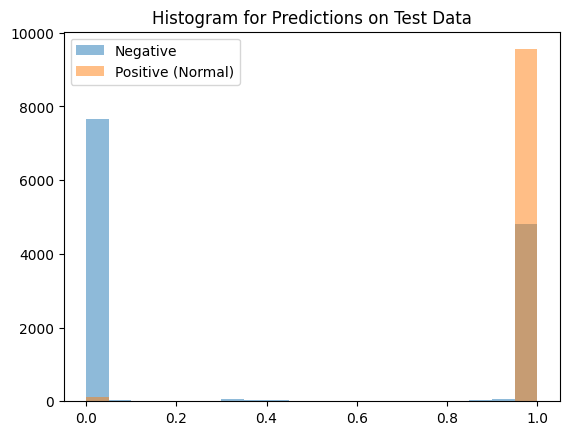

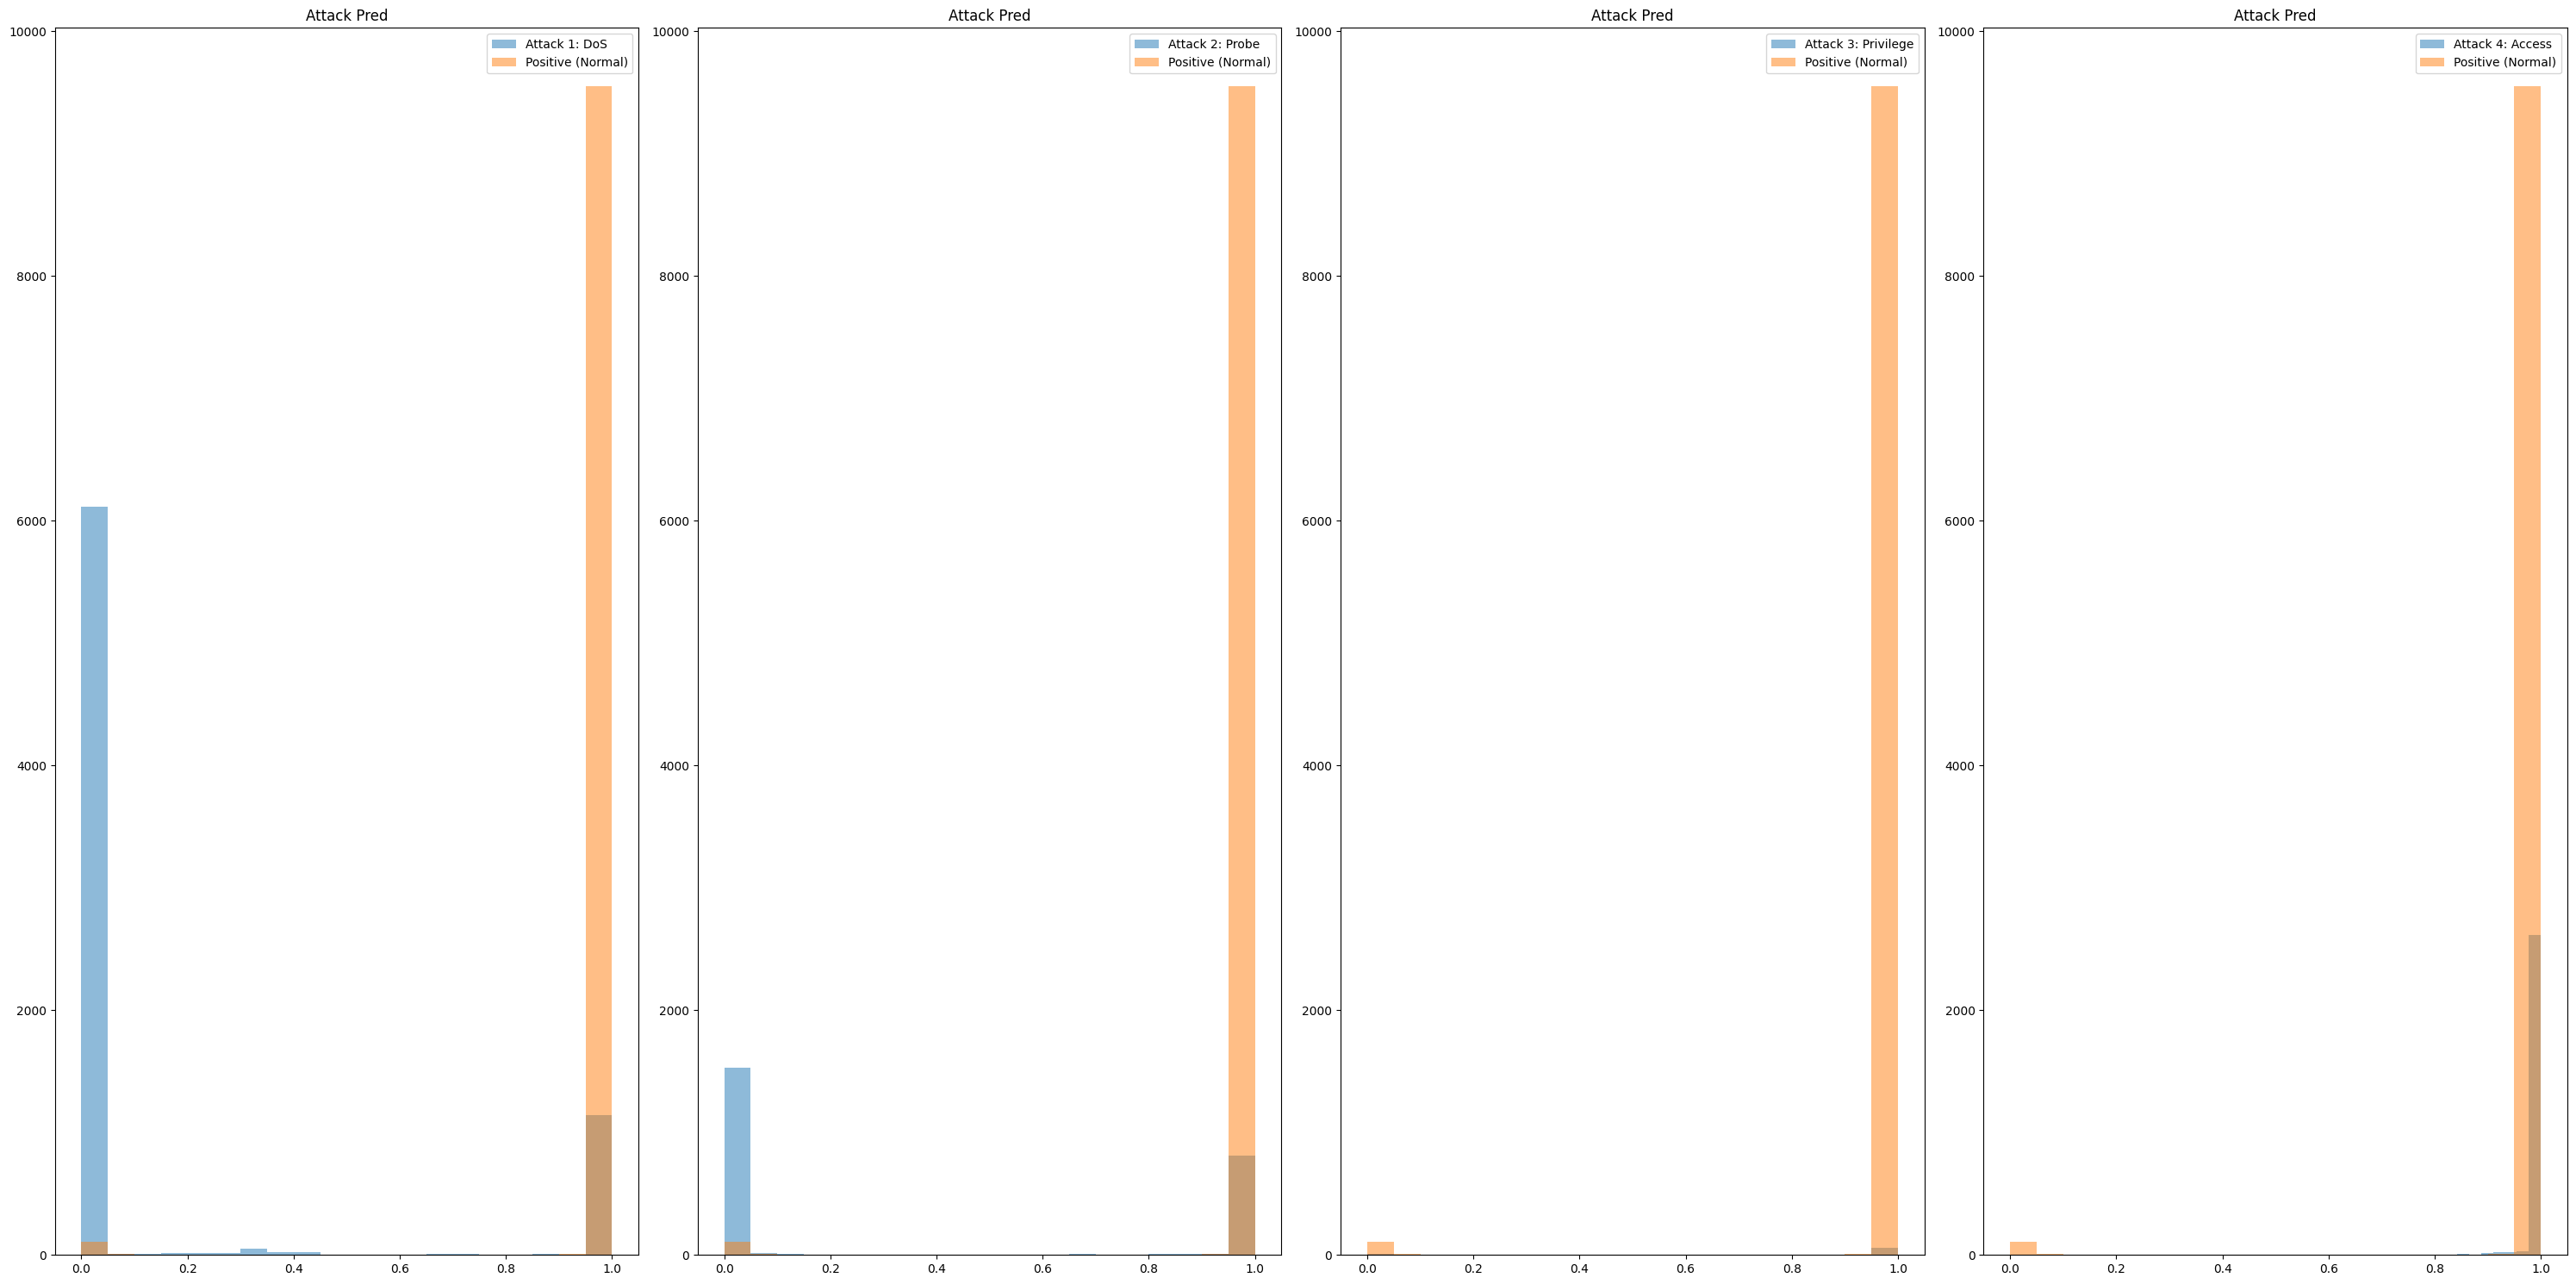

AUPR Train Run 1: 0.999928568758679
Epoch 1/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0164 - val_loss: 0.0096
Epoch 2/30
3186/3186 [==============================] - 5s 2ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 3/30
3186/3186 [==============================] - 5s 2ms/step - loss: 0.0062 - val_loss: 0.0103
Epoch 4/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0056 - val_loss: 0.0236
Epoch 5/30
3186/3186 [==============================] - 5s 2ms/step - loss: 0.0072 - val_loss: 0.0201
Epoch 6/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 7/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0106 - val_loss: 0.0172
Epoch 8/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0041 - val_loss: 0.0153
Epoch 9/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0052 - val_loss: 0.0199
Epoch 10/30
3186/3186 [=======================

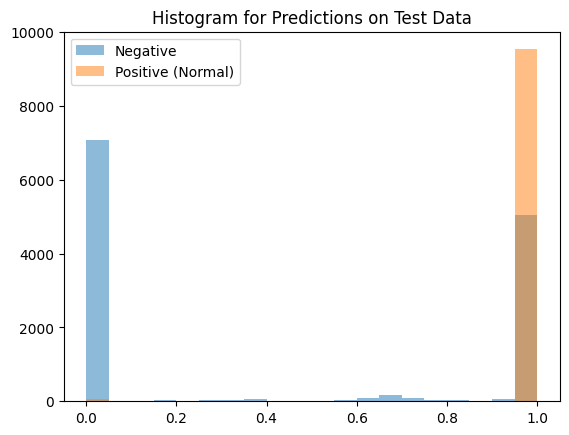

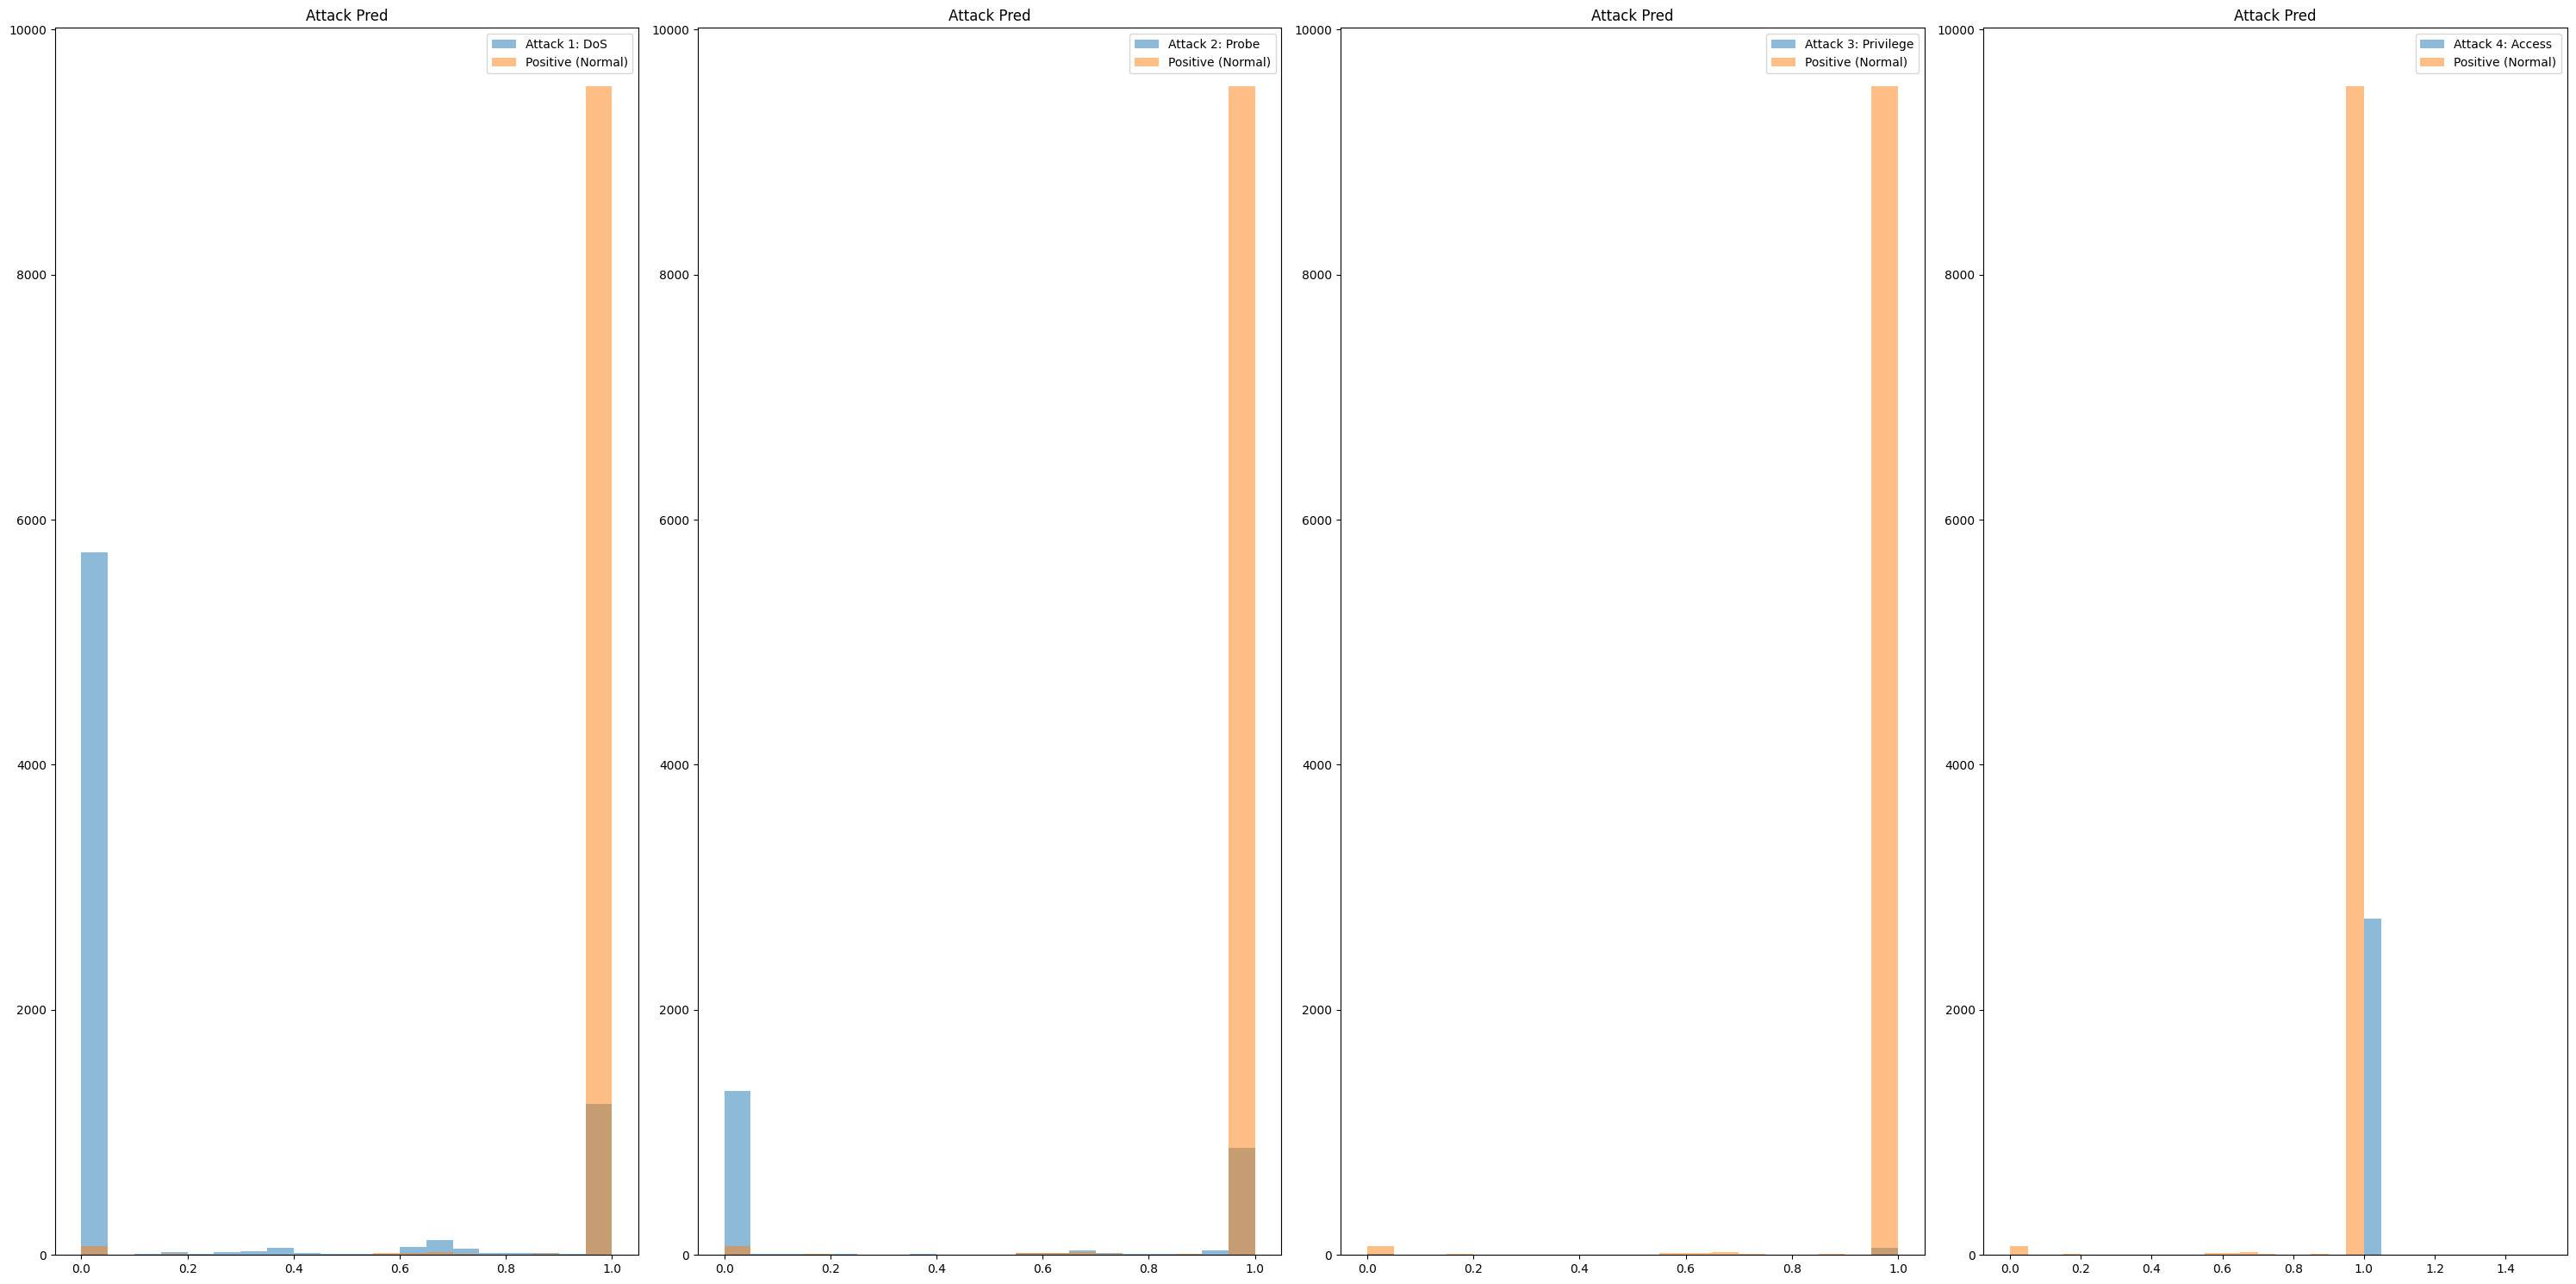

AUPR Train Run 2: 0.9999602218376958
AUPR (Train): 0.9999443952981875+-1.582653950843449e-05
AUPR (Test): 0.9139988290624469+-0.00020393534472706865


,0,1
1,0.948843,0.951958
2,0.839049,0.845957
3,0.074856,0.066328
4,0.316491,0.110125


([0.999928568758679, 0.9999602218376958],
 [0.9137948937177198, 0.914202764407174],
 {0: [0.9488429404823306,
   0.8390489588545667,
   0.07485631975801732,
   0.3164909289607078],
  1: [0.9519577329265857,
   0.8459571651649282,
   0.06632796125301618,
   0.11012526096033402]})

In [25]:
#Standard - what we are going to compare with
# HS
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30

auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "ES4b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_15 (Dense)            (None, 60)                7380      
                                                                 
 batch_normalization (Batch  (None, 60)                240       
 Normalization)                                                  
                                                                 
 bump1 (Bump)                (None, 60)                1         
                                                                 
 dense_16 (Dense)            (None, 60)                3660      
                                                                 
 batch_normalization_1 (Ba

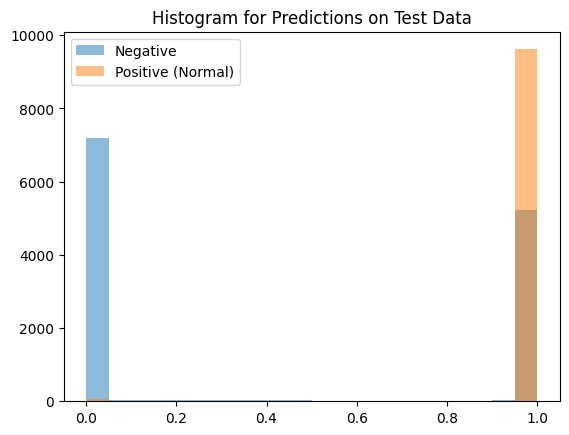

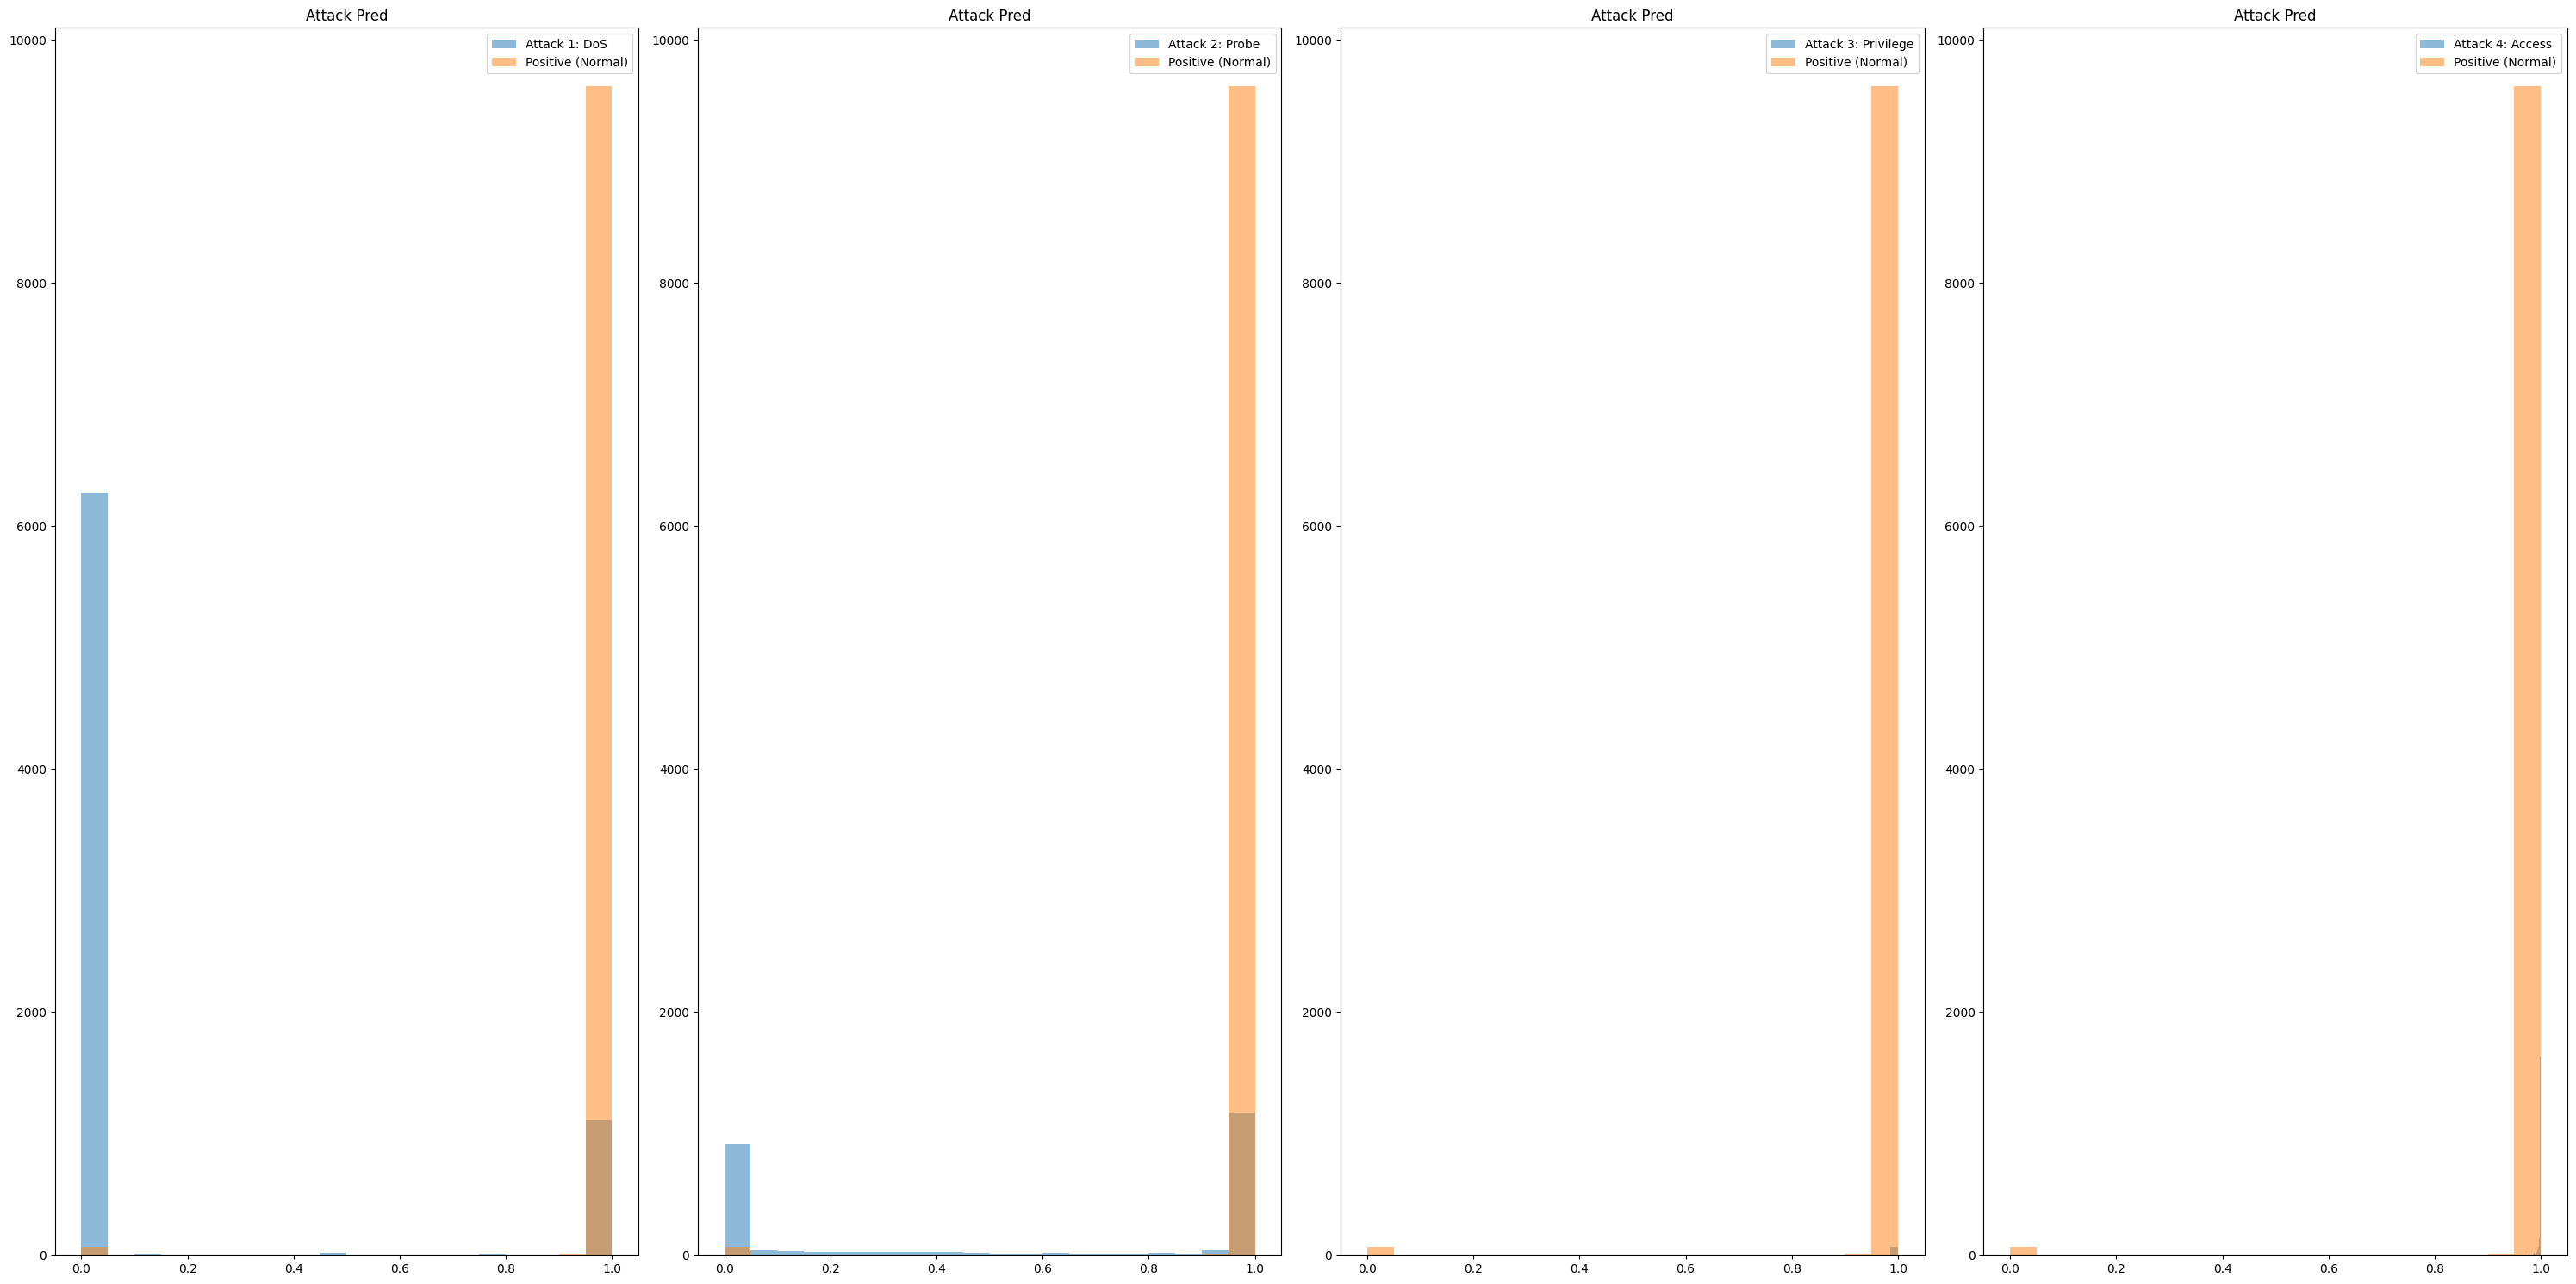

AUPR Train Run 1: 0.9986487783441897
AUPR Test Run 1: 0.8904931272150246
AUPR Indiv Test Run 1: [0.9336160780472844, 0.6561806329014688, 0.007538138862910343, 0.3039440056387668]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Epoch 1/30
3186/3186 [==============================] - 13s 3ms/step - loss: 0.0417 - val_loss: 0.0046
Epoch 2/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 3/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0105
Epoch 4/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 5/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 6/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 7/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0042 - val_loss: 0.003

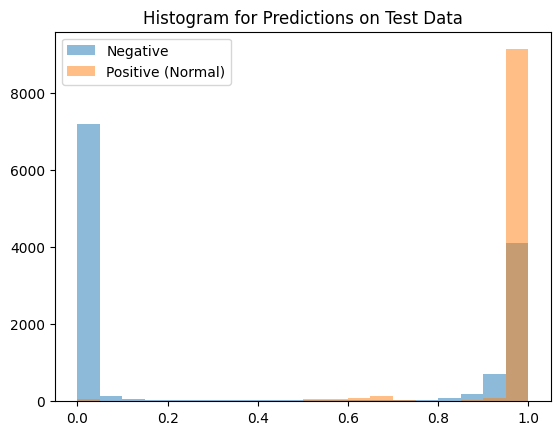

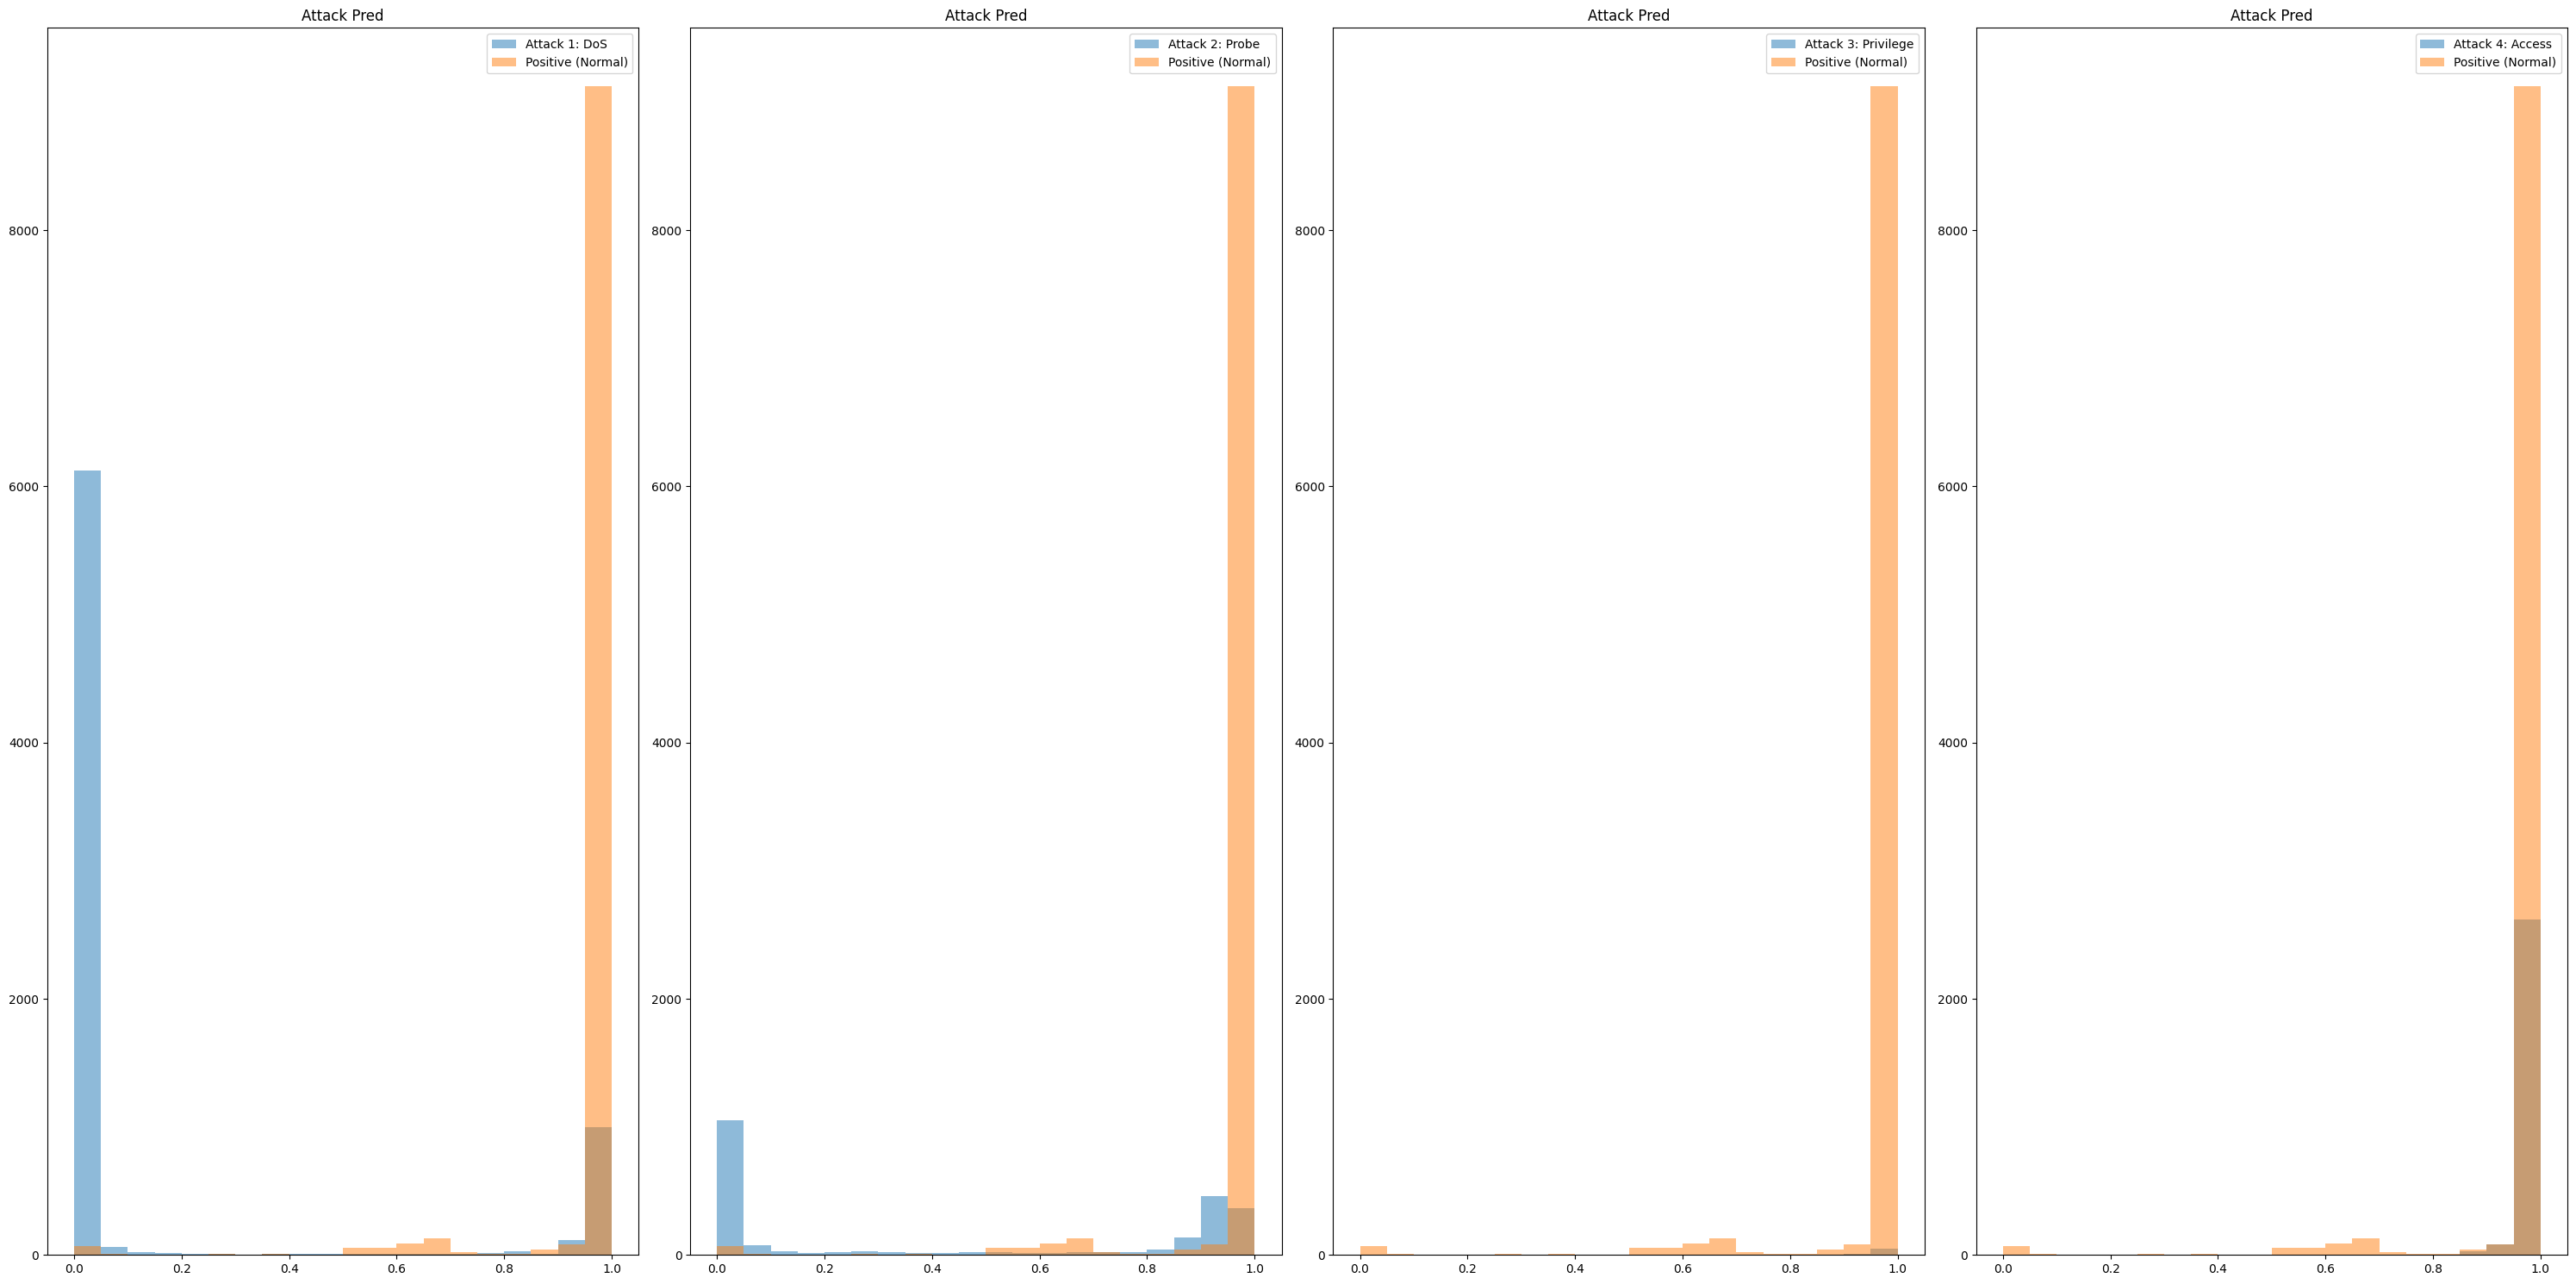

AUPR Train Run 2: 0.9998128442828063
AUPR Test Run 2: 0.9238156172421187
AUPR Indiv Test Run 2: [0.9596349076336429, 0.8312161528602855, 0.022371686672814875, 0.28683134717438885]
AUPR (Train): 0.999230811313498+-0.0005820329693082549
AUPR (Test): 0.9071543722285716+-0.016661245013547044


,0,1,AUPR Mean
1,0.933616,0.959635,0.946625
2,0.656181,0.831216,0.743698
3,0.007538,0.022372,0.014955
4,0.303944,0.286831,0.295388


([0.9986487783441897, 0.9998128442828063],
 [0.8904931272150246, 0.9238156172421187],
 {0: [0.9336160780472844,
   0.6561806329014688,
   0.007538138862910343,
   0.3039440056387668],
  1: [0.9596349076336429,
   0.8312161528602855,
   0.022371686672814875,
   0.28683134717438885]})

In [27]:
import tensorflow as tf
from tensorflow import distribute
# ESb mse
separation = "ES"
bumped = "b"
sigma = 0.5
hidden_layers = len(neurons)
train = False    # train sigma. if NA, then False
batchnorm = True
dropout = [0.0 for n in neurons]

auprs_train = []
auprs_test = []
aupr_attacks = dict()

models_es = []

# Train and Evaluate the Model
for i in range(repeats):
    strategy = distribute.MirroredStrategy()
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, batchnorm=batchnorm, dropout=dropout,
                     sigma=sigma, train=train, loss='mse', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    models_es.append(model)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    print(f"AUPR Test Run {i+1}: {aupr_test}")
    print(f"AUPR Indiv Test Run {i+1}: {aupr_attack}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")

results_df = pd.DataFrame(data=aupr_attacks, index=new_attacks)
results_df['AUPR Mean'] = results_df.mean(axis=1)
display(results_df)
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Try to use a cross validation set to tune epsilon
Maybe dont give the trainnig model any practice data, make it unsupervised
Try to make gausian distribution on all of the data

Model: "HS4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_10 (Dense)            (None, 60)                7380      
                                                                 
 tf.nn.leaky_relu_8 (TFOpLa  (None, 60)                0         
 mbda)                                                           
                                                                 
 dense_11 (Dense)            (None, 60)                3660      
                                                                 
 tf.nn.leaky_relu_9 (TFOpLa  (None, 60)                0         
 mbda)                                                           
                                                                 
 dense_12 (Dense)            (None, 60)                3660    

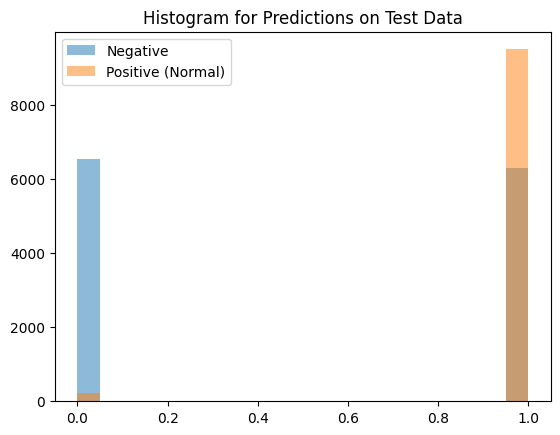

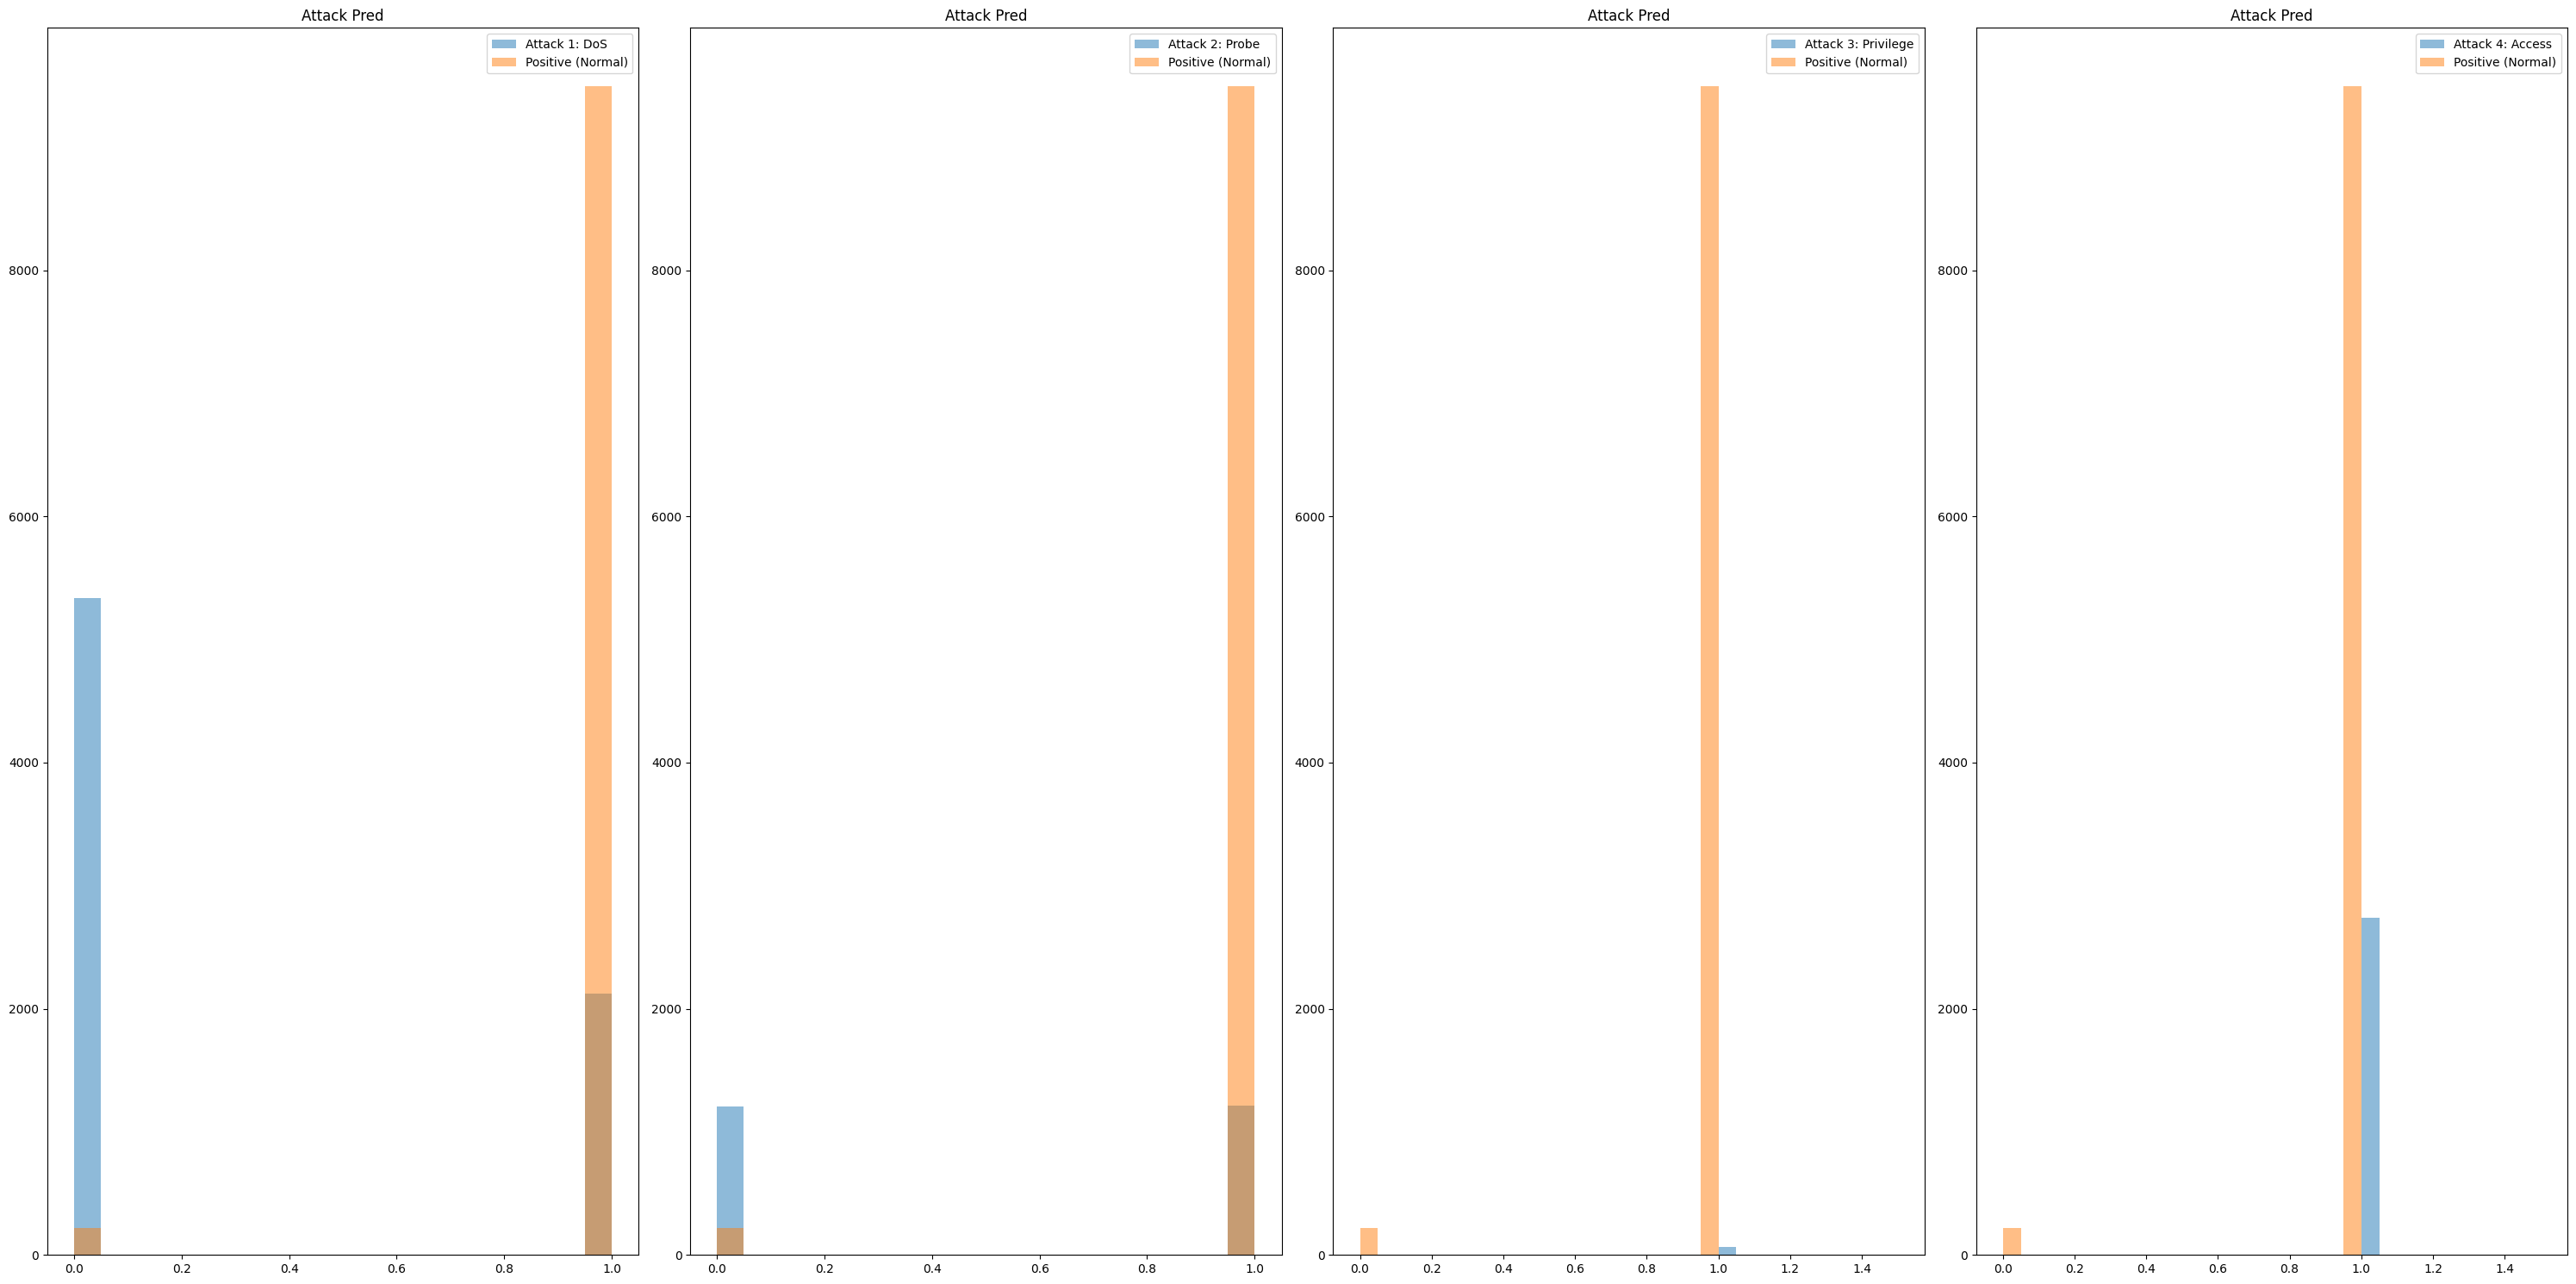

AUPR Train Run 1: 0.9901013619922729
Epoch 1/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 2/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 3/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0055 - val_loss: 0.0062
Epoch 4/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0066 - val_loss: 0.0081
Epoch 5/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 6/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0065 - val_loss: 0.0107
Epoch 7/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 8/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0061 - val_loss: 0.0065
Epoch 9/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 10/30
3186/3186 [======================

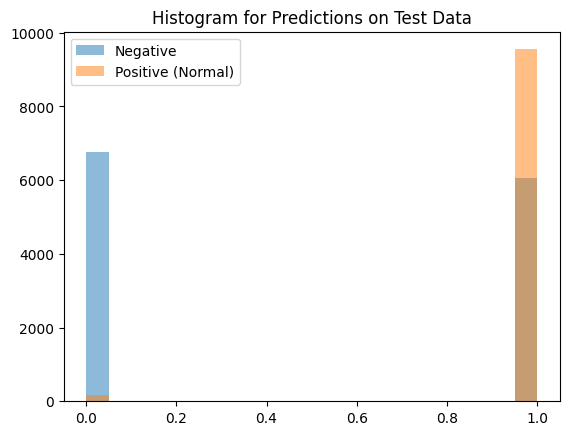

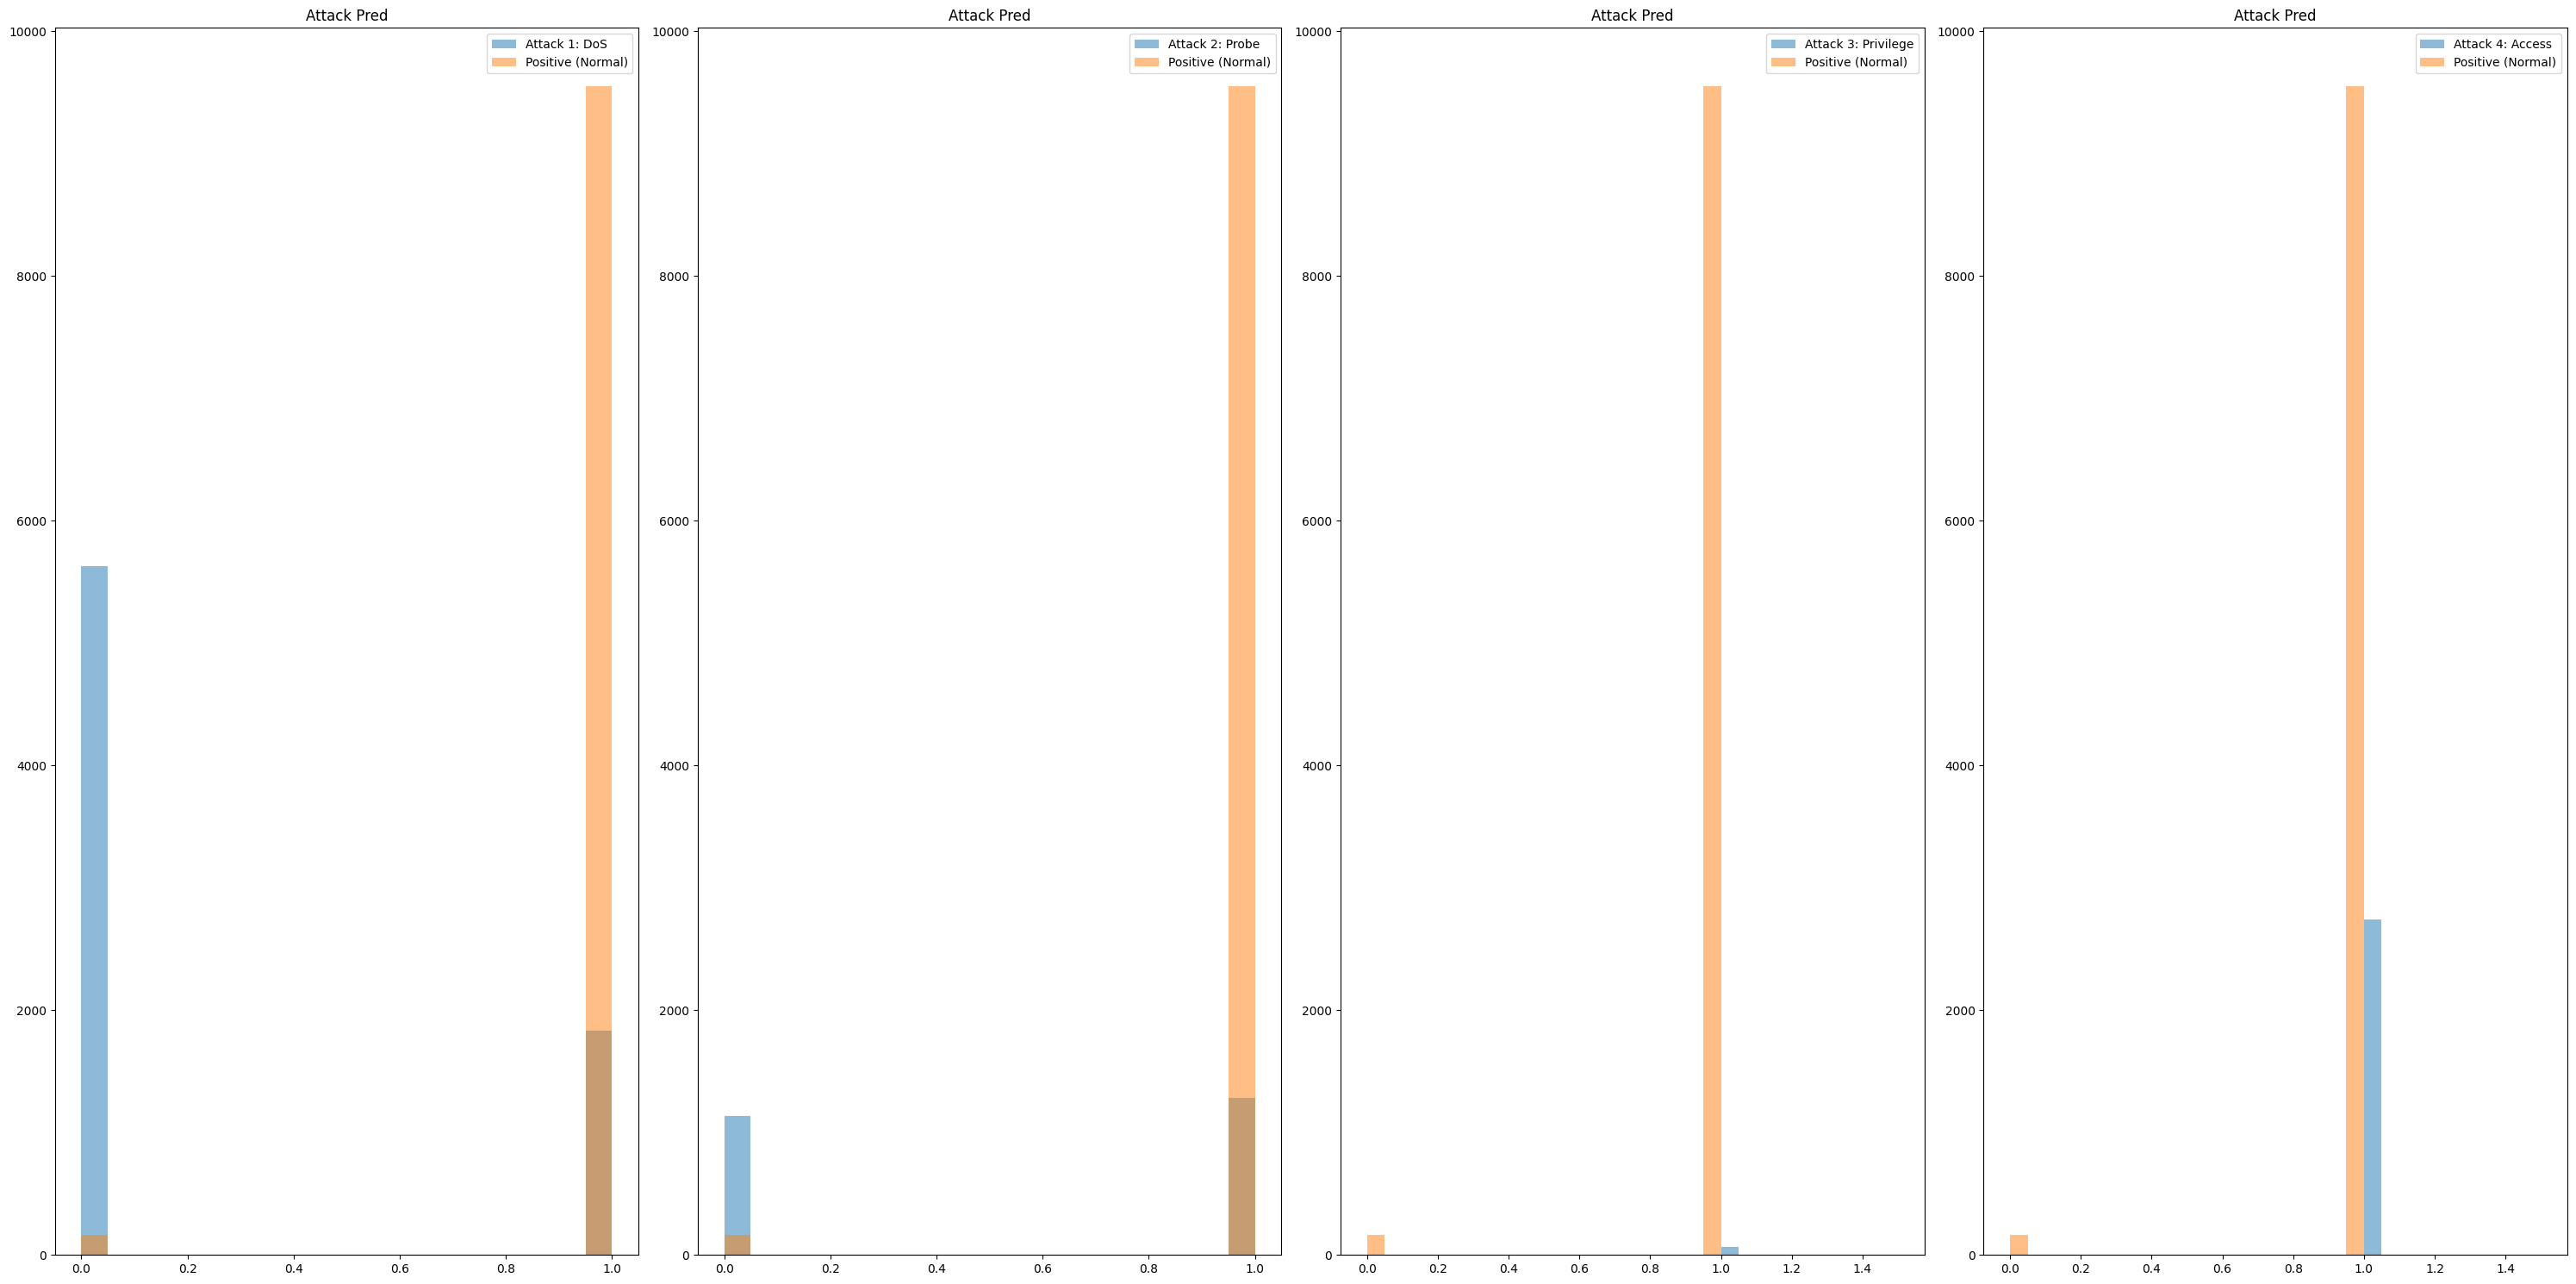

AUPR Train Run 2: 0.9888061600827656
AUPR (Train): 0.9894537610375193+-0.000647600954753691
AUPR (Test): 0.8825418990526719+-0.0040009966029146415


,0,1
1,0.900197,0.916631
2,0.723459,0.725804
3,0.003324,0.003324
4,0.110125,0.110125


([0.9901013619922729, 0.9888061600827656],
 [0.8785409024497572, 0.8865428956555865],
 {0: [0.9001972817146304,
   0.7234588704201519,
   0.003324468085106383,
   0.11012526096033402],
  1: [0.916630955781035,
   0.725803574420537,
   0.003324468085106383,
   0.11012526096033402]})

In [33]:
#Standard model but with a different loss function - trying logaritimic mean squared loss 
# HS
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30

auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

In [25]:
from sklearn.model_selection import GridSearchCV
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30
model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=0)

In [32]:
from scikeras.wrappers import KerasClassifier
keras_clf = KerasClassifier(model = model, optimizer="adam", epochs=30, verbose=0, activation=bump_activation, layer=[[60,45,30,15], [40,40,40,40], [90,60,30]])

In [33]:
#layers = [[60,45,30,15], [40,40,40,40], [90,60,30]]
activation = [bump_activation]
param_grid = dict(activation=activation, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=keras_clf, param_grid = param_grid, scoring='accuracy')


In [34]:
grid_result = grid.fit(X,y)

INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmp6kbdx3nf\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmp6kbdx3nf\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpbm1soib9\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpbm1soib9\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpmt7ee8w2\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpmt7ee8w2\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmp4ywu3rz3\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmp4ywu3rz3\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpyyti11l1\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpyyti11l1\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpndrvisv0\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpndrvisv0\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpcpm79ky4\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpcpm79ky4\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmphih8eedh\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmphih8eedh\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpy0ilx111\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpy0ilx111\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpkc9c3wxm\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmpkc9c3wxm\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmp5a96yg2s\assets


INFO:tensorflow:Assets written to: C:\Users\stefa\AppData\Local\Temp\tmp5a96yg2s\assets


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\scikeras\wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: BaseWrapper._check_model_param.<locals>.final_build_fn() got an unexpected keyword argument 'activation'


Unable to use GridSearchCV, missing parameters/too many parameters?

Model: "HS3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_5 (Dense)             (None, 90)                11070     
                                                                 
 tf.nn.leaky_relu_4 (TFOpLa  (None, 90)                0         
 mbda)                                                           
                                                                 
 dense_6 (Dense)             (None, 60)                5460      
                                                                 
 tf.nn.leaky_relu_5 (TFOpLa  (None, 60)                0         
 mbda)                                                           
                                                                 
 dense_7 (Dense)             (None, 30)                1830    

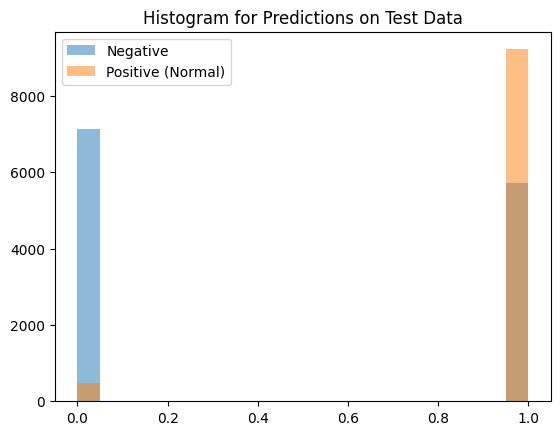

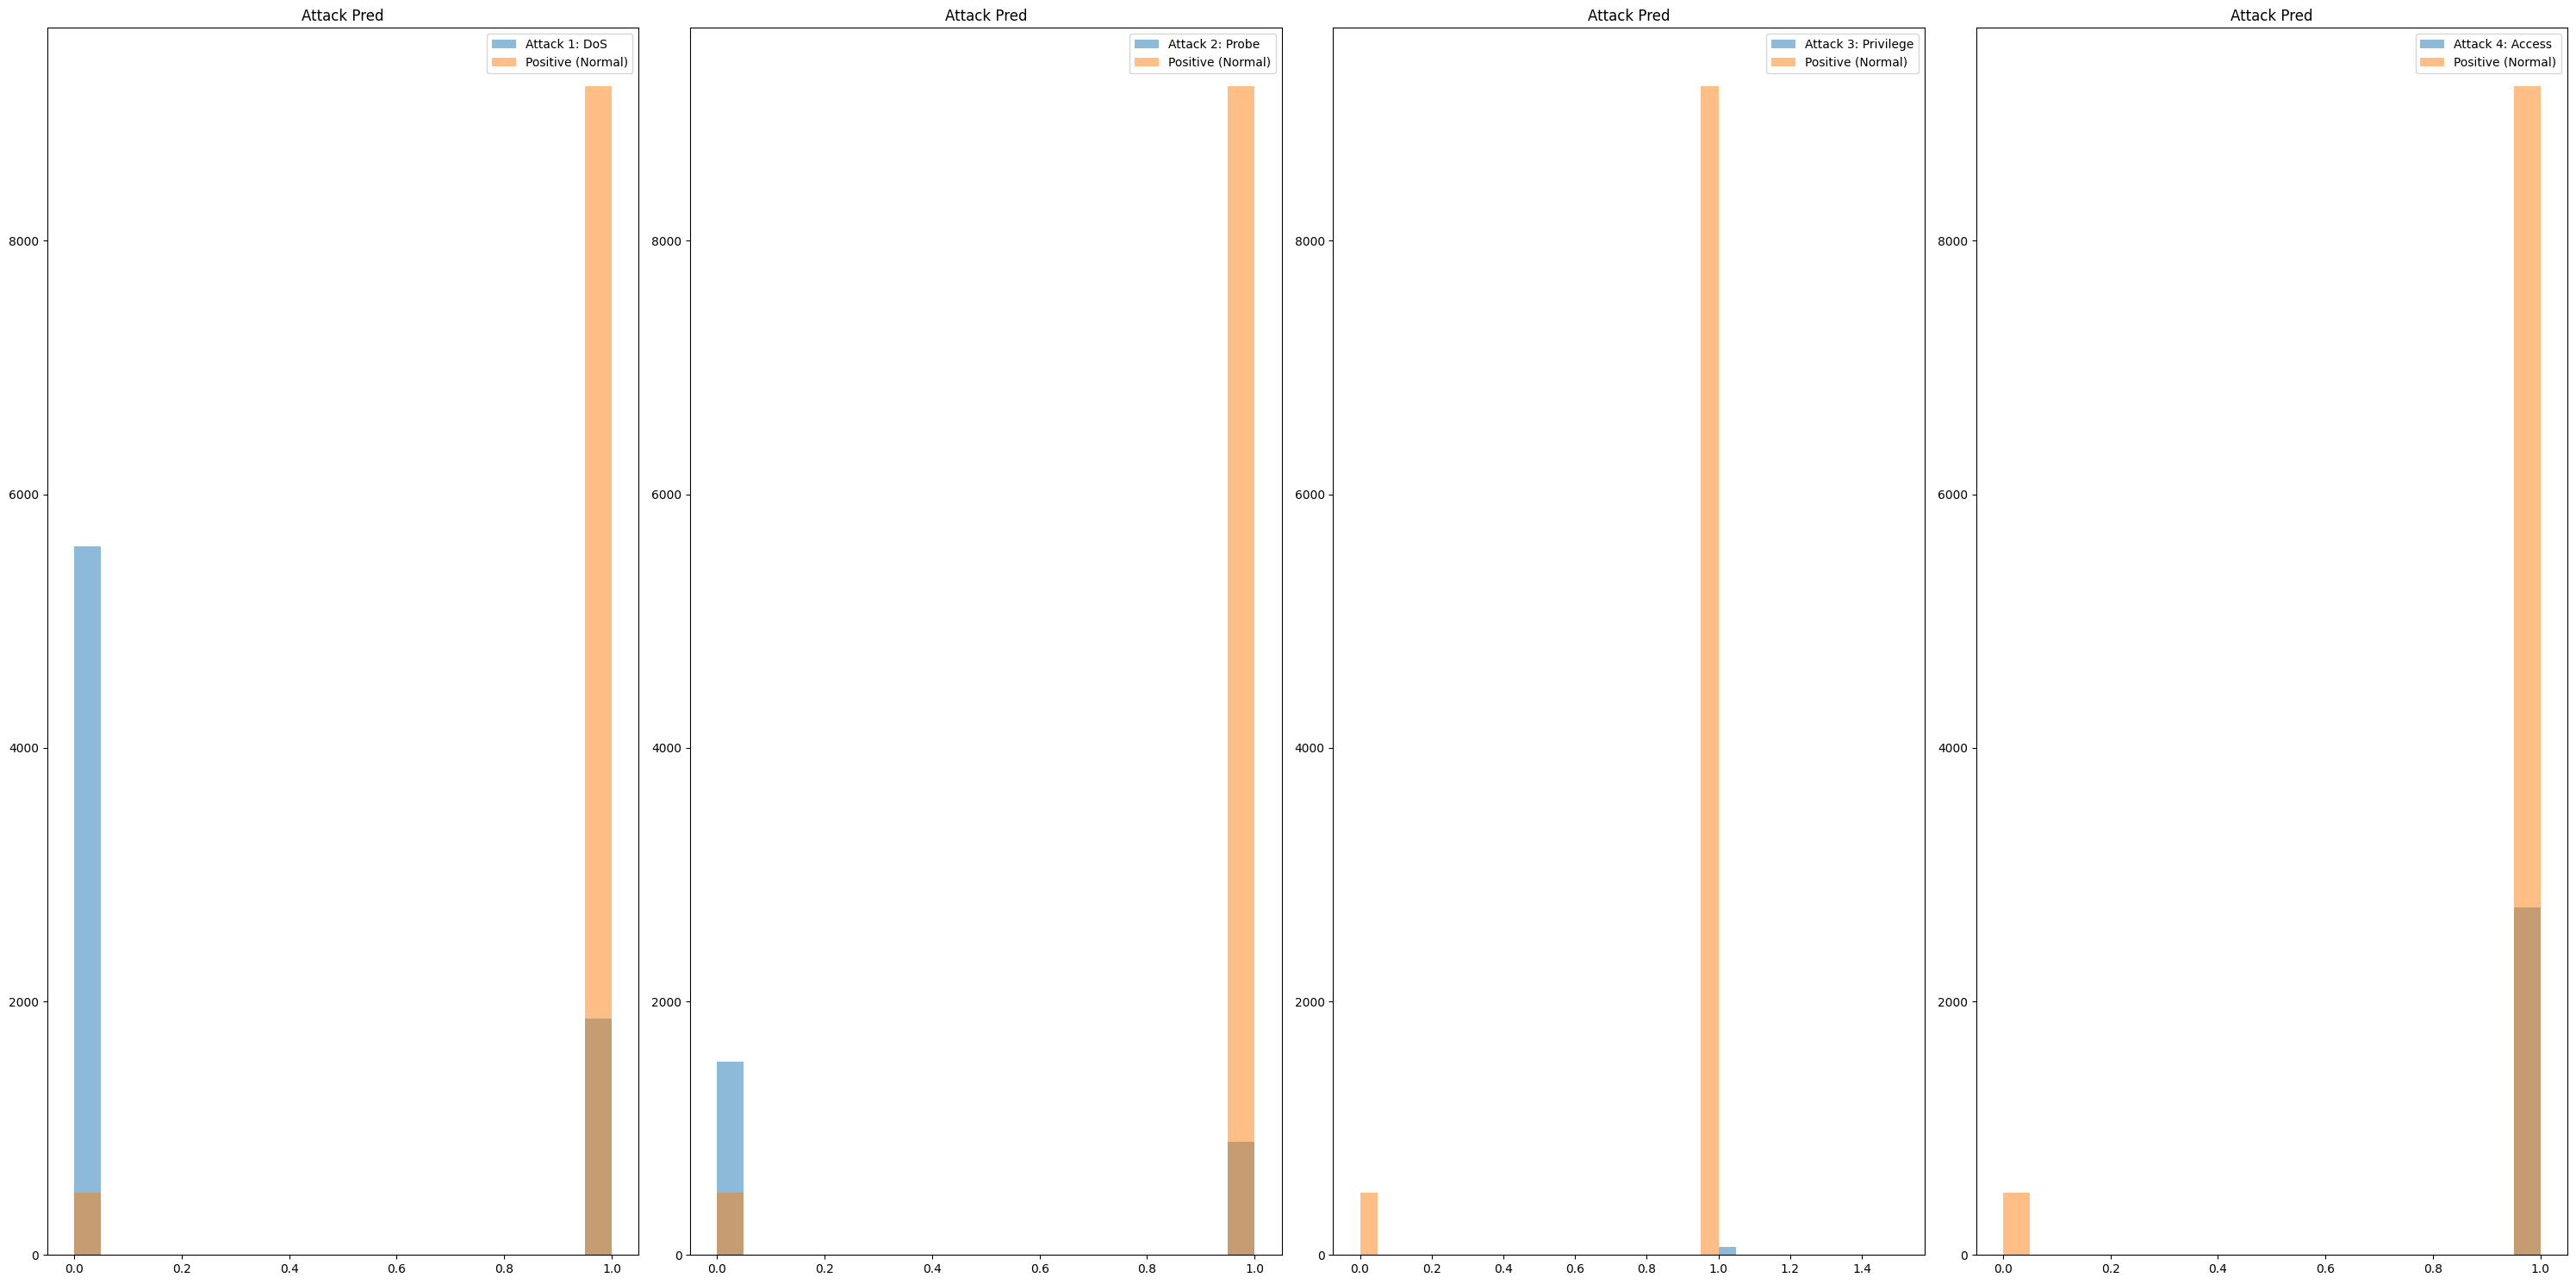

AUPR Train Run 1: 0.9908049454369691
Epoch 1/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 2/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0056 - val_loss: 0.0083
Epoch 3/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 4/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0056 - val_loss: 0.0069
Epoch 5/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0059 - val_loss: 0.0066
Epoch 6/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 7/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 8/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 9/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 10/30
3186/3186 [================

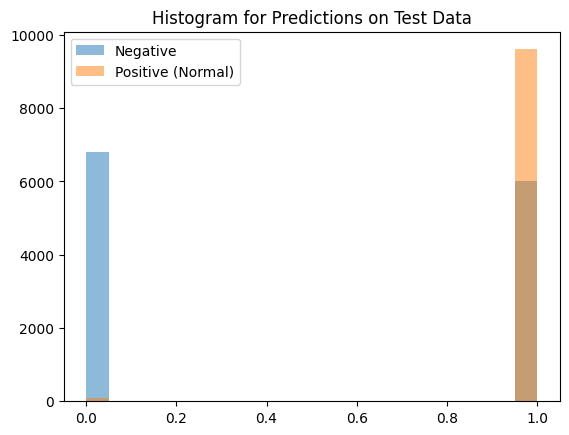

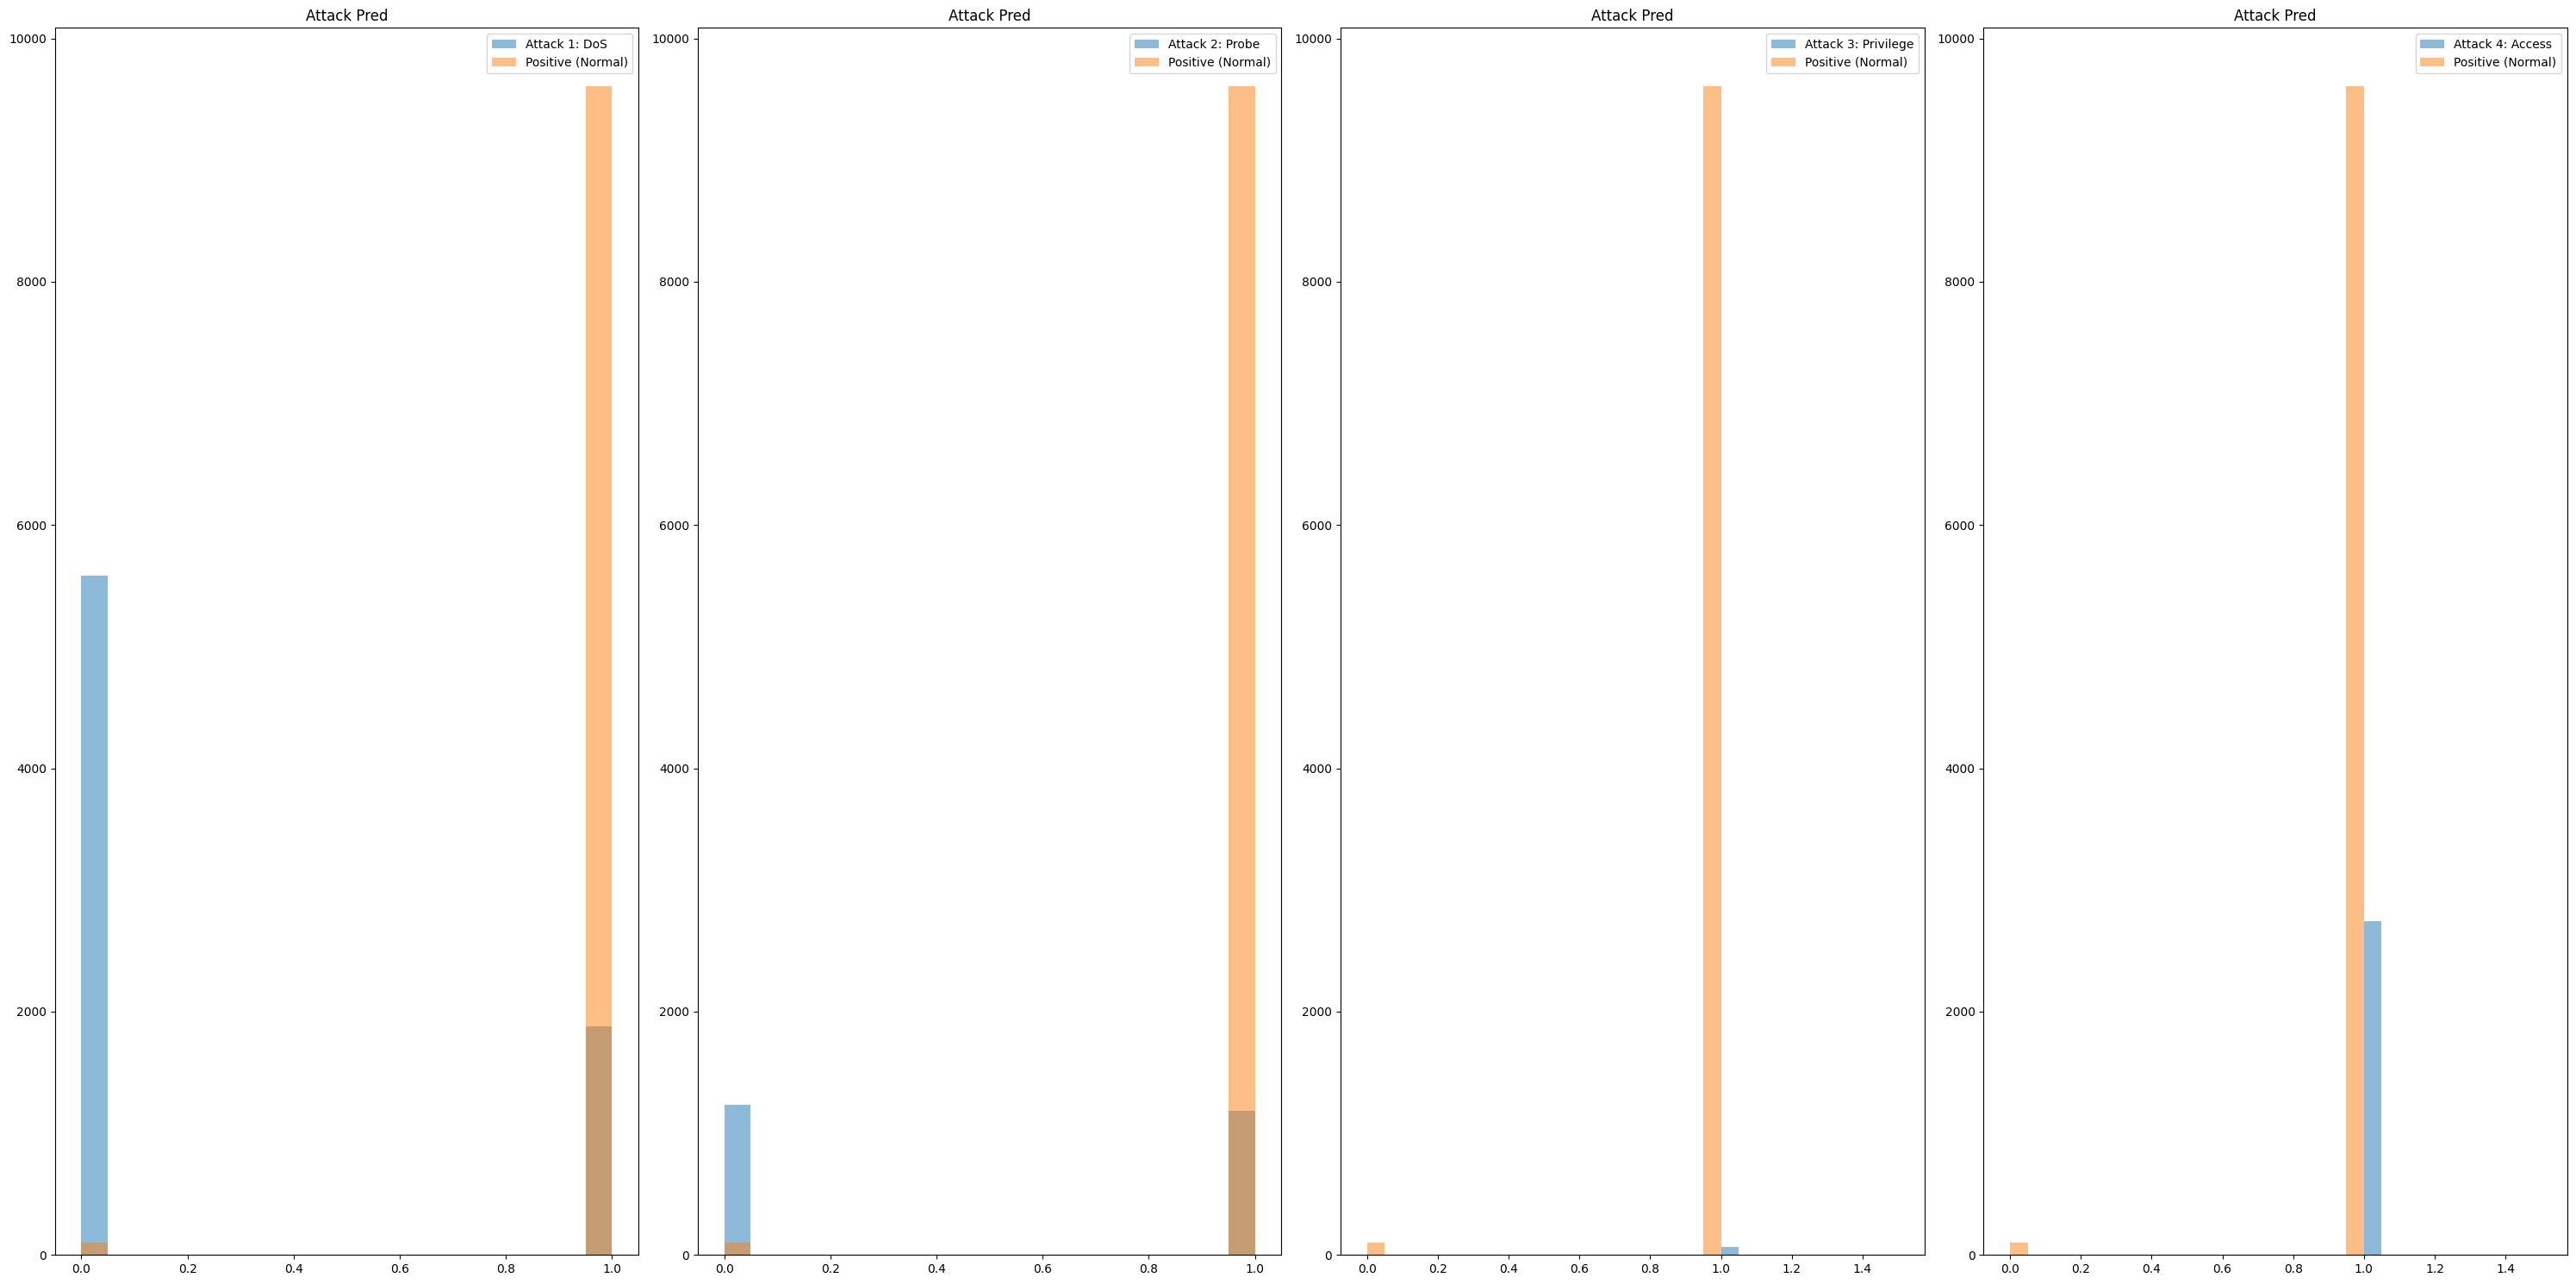

AUPR Train Run 2: 0.9916546378256348
AUPR (Train): 0.991229791631302+-0.00042484619433286186
AUPR (Test): 0.8820578962523655+-0.010019236419174238


,0,1
1,0.889066,0.920467
2,0.730528,0.767488
3,0.003324,0.003324
4,0.114726,0.110125


([0.9908049454369691, 0.9916546378256348],
 [0.8720386598331913, 0.8920771326715398],
 {0: [0.8890662834303403,
   0.7305278197781395,
   0.003324468085106383,
   0.11472611661979108],
  1: [0.9204666357681248,
   0.7674875435223314,
   0.003324468085106383,
   0.11012526096033402]})

In [35]:
#Standard model but with a different loss function - trying logaritimic mean squared loss different neuron layers
# HS
neurons = [90,60,30]
separation = "HS"
bumped = ""
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30

auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "ES3b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 122)]             0         
                                                                 
 dense_41 (Dense)            (None, 90)                11070     
                                                                 
 bump1 (Bump)                (None, 90)                1         
                                                                 
 dense_42 (Dense)            (None, 60)                5460      
                                                                 
 bump2 (Bump)                (None, 60)                1         
                                                                 
 dense_43 (Dense)            (None, 30)                1830      
                                                                 
 bump3 (Bump)                (None, 30)                1      

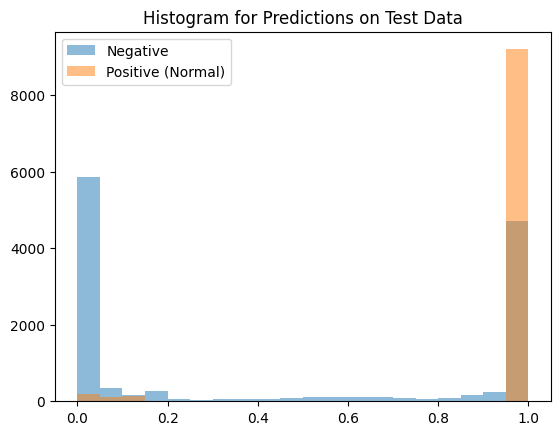

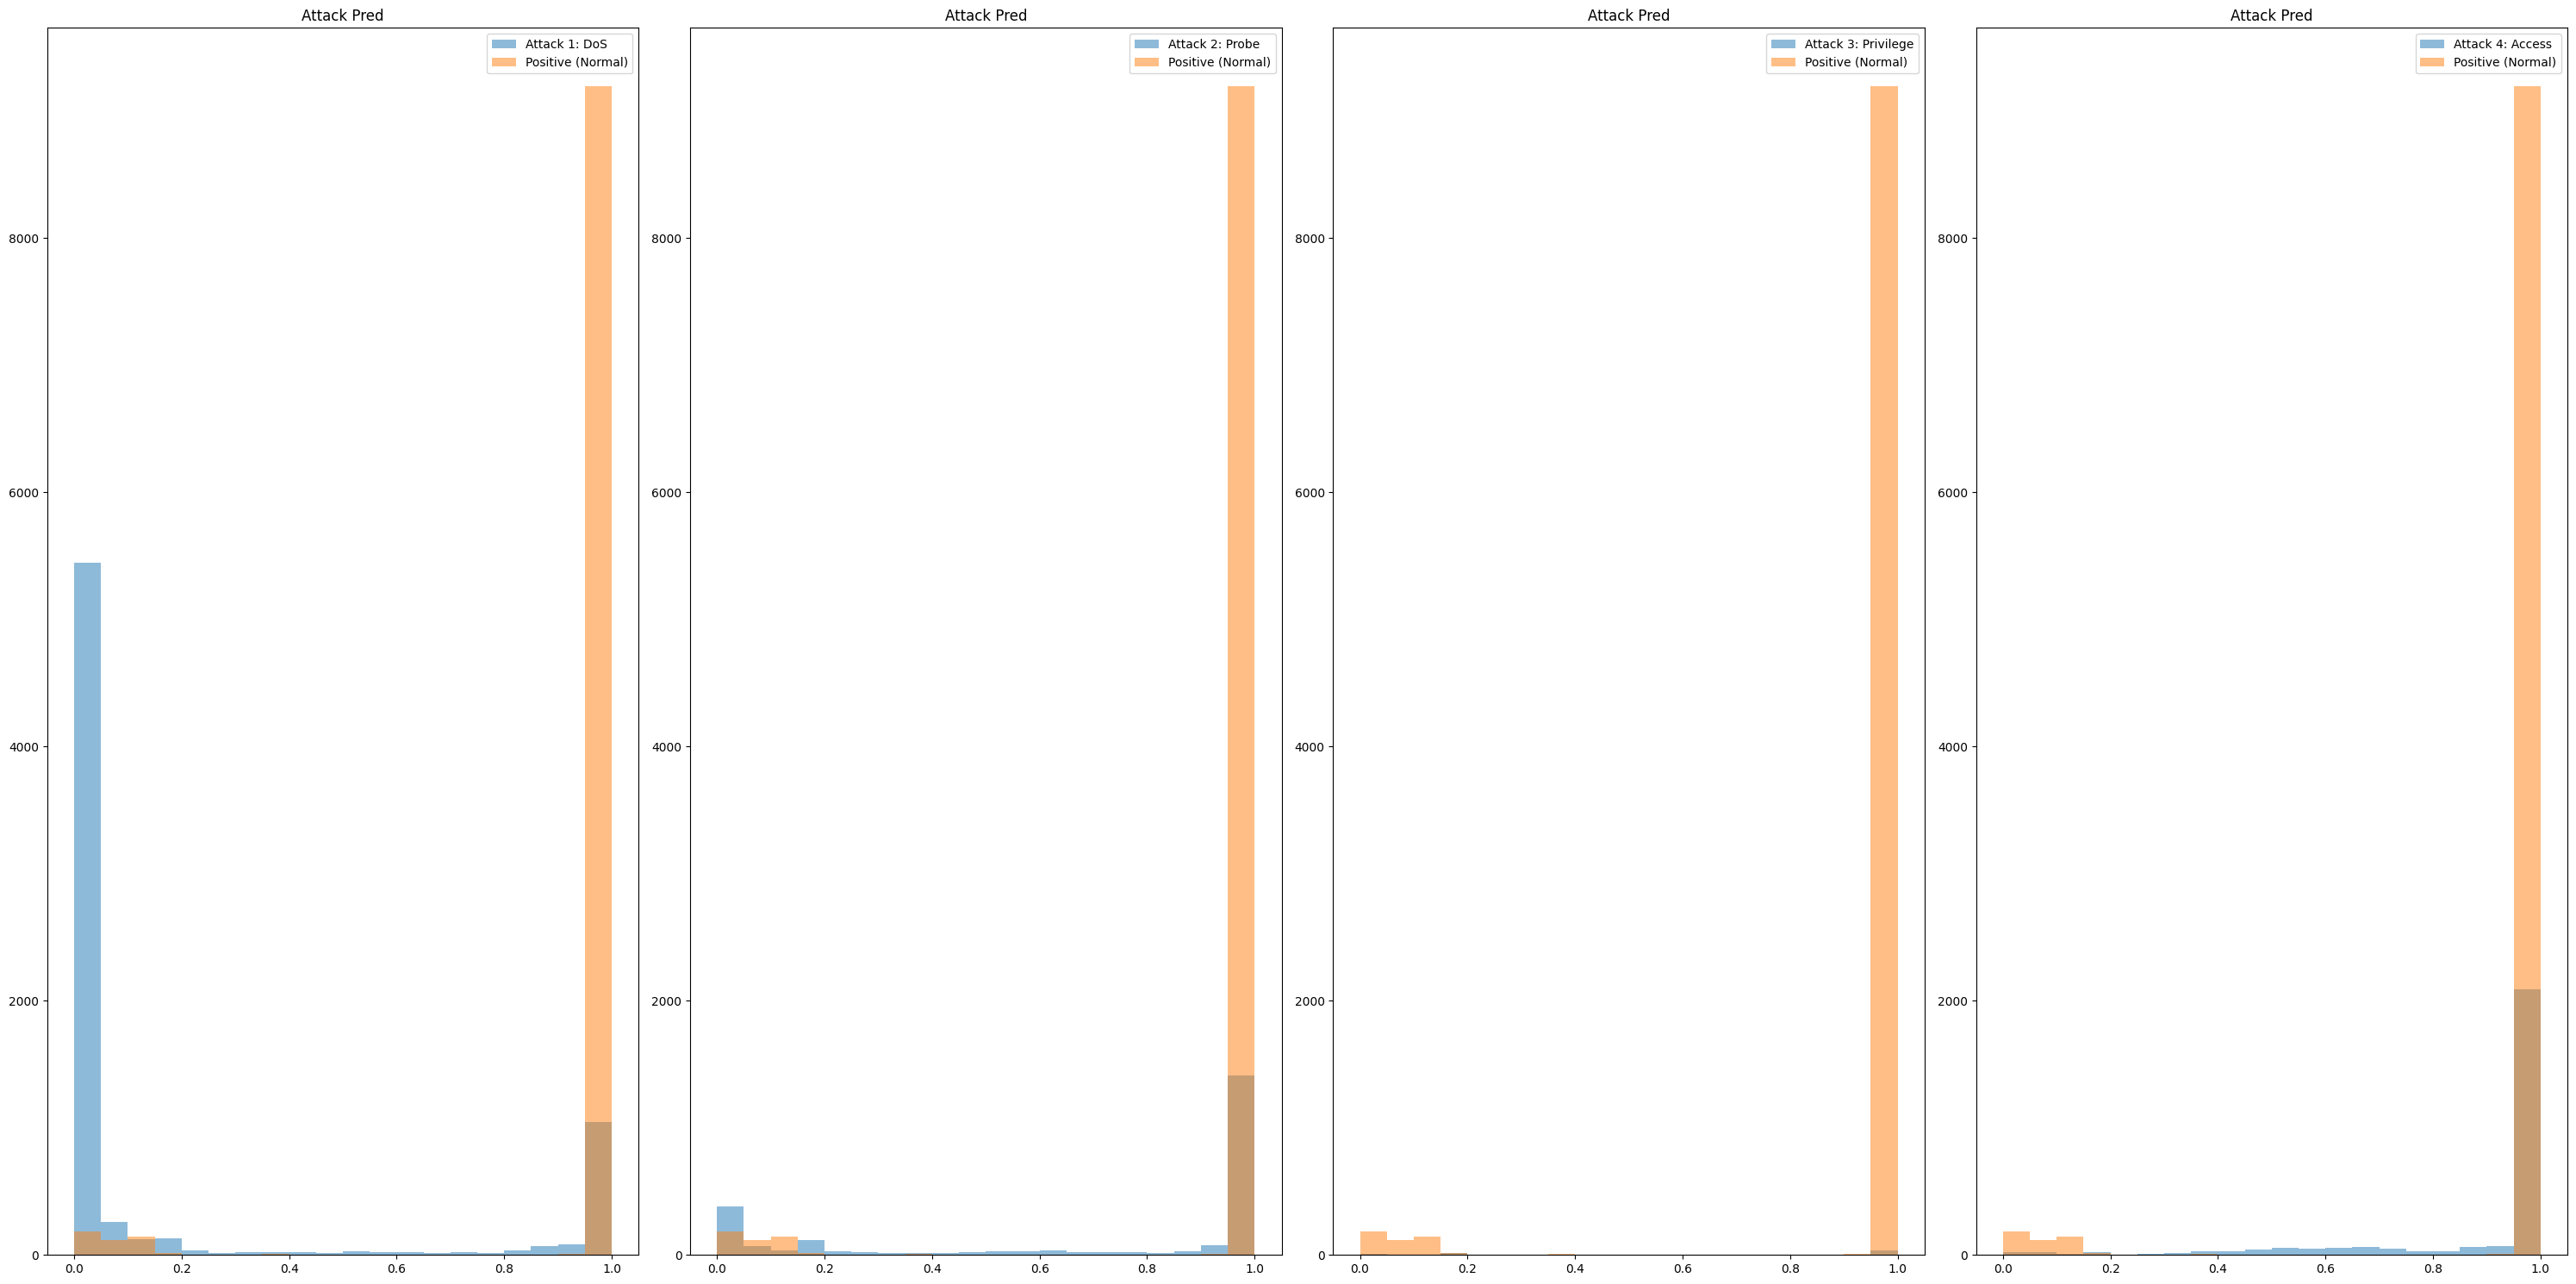

AUPR Train Run 1: 0.9974290211441824
Epoch 1/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 2/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 3/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 4/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 5/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 6/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 7/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 8/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 9/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/30
3186/3186 [================

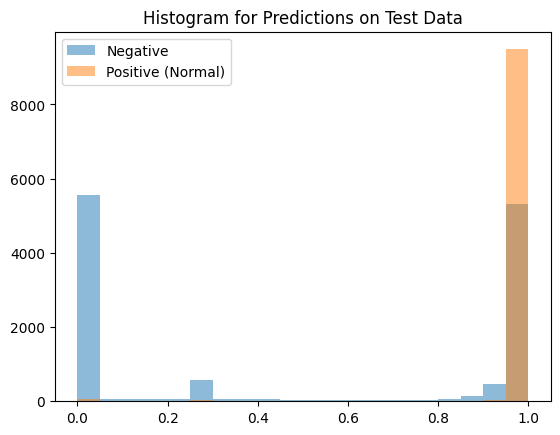

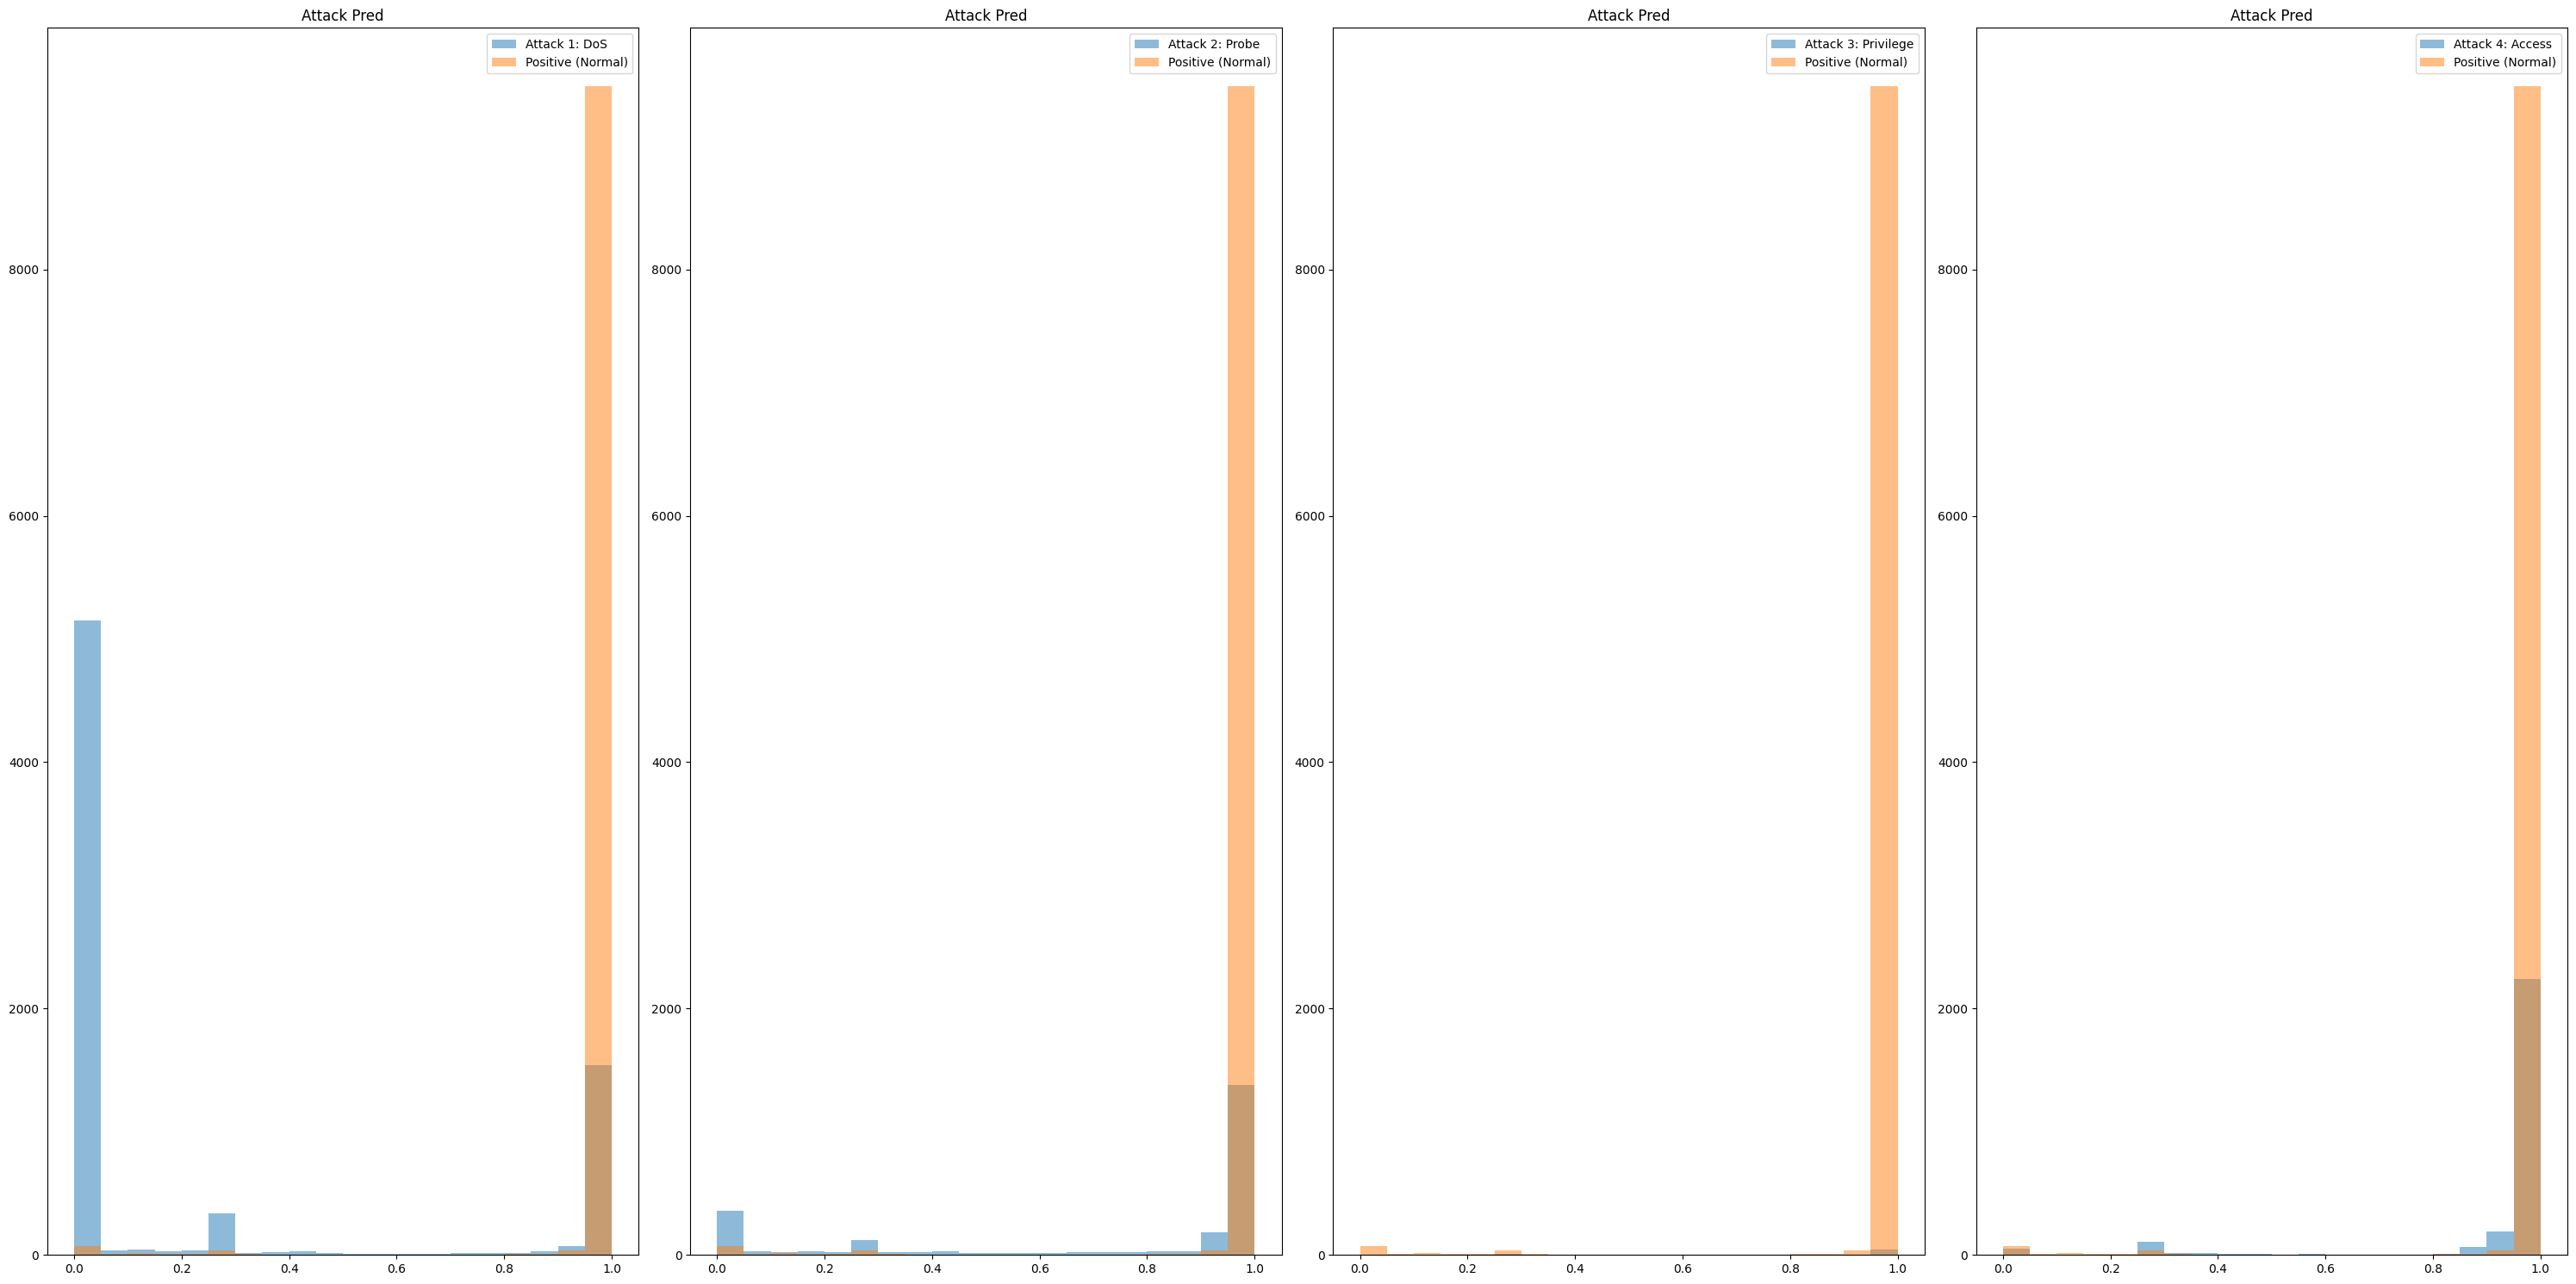

AUPR Train Run 2: 0.9948863940540642
AUPR (Train): 0.9961577075991233+-0.001271313545059105
AUPR (Test): 0.8944009387247277+-0.0048094019492409545


,0,1
1,0.945069,0.919314
2,0.534187,0.620368
3,0.024791,0.054077
4,0.363097,0.403405


([0.9974290211441824, 0.9948863940540642],
 [0.8992103406739687, 0.8895915367754867],
 {0: [0.9450691782830283,
   0.5341869748335748,
   0.024790571781216568,
   0.3630966635840911],
  1: [0.9193136276080087,
   0.6203679912035914,
   0.05407712140468805,
   0.40340549921257307]})

In [41]:
#Bumped model but with a different loss function - trying logaritimic mean squared loss as well as diff number of neurons
separation = "ES"
bumped = "b"
neurons = [90,60,30]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30

auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Chose to do above code logaritmic mean squared loss - idea is that with this the large outliers wolnt skew perception about small anomalies and cause them to be classified as normal
Possible OverFit?
L1 vs L2
- L1 adds a cost with regards to the absolute value of the parameters. It will result in some of the weights to be equal to zero.
- L2 adds a cost with regards to the squared value of the parameters. This results in smaller weights
I chose L2 because I wish for the each parameter to have a value since I do not want them to be 0 valued because this would ignore a parameter. I do not want to accidentally ignore a valuable parameter.

Model: "ES3b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 122)]             0         
                                                                 
 dense_49 (Dense)            (None, 90)                11070     
                                                                 
 bump1 (Bump)                (None, 90)                1         
                                                                 
 dense_50 (Dense)            (None, 60)                5460      
                                                                 
 bump2 (Bump)                (None, 60)                1         
                                                                 
 dense_51 (Dense)            (None, 30)                1830      
                                                                 
 bump3 (Bump)                (None, 30)                1      

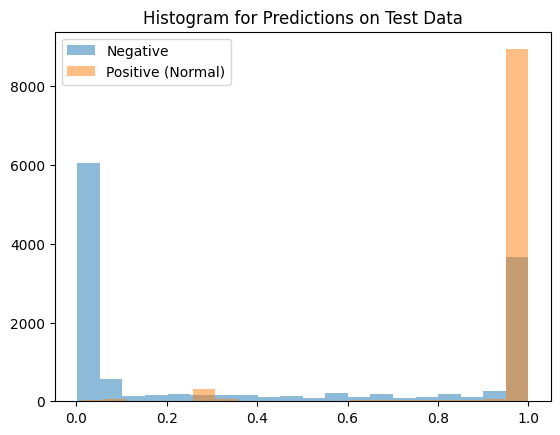

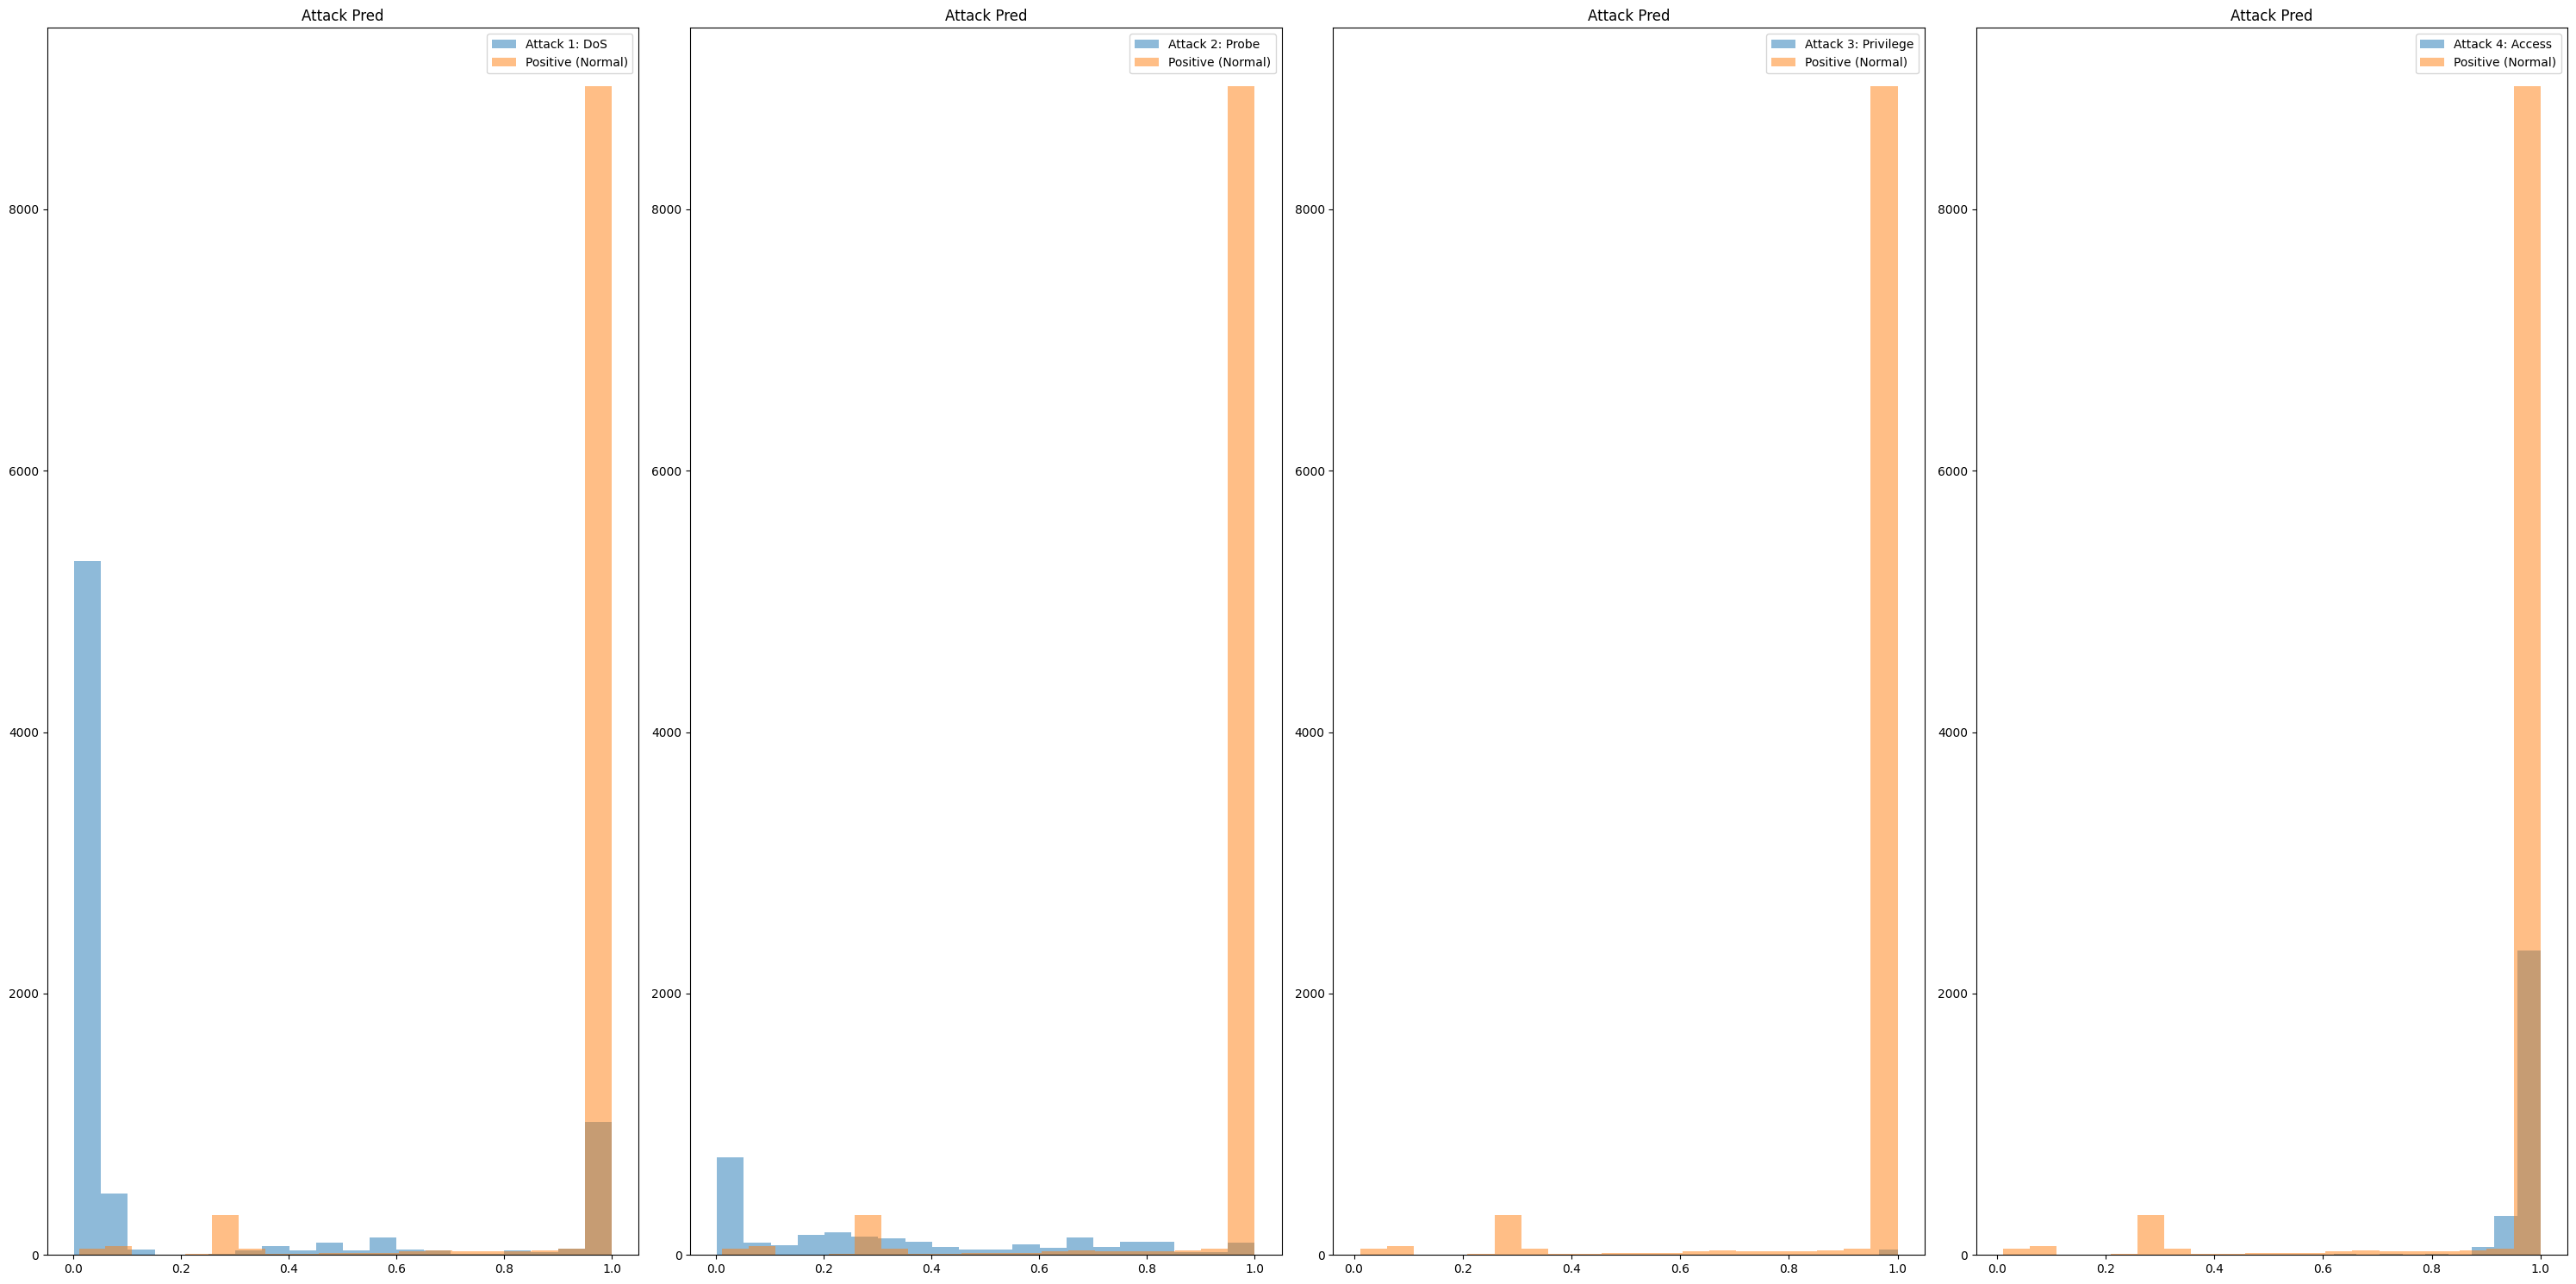

AUPR Train Run 1: 0.9927243796751797
Epoch 1/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0440 - val_loss: 0.0289
Epoch 2/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 3/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0152 - val_loss: 0.0131
Epoch 4/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0136 - val_loss: 0.0140
Epoch 5/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0132 - val_loss: 0.0138
Epoch 6/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0132 - val_loss: 0.0128
Epoch 7/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0125 - val_loss: 0.0138
Epoch 8/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 9/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 10/30
3186/3186 [======================

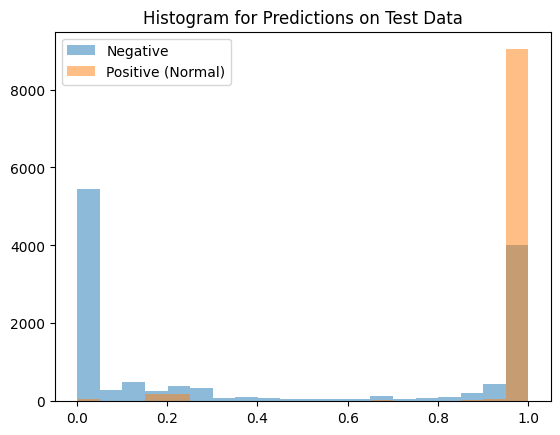

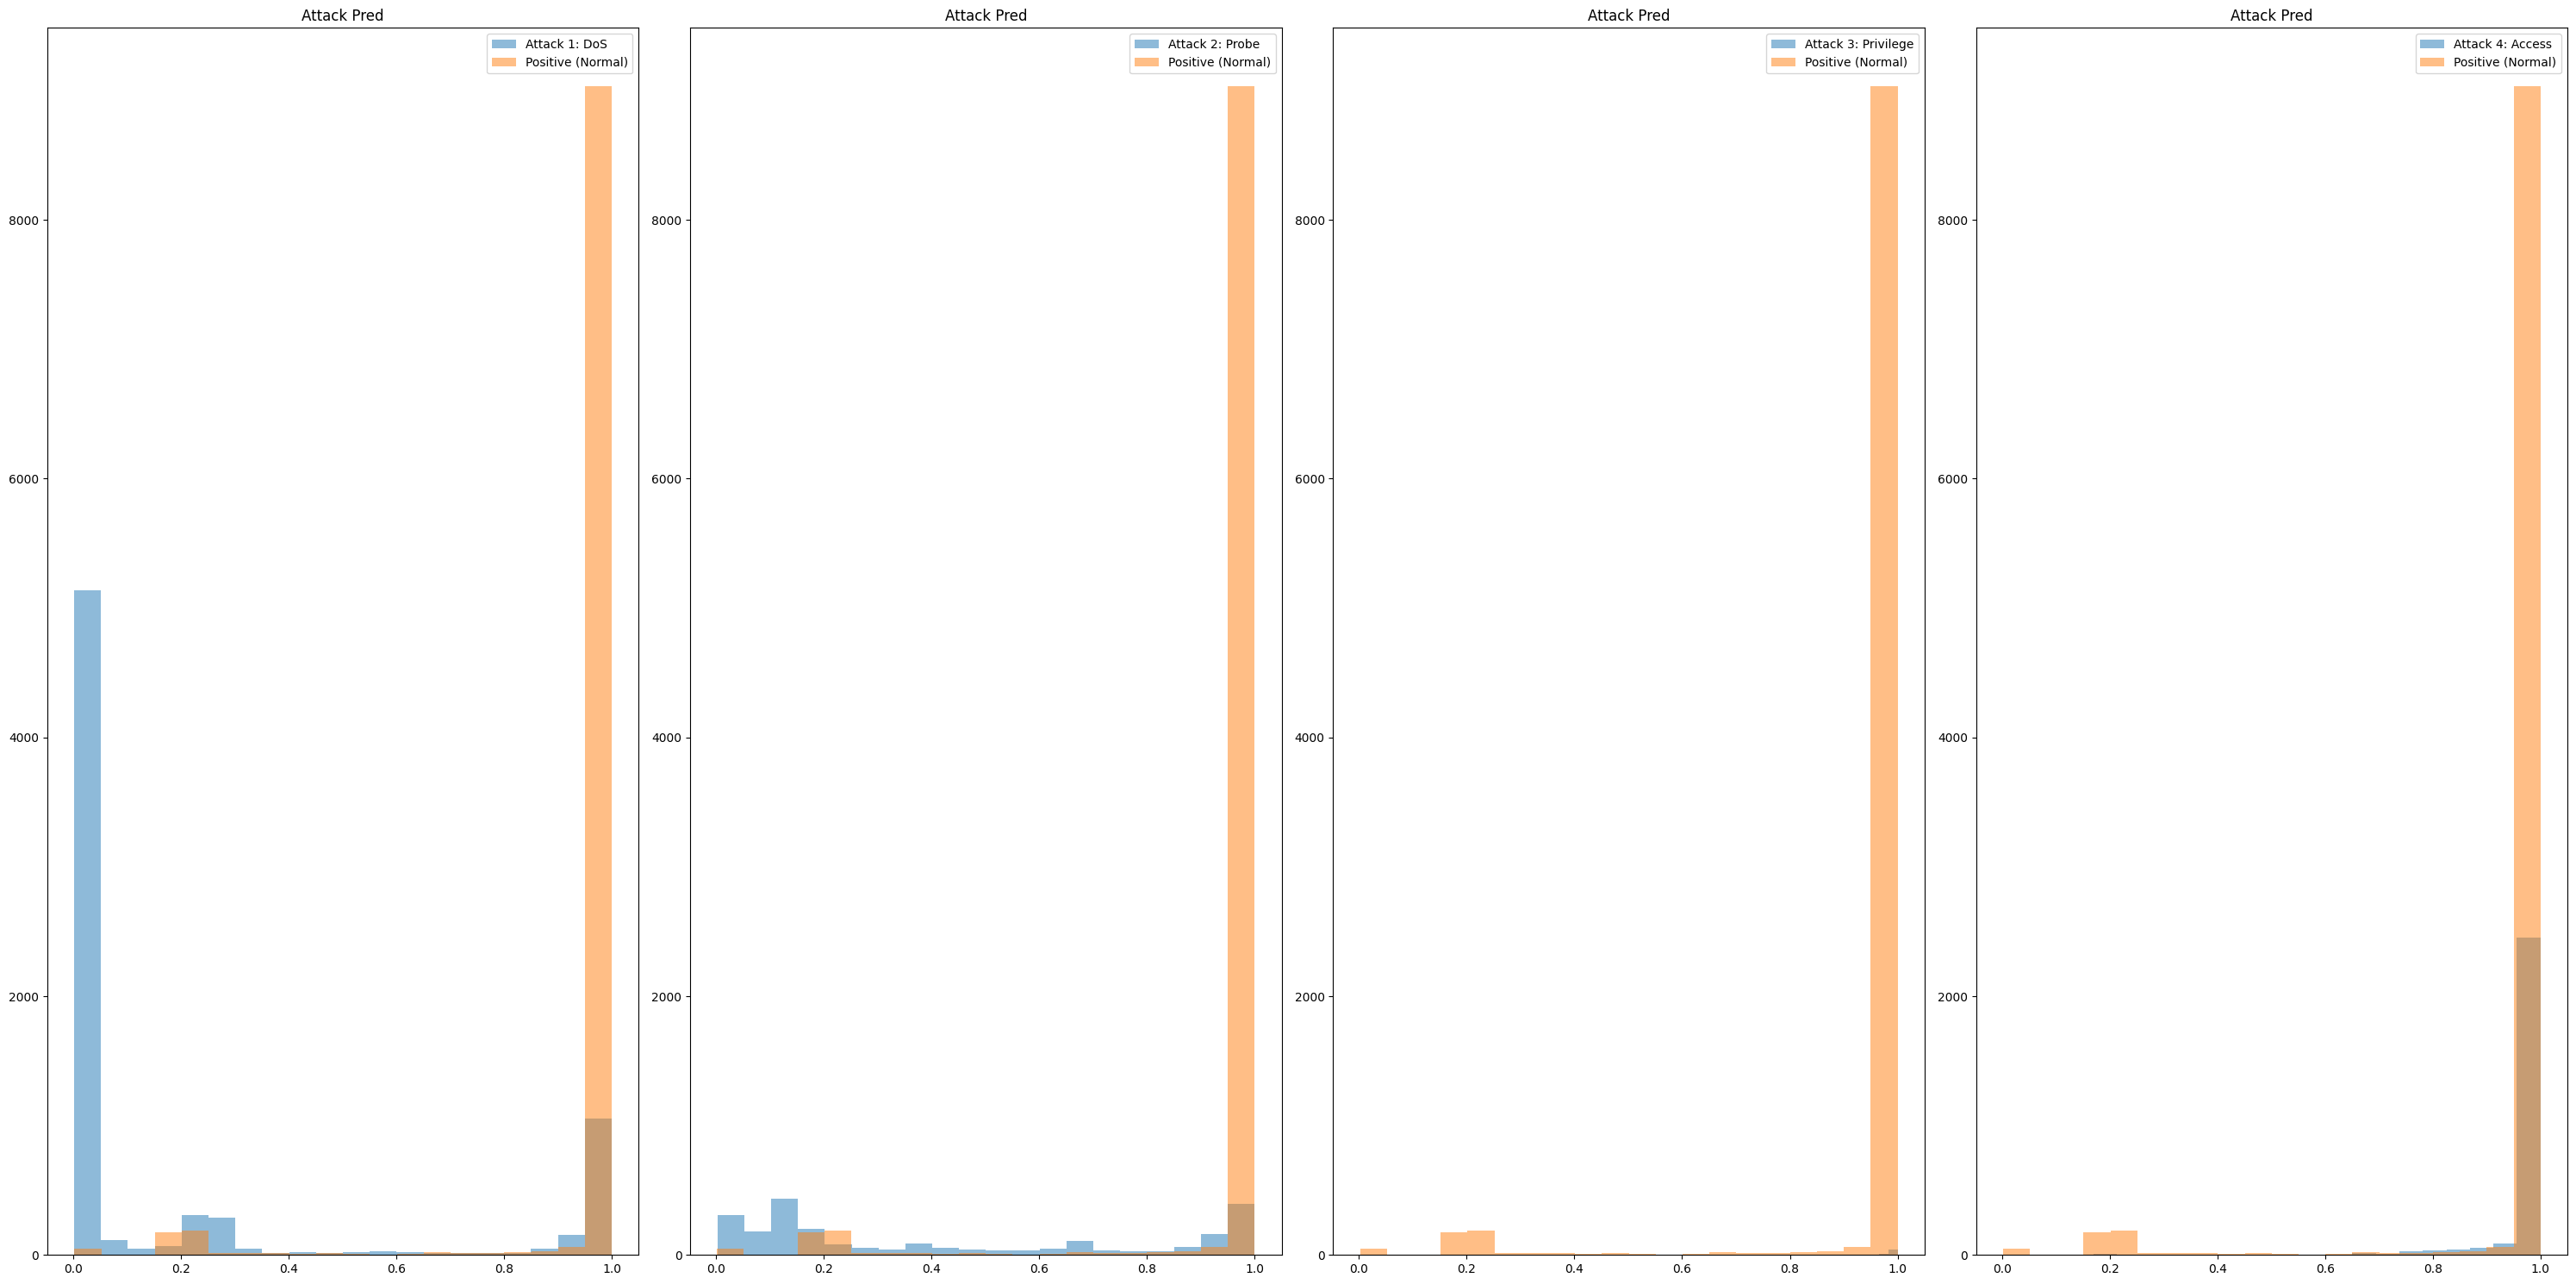

AUPR Train Run 2: 0.9940602803437925
AUPR (Train): 0.993392330009486+-0.0006679503343063886
AUPR (Test): 0.8970966680783901+-0.009005072025463301


,0,1
1,0.939656,0.940064
2,0.856605,0.776920
3,0.010775,0.010228
4,0.260061,0.185513


([0.9927243796751797, 0.9940602803437925],
 [0.9061017401038534, 0.8880915960529268],
 {0: [0.9396561850243426,
   0.8566052854023415,
   0.010774702230459957,
   0.2600611262901161],
  1: [0.9400639026685372,
   0.7769197657305434,
   0.010228080048054488,
   0.18551336729143109]})

In [42]:
#Bumped model but with a different loss function - trying logaritimic mean squared loss 
# Implemented regularization
separation = "ES"
bumped = "b"
neurons = [90,60,30]
regularisation = [tf.keras.regularizers.L2(0.01),tf.keras.regularizers.L2(0.01),tf.keras.regularizers.L2(0.01),tf.keras.regularizers.L2(0.01)]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30

auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons, regularisation=regularisation,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Regularization resulted in poor results, this is a complex data set that requires high level graphing

Model: "ES3b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 122)]             0         
                                                                 
 dense_57 (Dense)            (None, 90)                11070     
                                                                 
 bump1 (Bump)                (None, 90)                1         
                                                                 
 dense_58 (Dense)            (None, 60)                5460      
                                                                 
 bump2 (Bump)                (None, 60)                1         
                                                                 
 dense_59 (Dense)            (None, 30)                1830      
                                                                 
 bump3 (Bump)                (None, 30)                1      

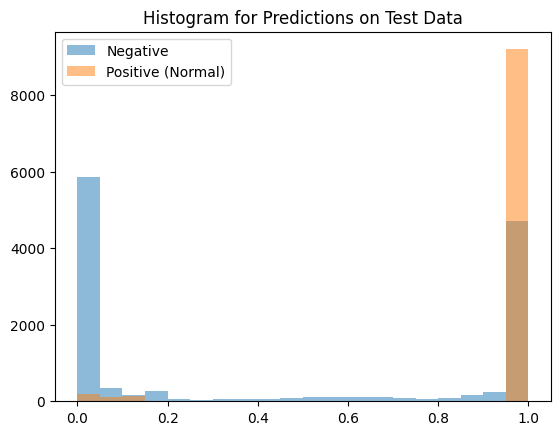

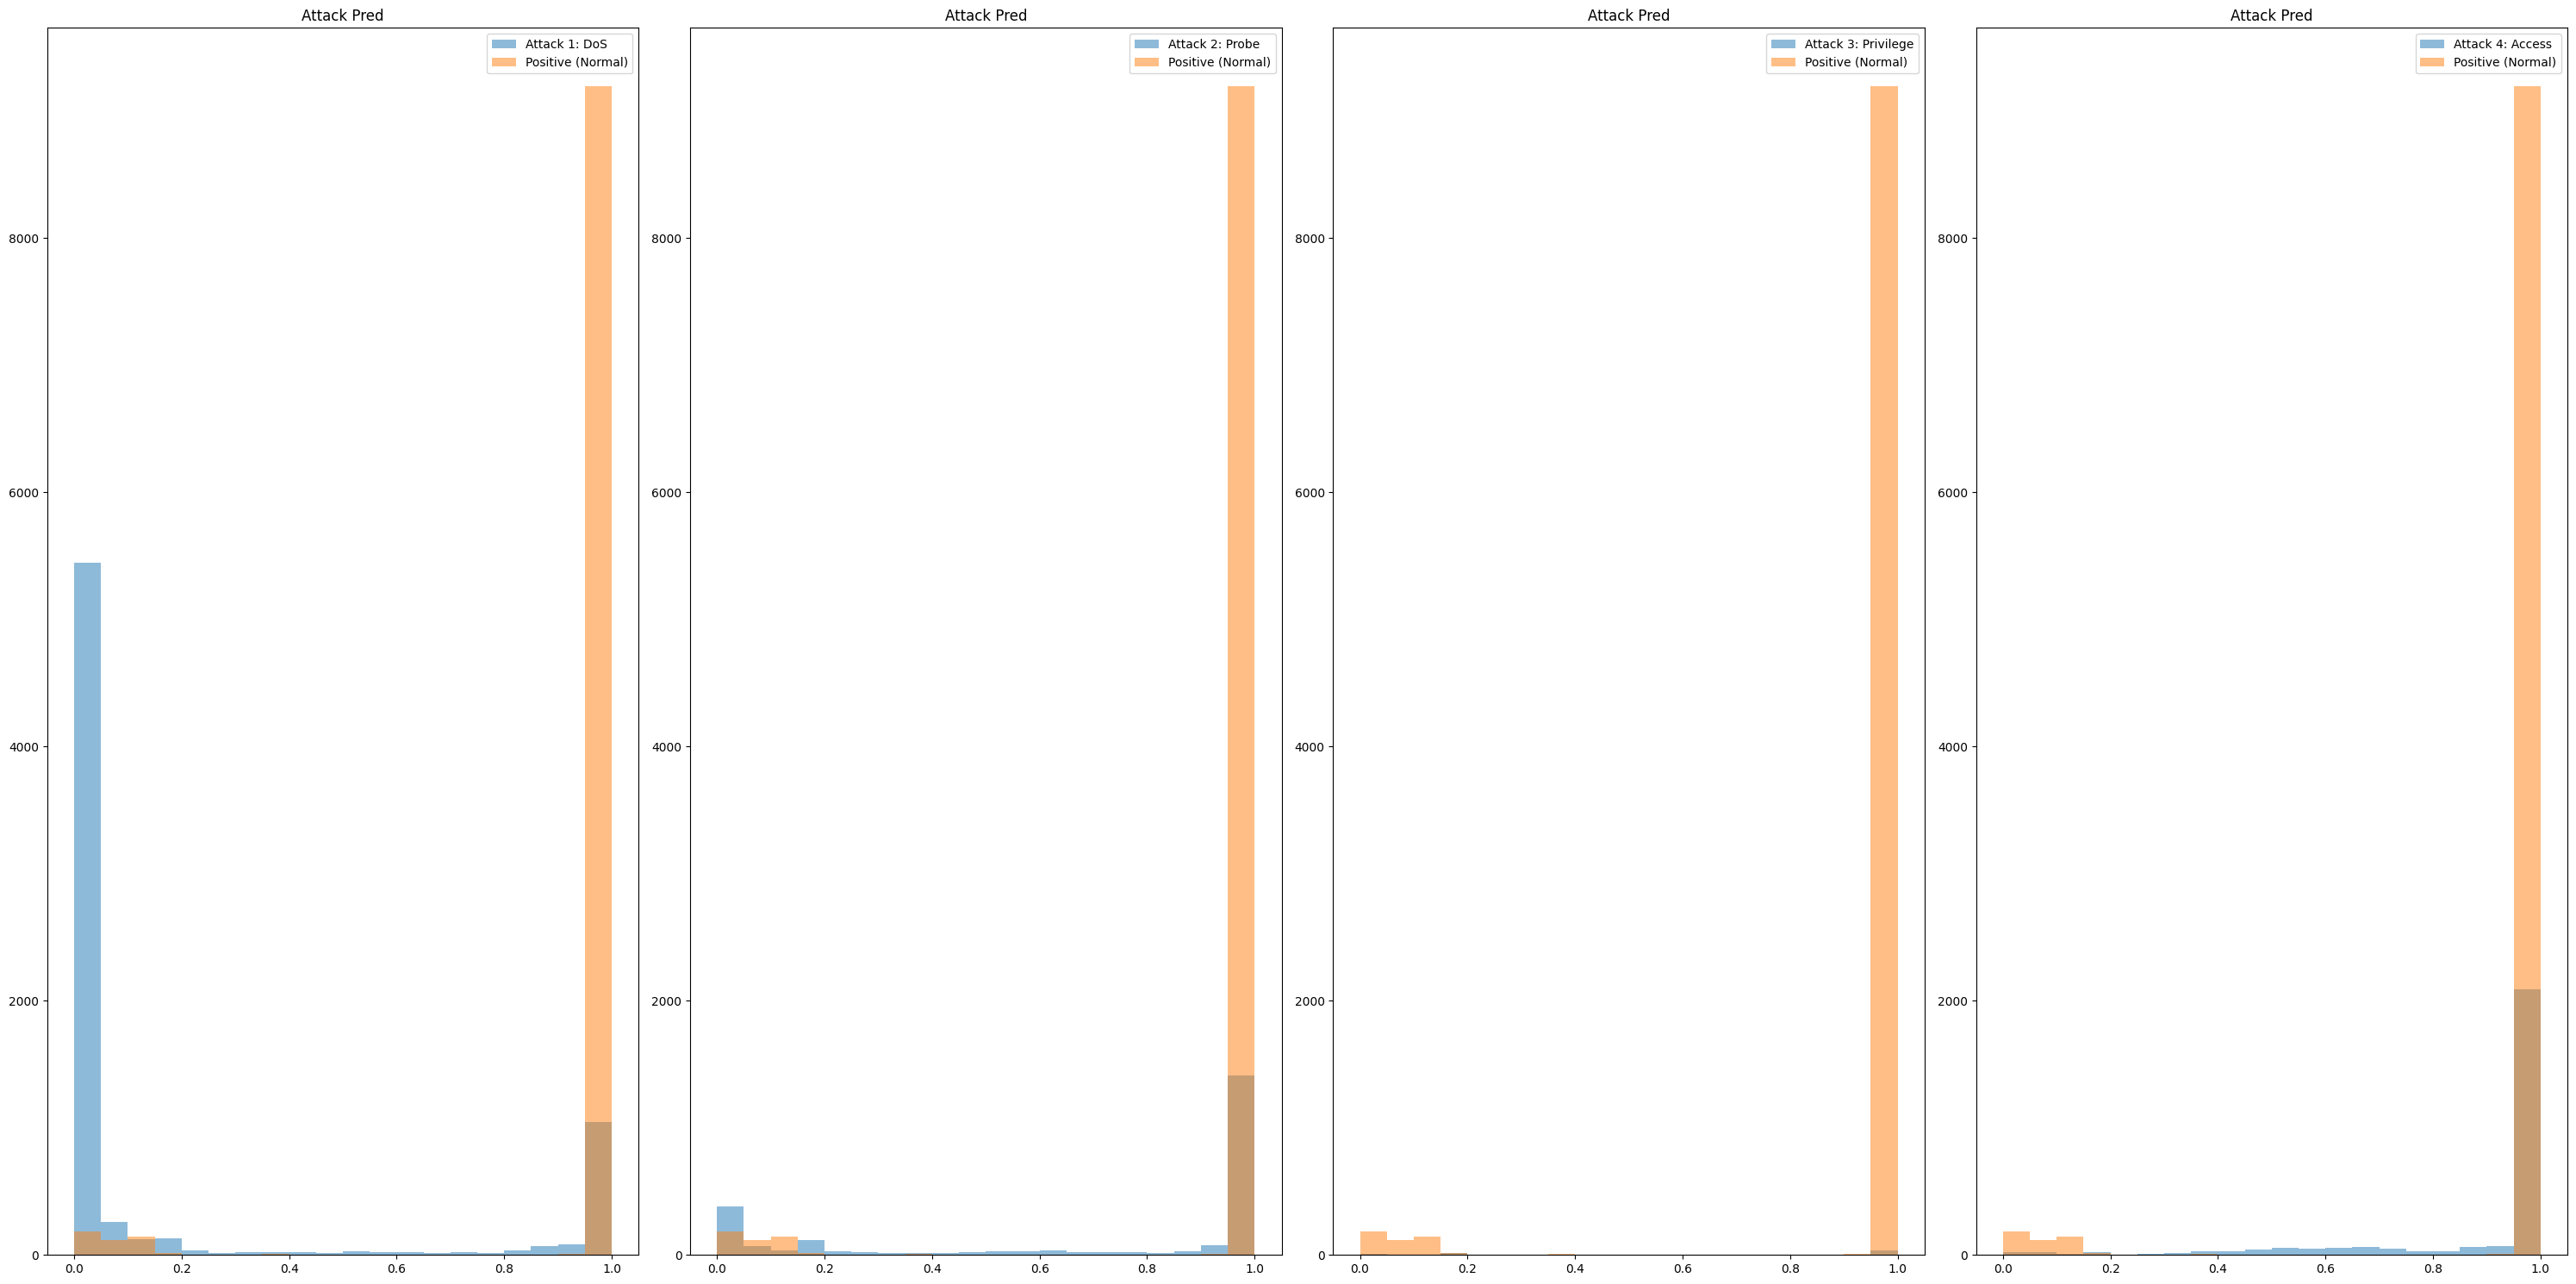

AUPR Train Run 1: 0.9974290211441824
Epoch 1/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 2/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 3/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 4/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 5/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 6/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 7/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 8/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 9/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/30
3186/3186 [===============

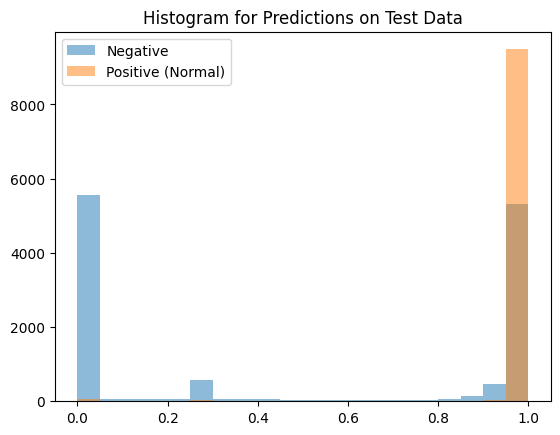

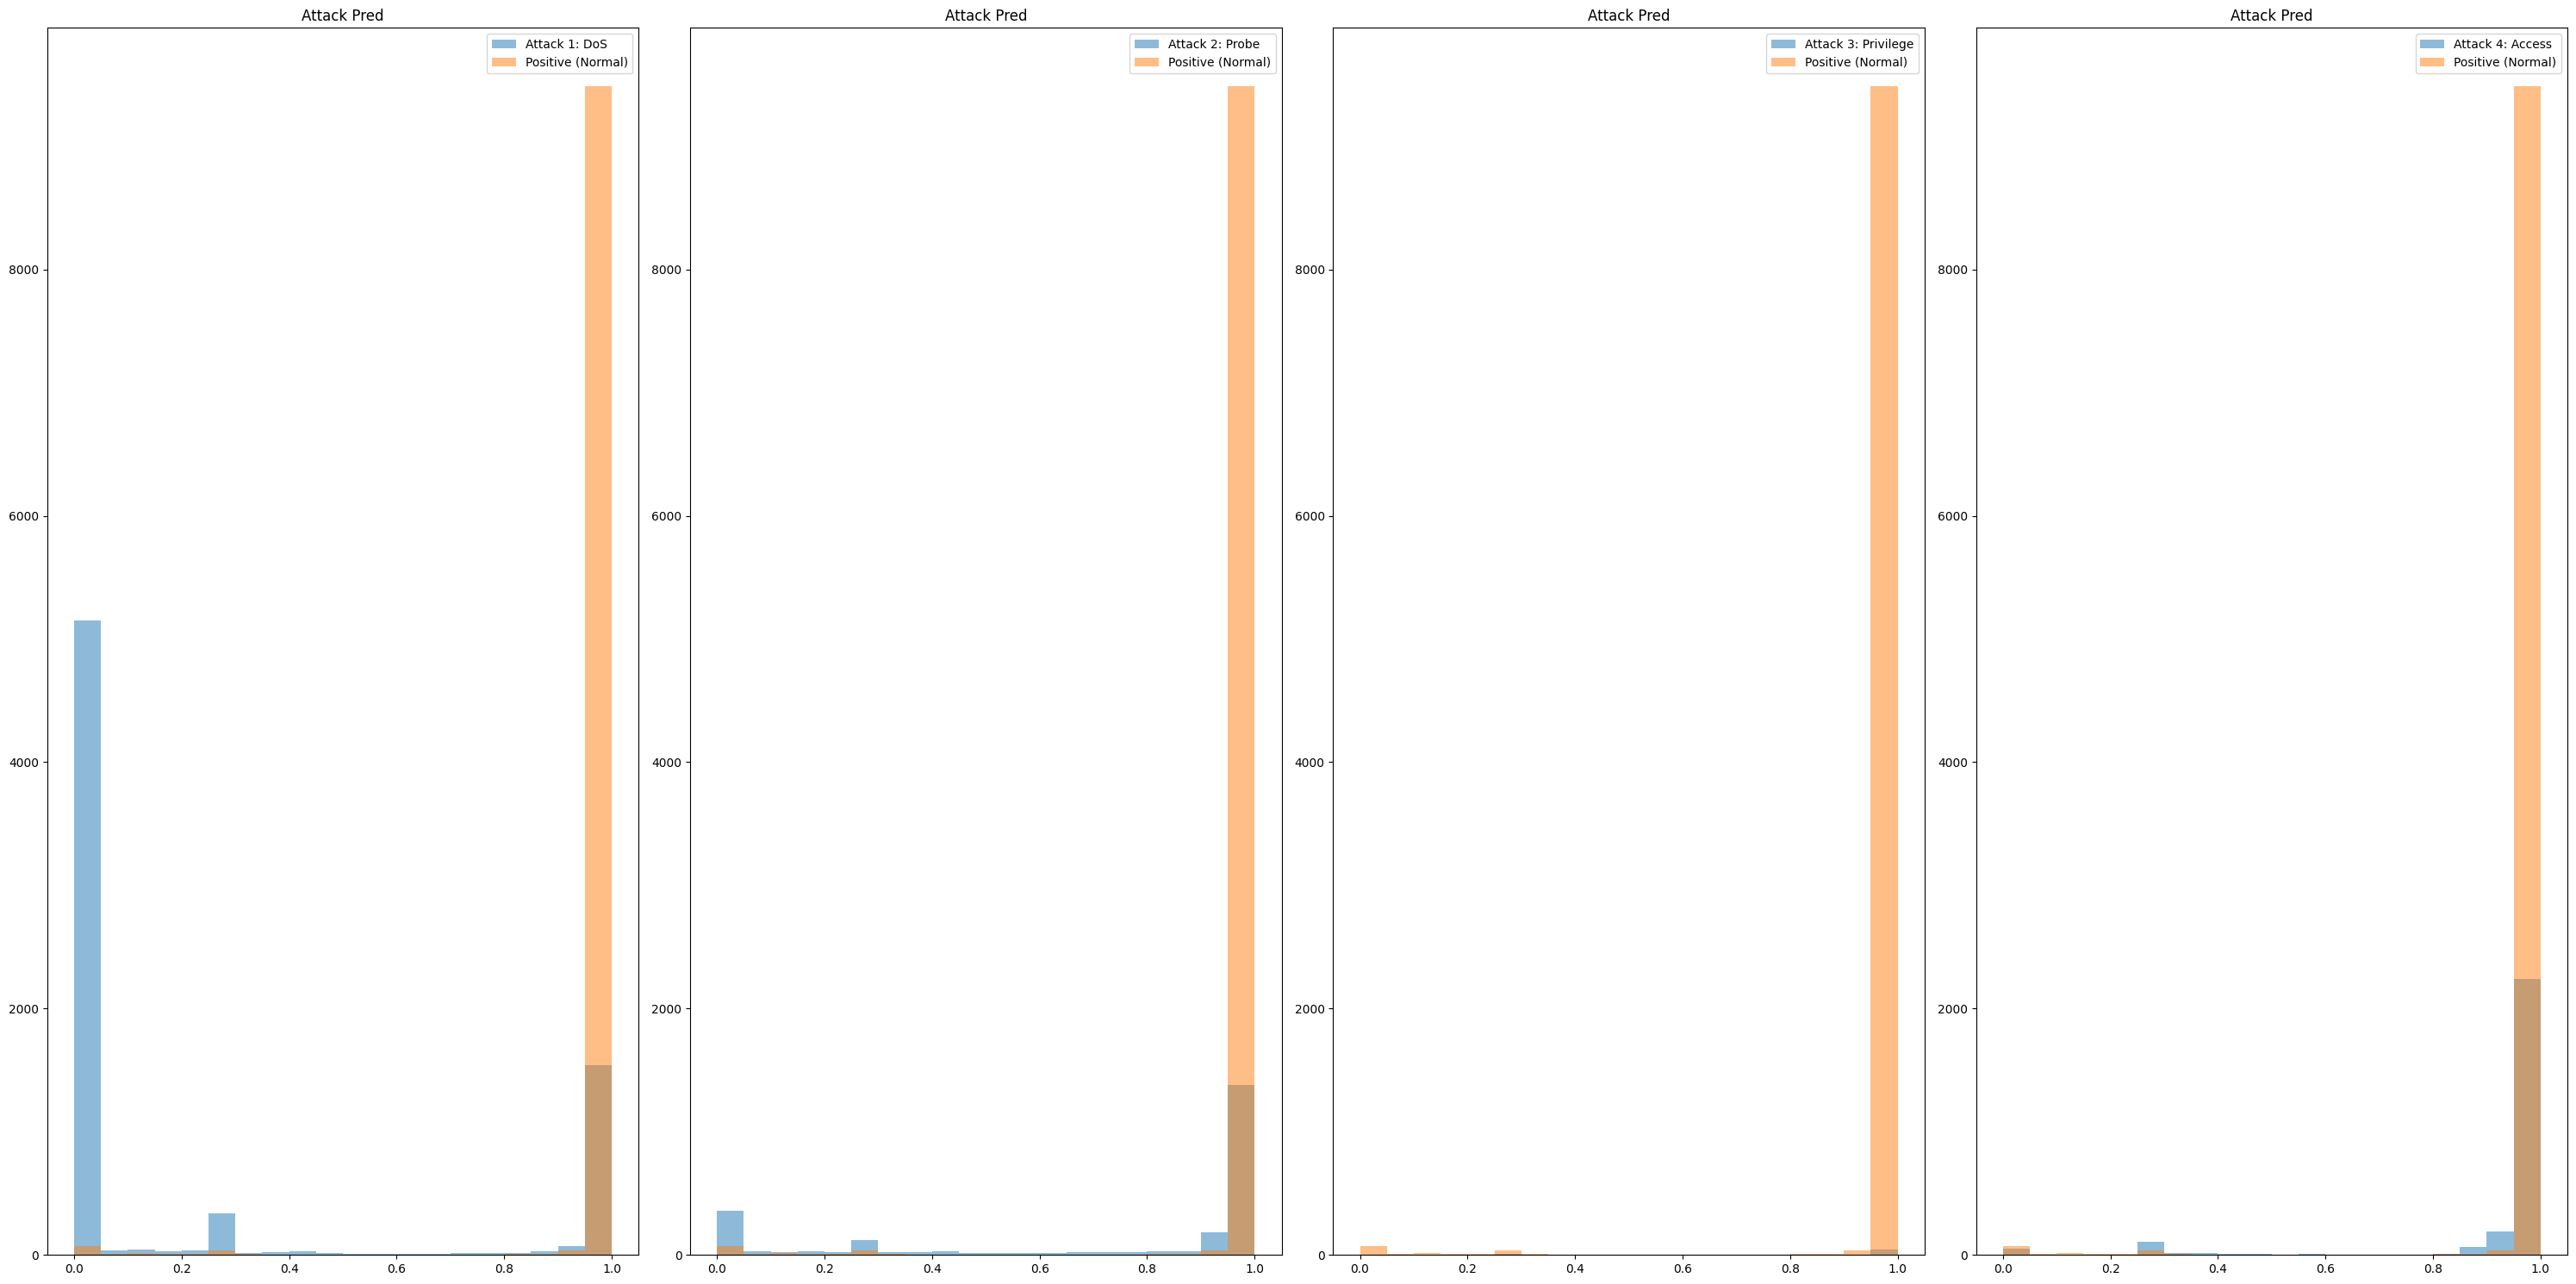

AUPR Train Run 2: 0.9948863940540642
AUPR (Train): 0.9961577075991233+-0.001271313545059105
AUPR (Test): 0.8944009387247277+-0.0048094019492409545


,0,1
1,0.945069,0.919314
2,0.534187,0.620368
3,0.024791,0.054077
4,0.363097,0.403405


([0.9974290211441824, 0.9948863940540642],
 [0.8992103406739687, 0.8895915367754867],
 {0: [0.9450691782830283,
   0.5341869748335748,
   0.024790571781216568,
   0.3630966635840911],
  1: [0.9193136276080087,
   0.6203679912035914,
   0.05407712140468805,
   0.40340549921257307]})

In [43]:
#C
#Bumped model but with a different loss function - trying logaritimic mean squared loss 
# Changing early stopping to patience = 10 and min_delta = .005
separation = "ES"
bumped = "b"
neurons = [90,60,30]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True, min_delta=.005)
auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "ES3b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_4 (Dense)             (None, 90)                11070     
                                                                 
 bump1 (Bump)                (None, 90)                1         
                                                                 
 dense_5 (Dense)             (None, 60)                5460      
                                                                 
 bump2 (Bump)                (None, 60)                1         
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 bump3 (Bump)                (None, 30)                1      

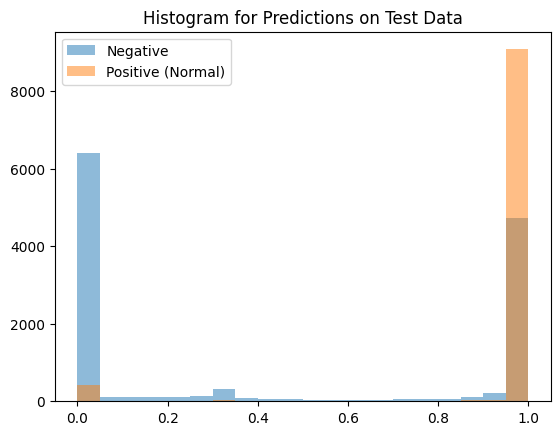

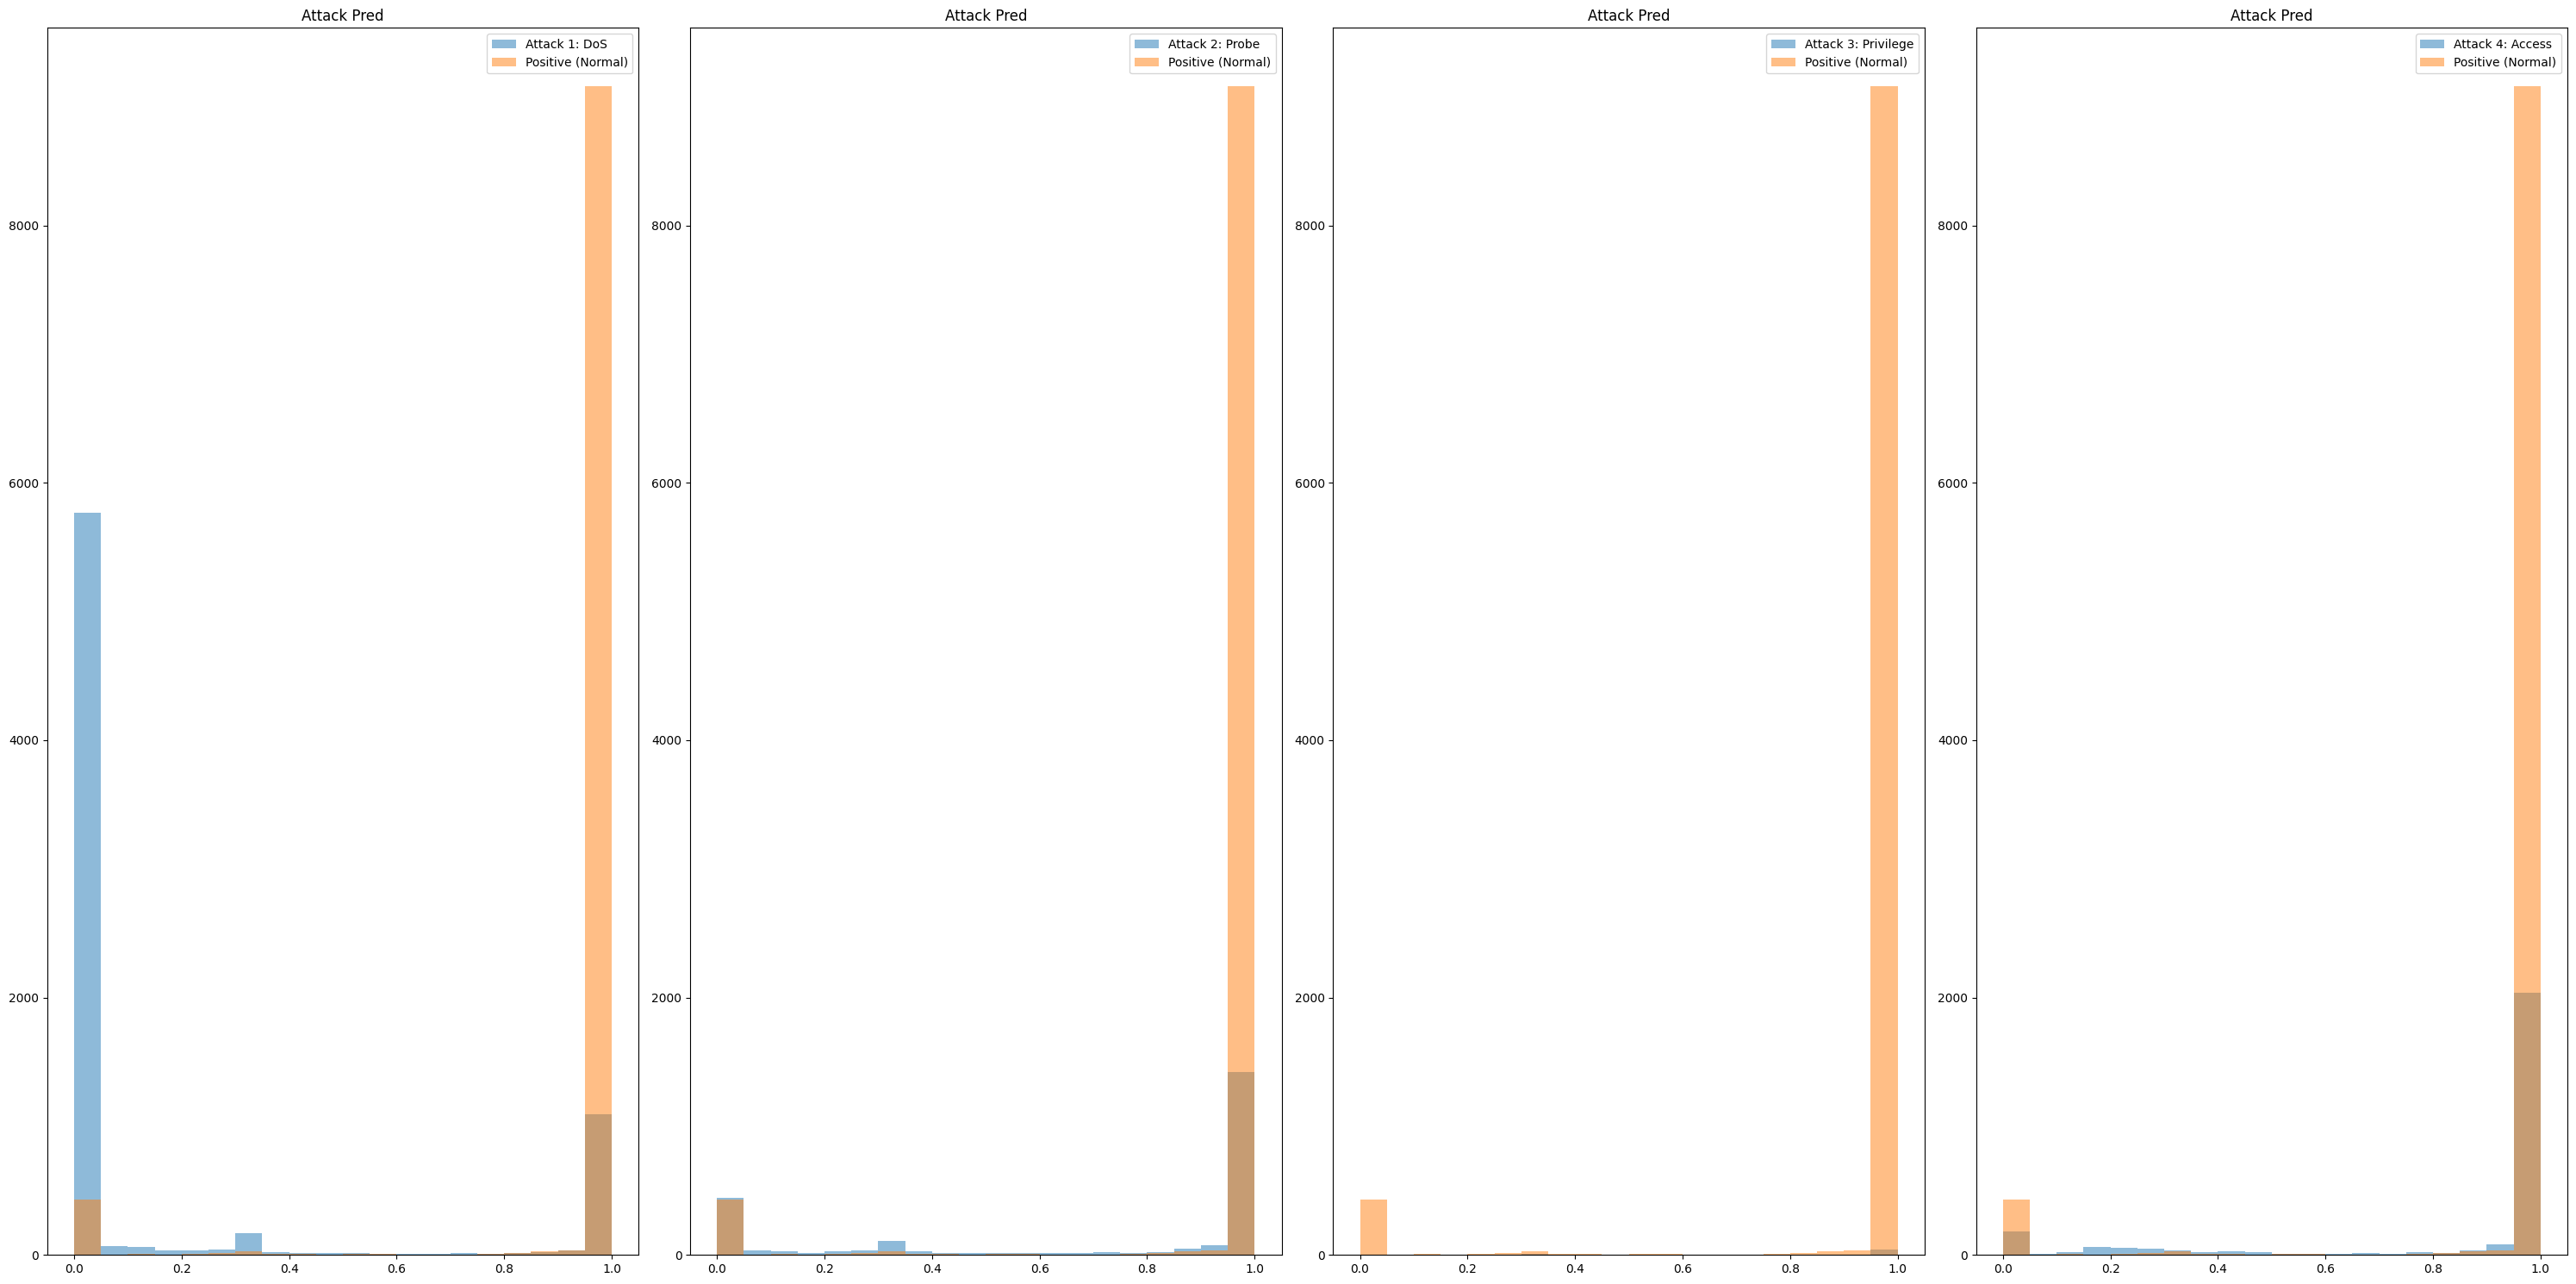

AUPR Train Run 1: 0.9950638993647669
Epoch 1/30
3186/3186 [==============================] - 8s 2ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 2/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0043 - val_loss: 0.0060
Epoch 3/30
3186/3186 [==============================] - 6s 2ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 4/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0041 - val_loss: 0.0050
Epoch 5/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 6/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 7/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 8/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 9/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 10/30
3186/3186 [======================

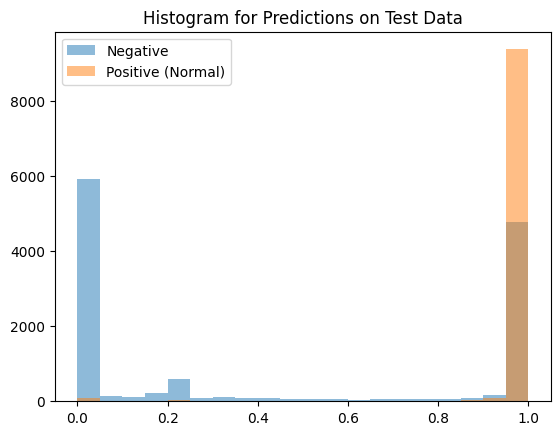

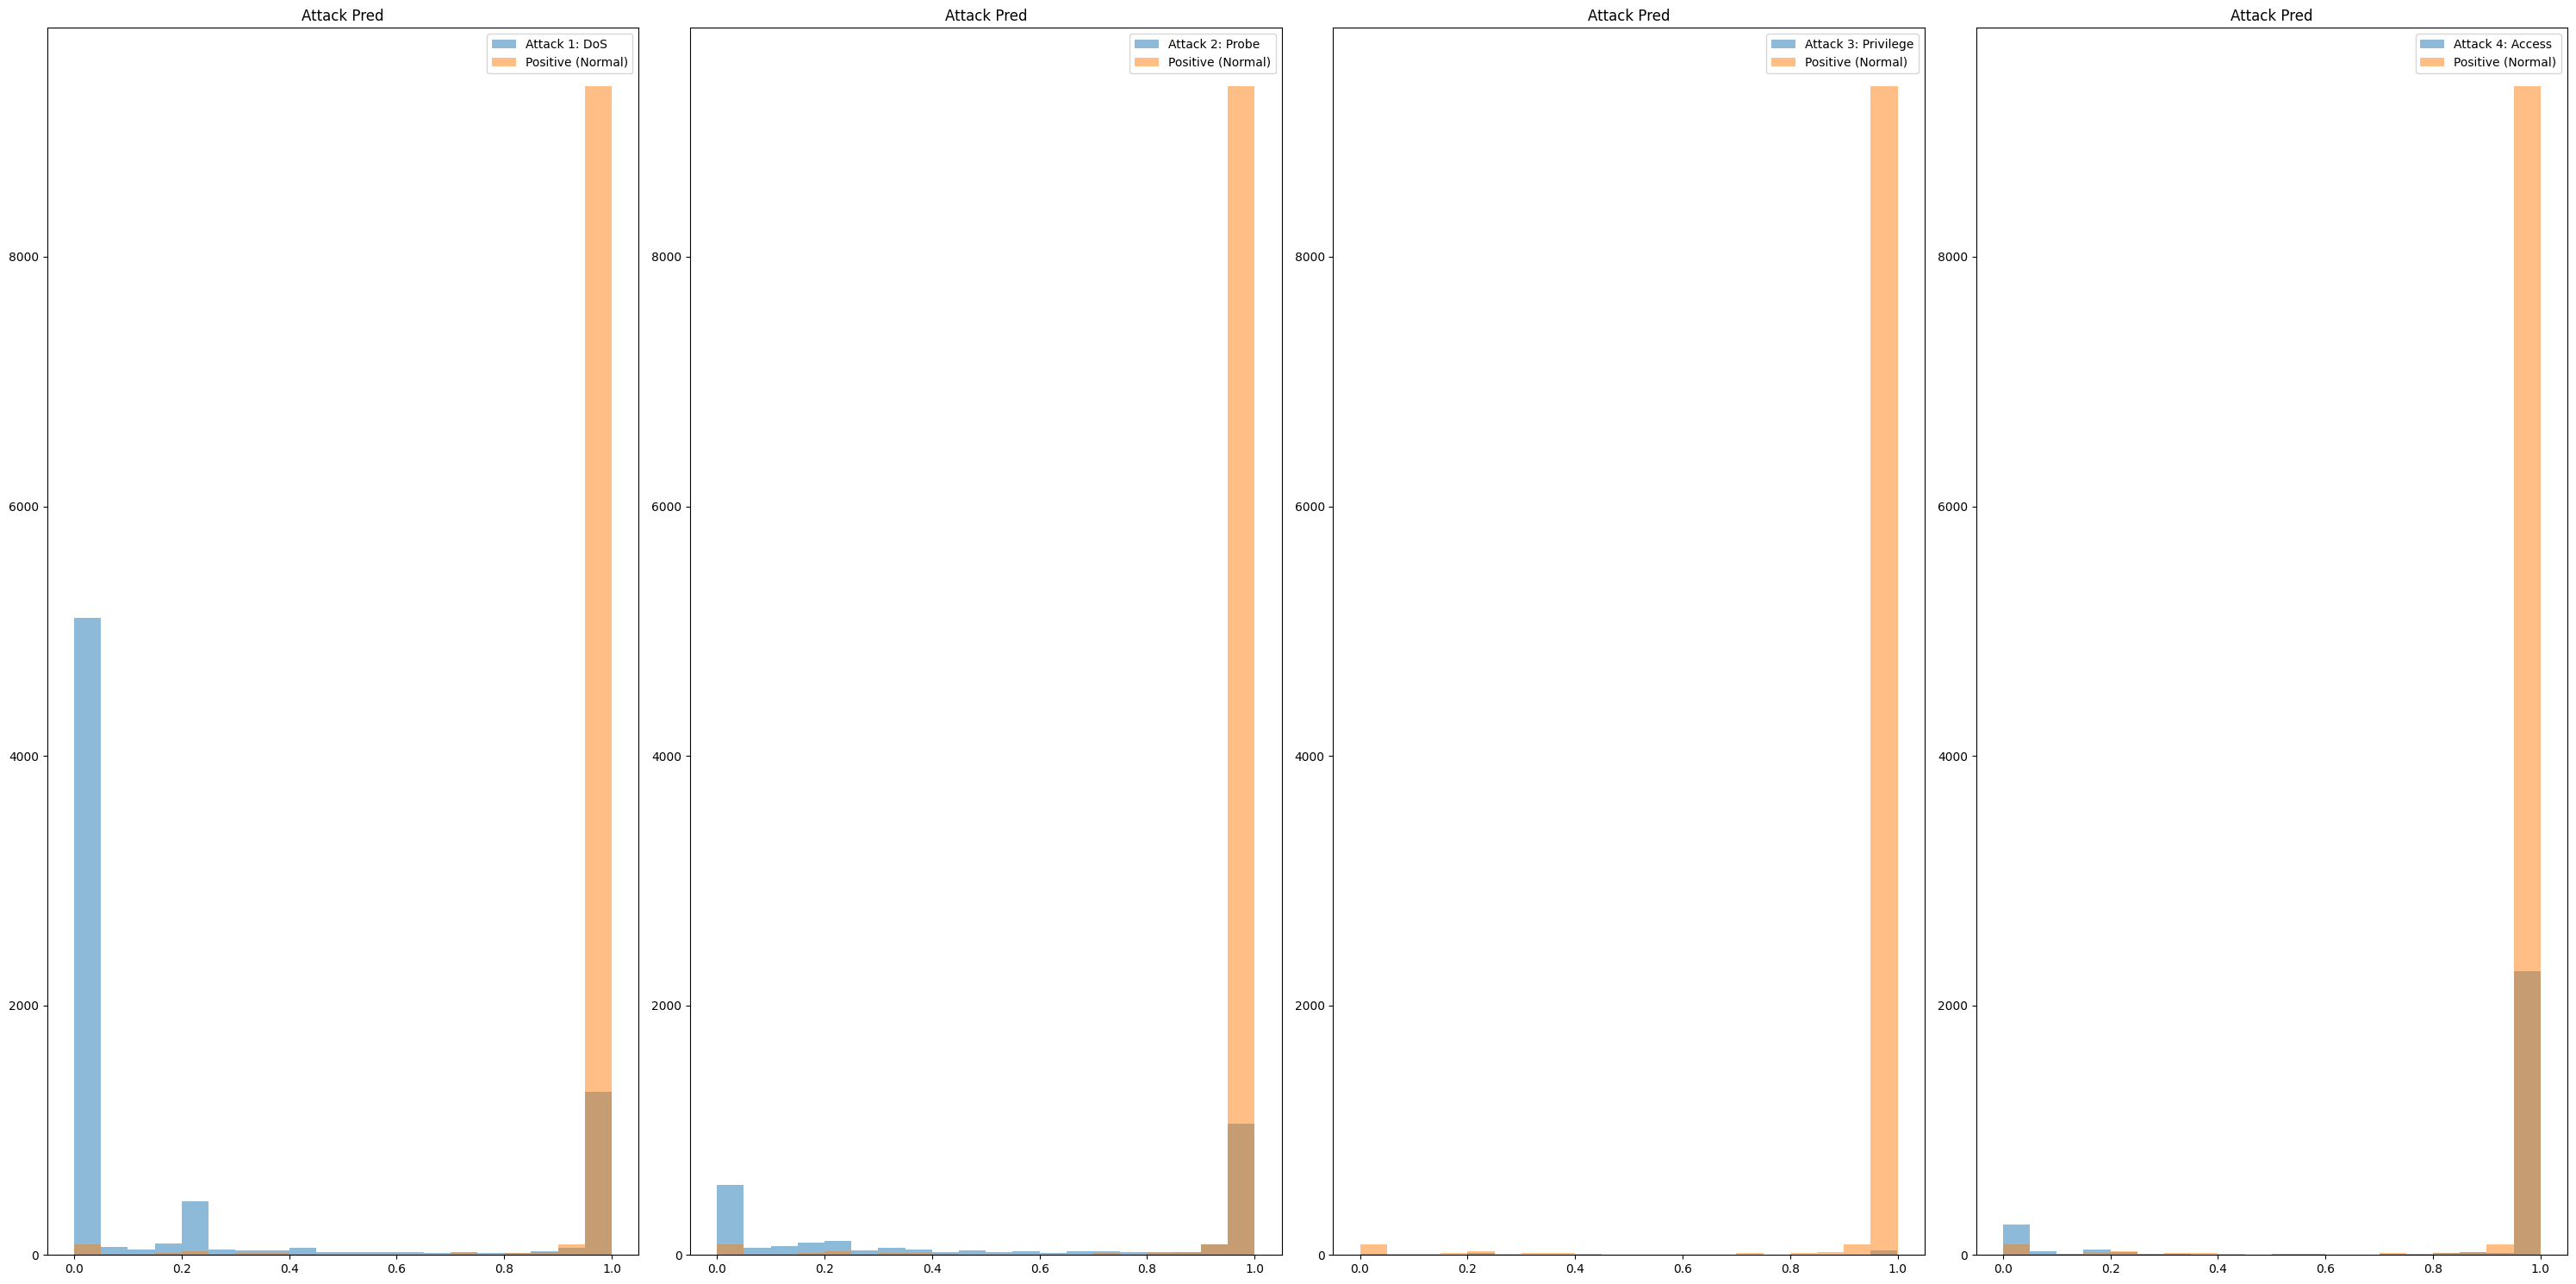

AUPR Train Run 2: 0.9965461183628175
AUPR (Train): 0.9958050088637922+-0.0007411094990252831
AUPR (Test): 0.8812385602712157+-0.009272600343839588


,0,1
1,0.879530,0.928759
2,0.460508,0.655568
3,0.023180,0.060848
4,0.405957,0.367426


([0.9950638993647669, 0.9965461183628175],
 [0.8719659599273761, 0.8905111606150553],
 {0: [0.8795304615178741,
   0.46050842181568497,
   0.023180302570486304,
   0.4059567519327514],
  1: [0.9287585755709982,
   0.6555677153836714,
   0.06084828551966146,
   0.3674264224871864]})

In [17]:
#C
#Bumped model but with a different loss function - trying logaritimic mean squared loss 
# Changing early stopping to patience = 10 and min_delta = 0.05
separation = "ES"
bumped = "b"
neurons = [90,60,30]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True, min_delta=.05)
auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='MeanSquaredLogarithmicError', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "ES3b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_16 (Dense)            (None, 90)                11070     
                                                                 
 bump1 (Bump)                (None, 90)                1         
                                                                 
 dense_17 (Dense)            (None, 60)                5460      
                                                                 
 bump2 (Bump)                (None, 60)                1         
                                                                 
 dense_18 (Dense)            (None, 30)                1830      
                                                                 
 bump3 (Bump)                (None, 30)                1      

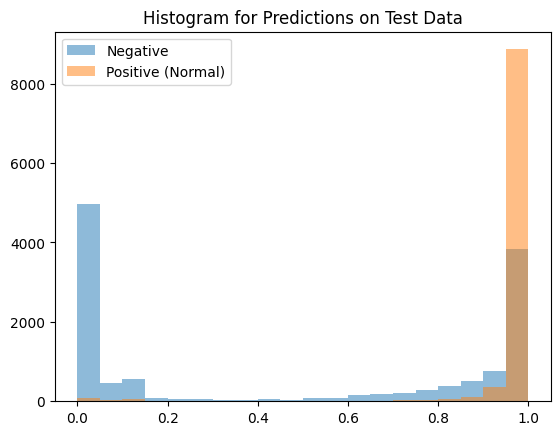

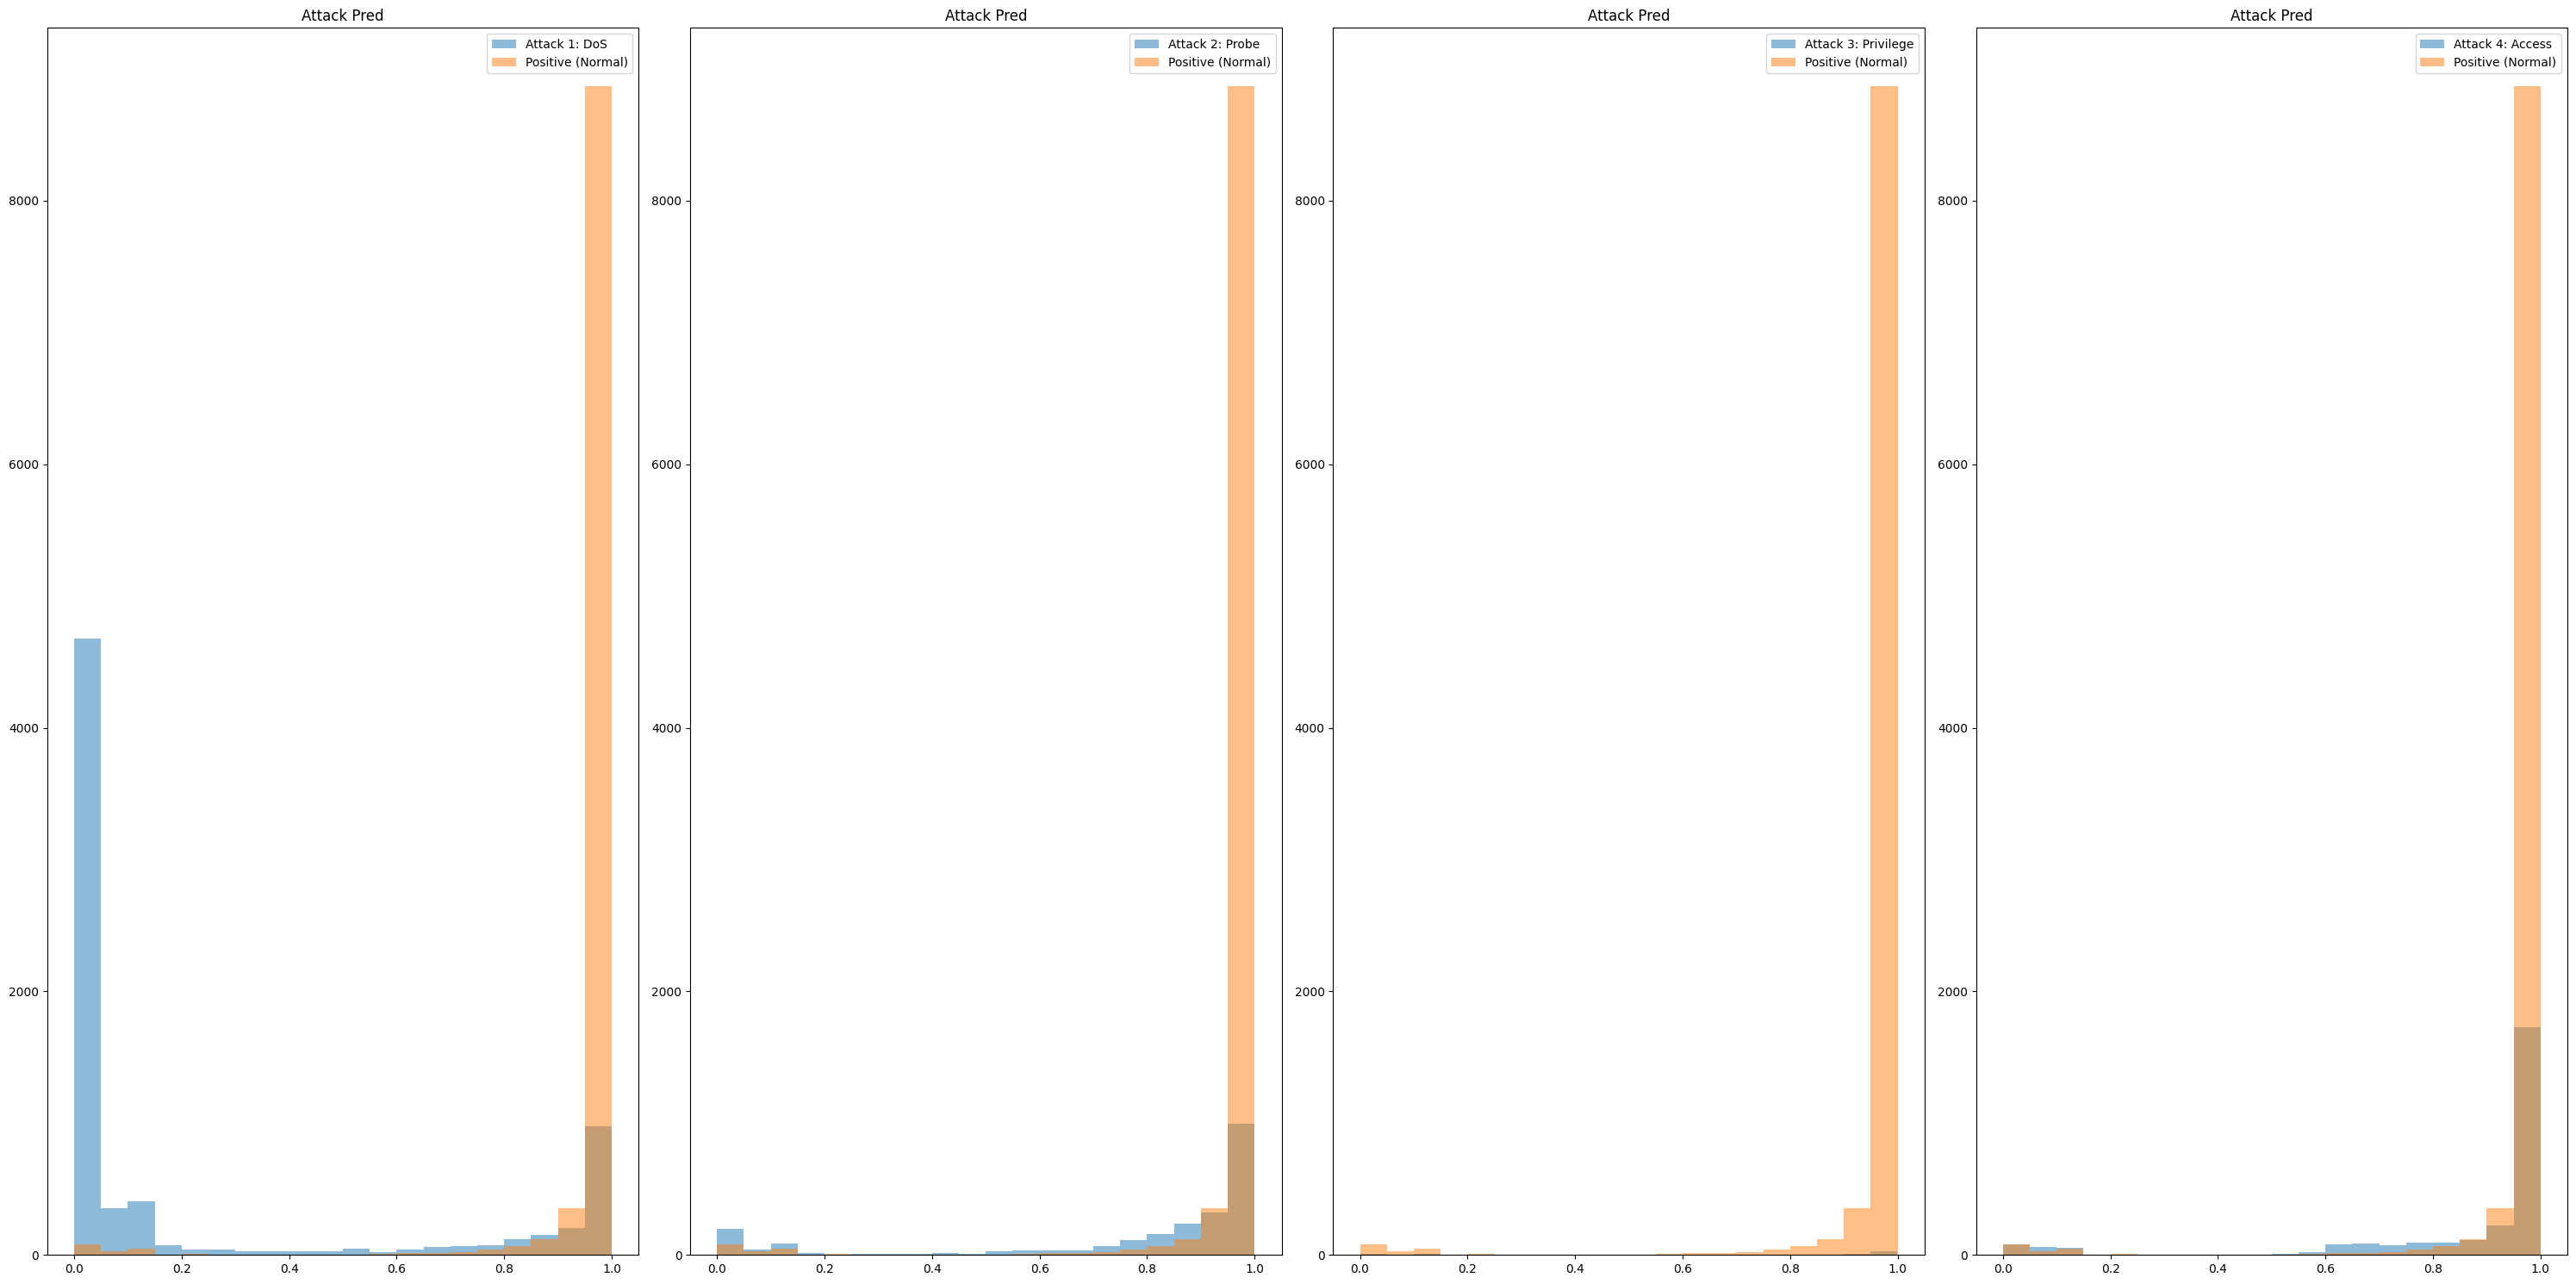

AUPR Train Run 1: 0.9764640778095859
Epoch 1/30
3186/3186 [==============================] - 8s 2ms/step - loss: 0.0503 - val_loss: 0.0191
Epoch 2/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.1002 - val_loss: 0.0721
Epoch 3/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0614 - val_loss: 0.0486
Epoch 4/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0500 - val_loss: 0.0280
Epoch 5/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0497 - val_loss: 0.0692
Epoch 6/30
3186/3186 [==============================] - 8s 2ms/step - loss: 0.0555 - val_loss: 0.0344
Epoch 7/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0497 - val_loss: 0.0423
Epoch 8/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0549 - val_loss: 0.0381
Epoch 9/30
3186/3186 [==============================] - 7s 2ms/step - loss: 0.0632 - val_loss: 0.0440
Epoch 10/30
3186/3186 [======================

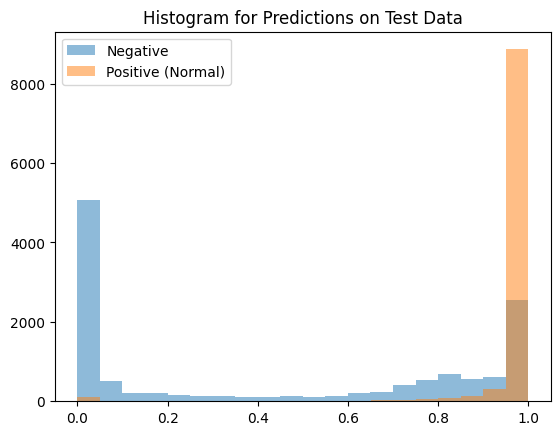

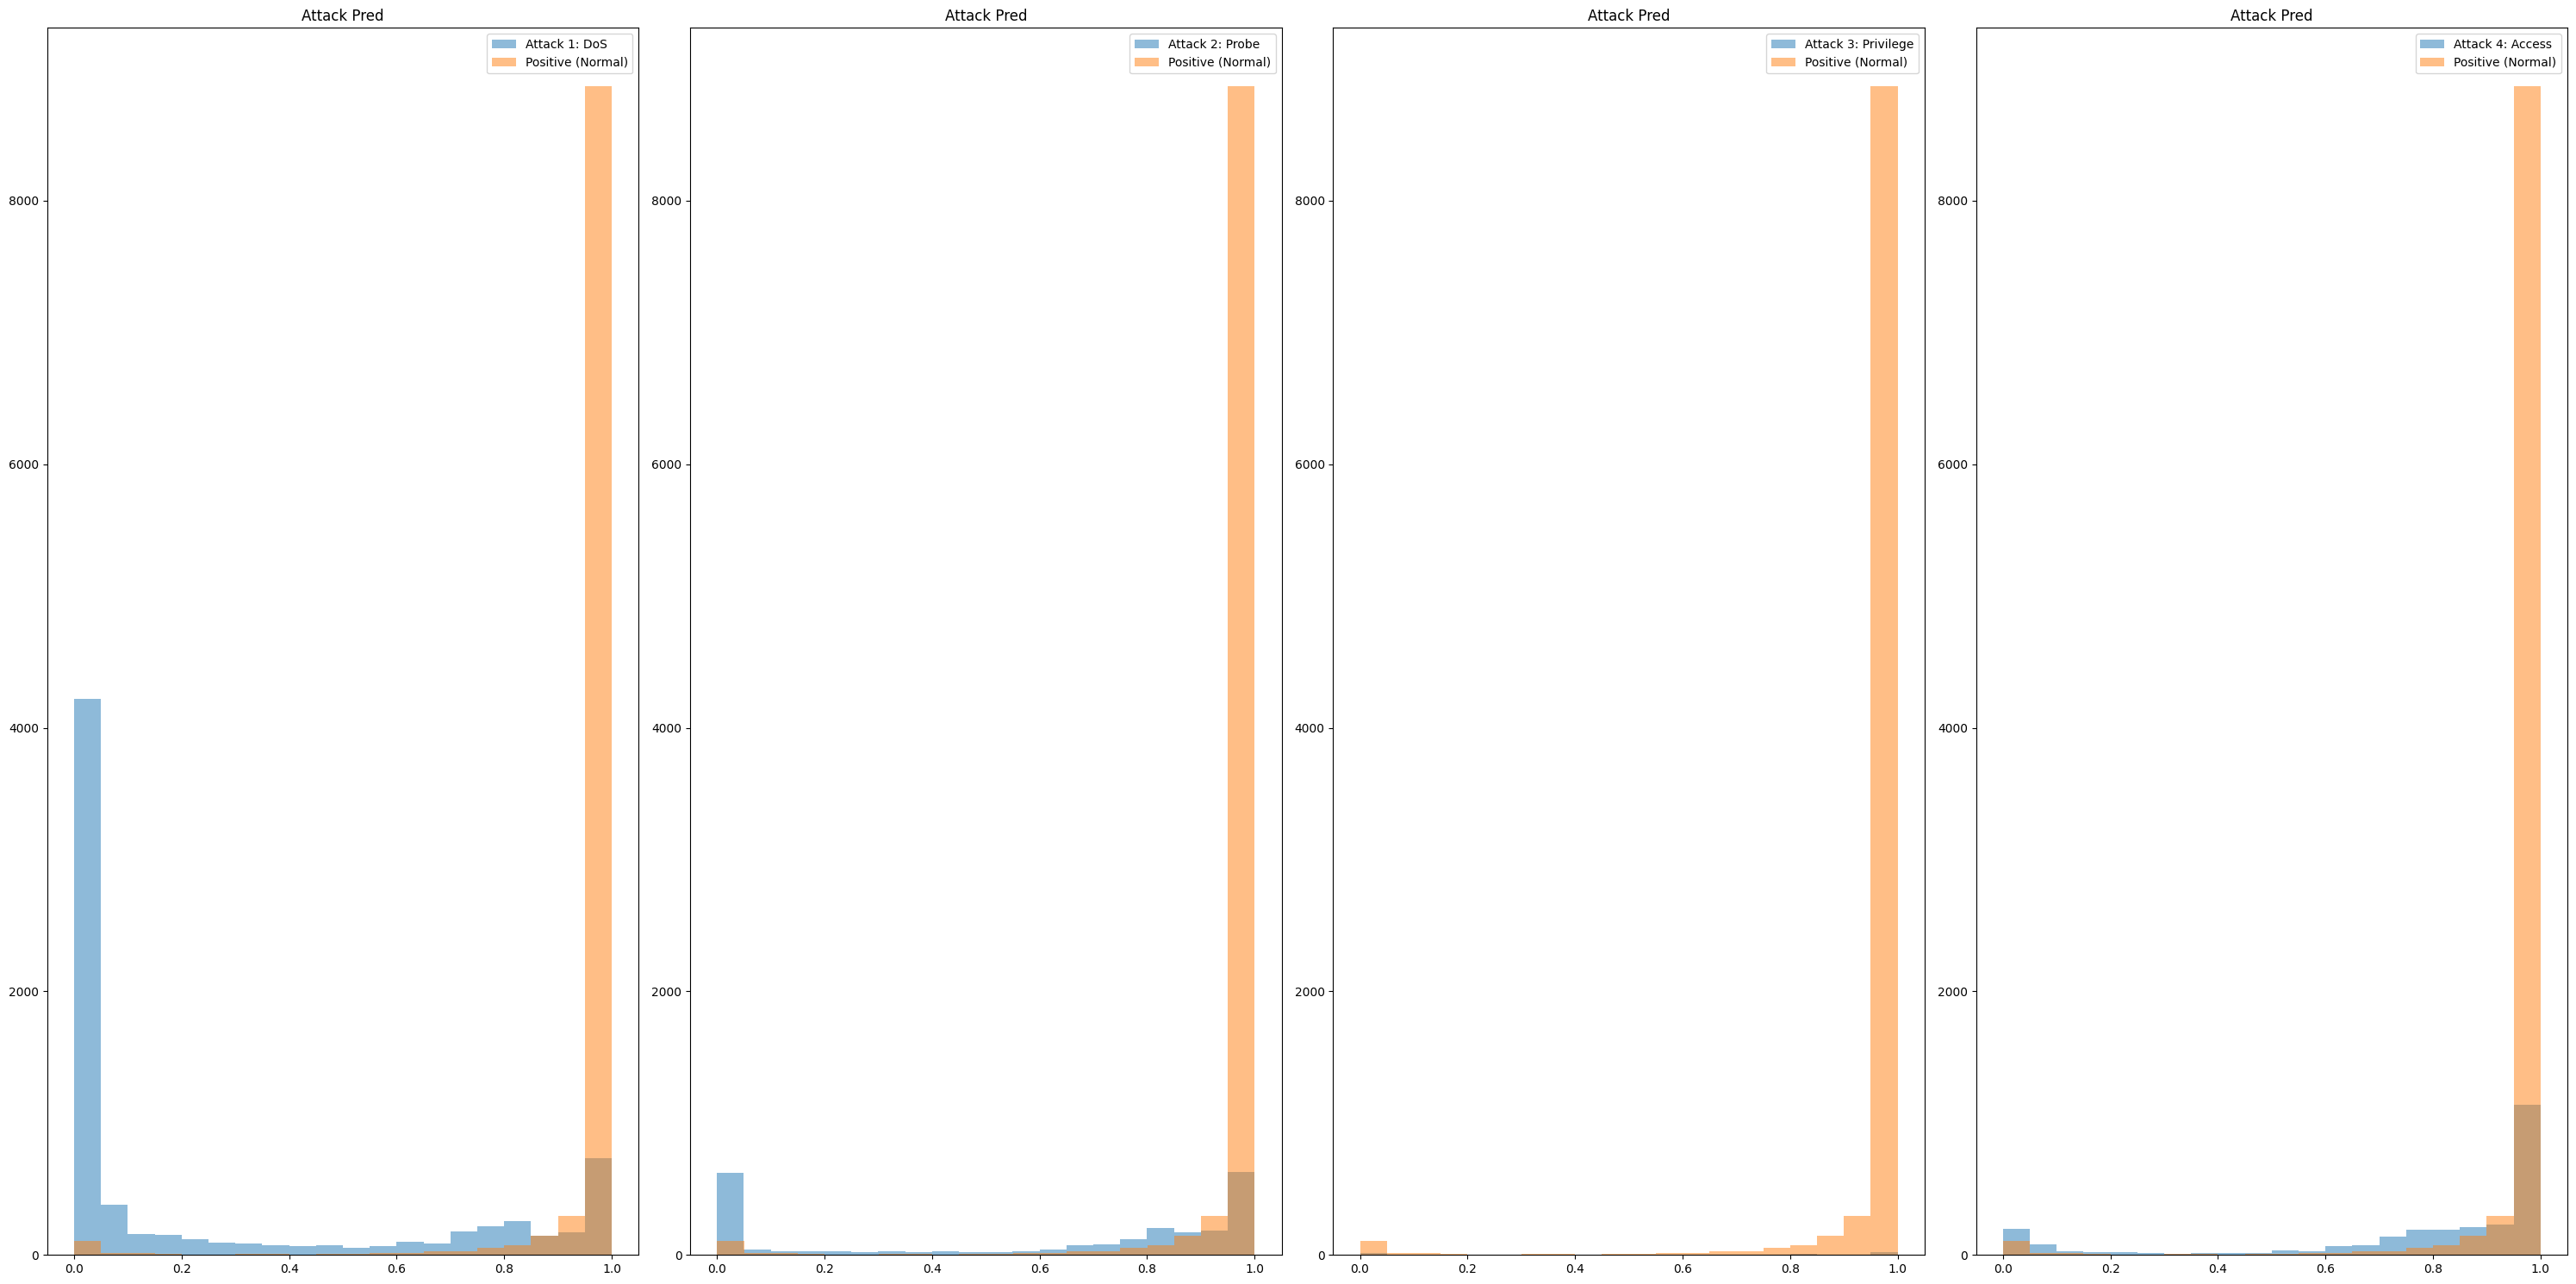

AUPR Train Run 2: 0.9589122674914848
AUPR (Train): 0.9676881726505353+-0.008775905159050523
AUPR (Test): 0.9213777258308558+-0.026361827407648752


,0,1
1,0.933055,0.954202
2,0.521344,0.767124
3,0.053938,0.097894
4,0.413898,0.637677


([0.9764640778095859, 0.9589122674914848],
 [0.8950158984232071, 0.9477395532385046],
 {0: [0.9330546943282384,
   0.5213441175720915,
   0.05393843161264603,
   0.4138976348228298],
  1: [0.9542020575607871,
   0.7671243491386961,
   0.09789424342014175,
   0.6376773435216394]})

In [19]:
#C
#Bumped model but with a different loss function - trying binary cross entropy again
# Changing early stopping to patience = 10 and min_delta = 0.05
separation = "ES"
bumped = "b"
neurons = [90,60,30]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True, min_delta=.05)
auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "ES4b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_24 (Dense)            (None, 60)                7380      
                                                                 
 bump1 (Bump)                (None, 60)                1         
                                                                 
 dense_25 (Dense)            (None, 45)                2745      
                                                                 
 bump2 (Bump)                (None, 45)                1         
                                                                 
 dense_26 (Dense)            (None, 30)                1380      
                                                                 
 bump3 (Bump)                (None, 30)                1      

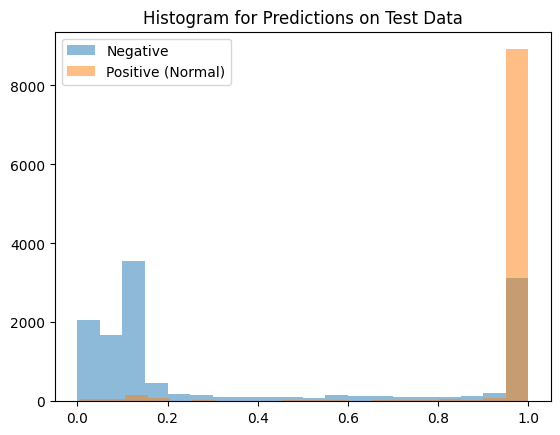

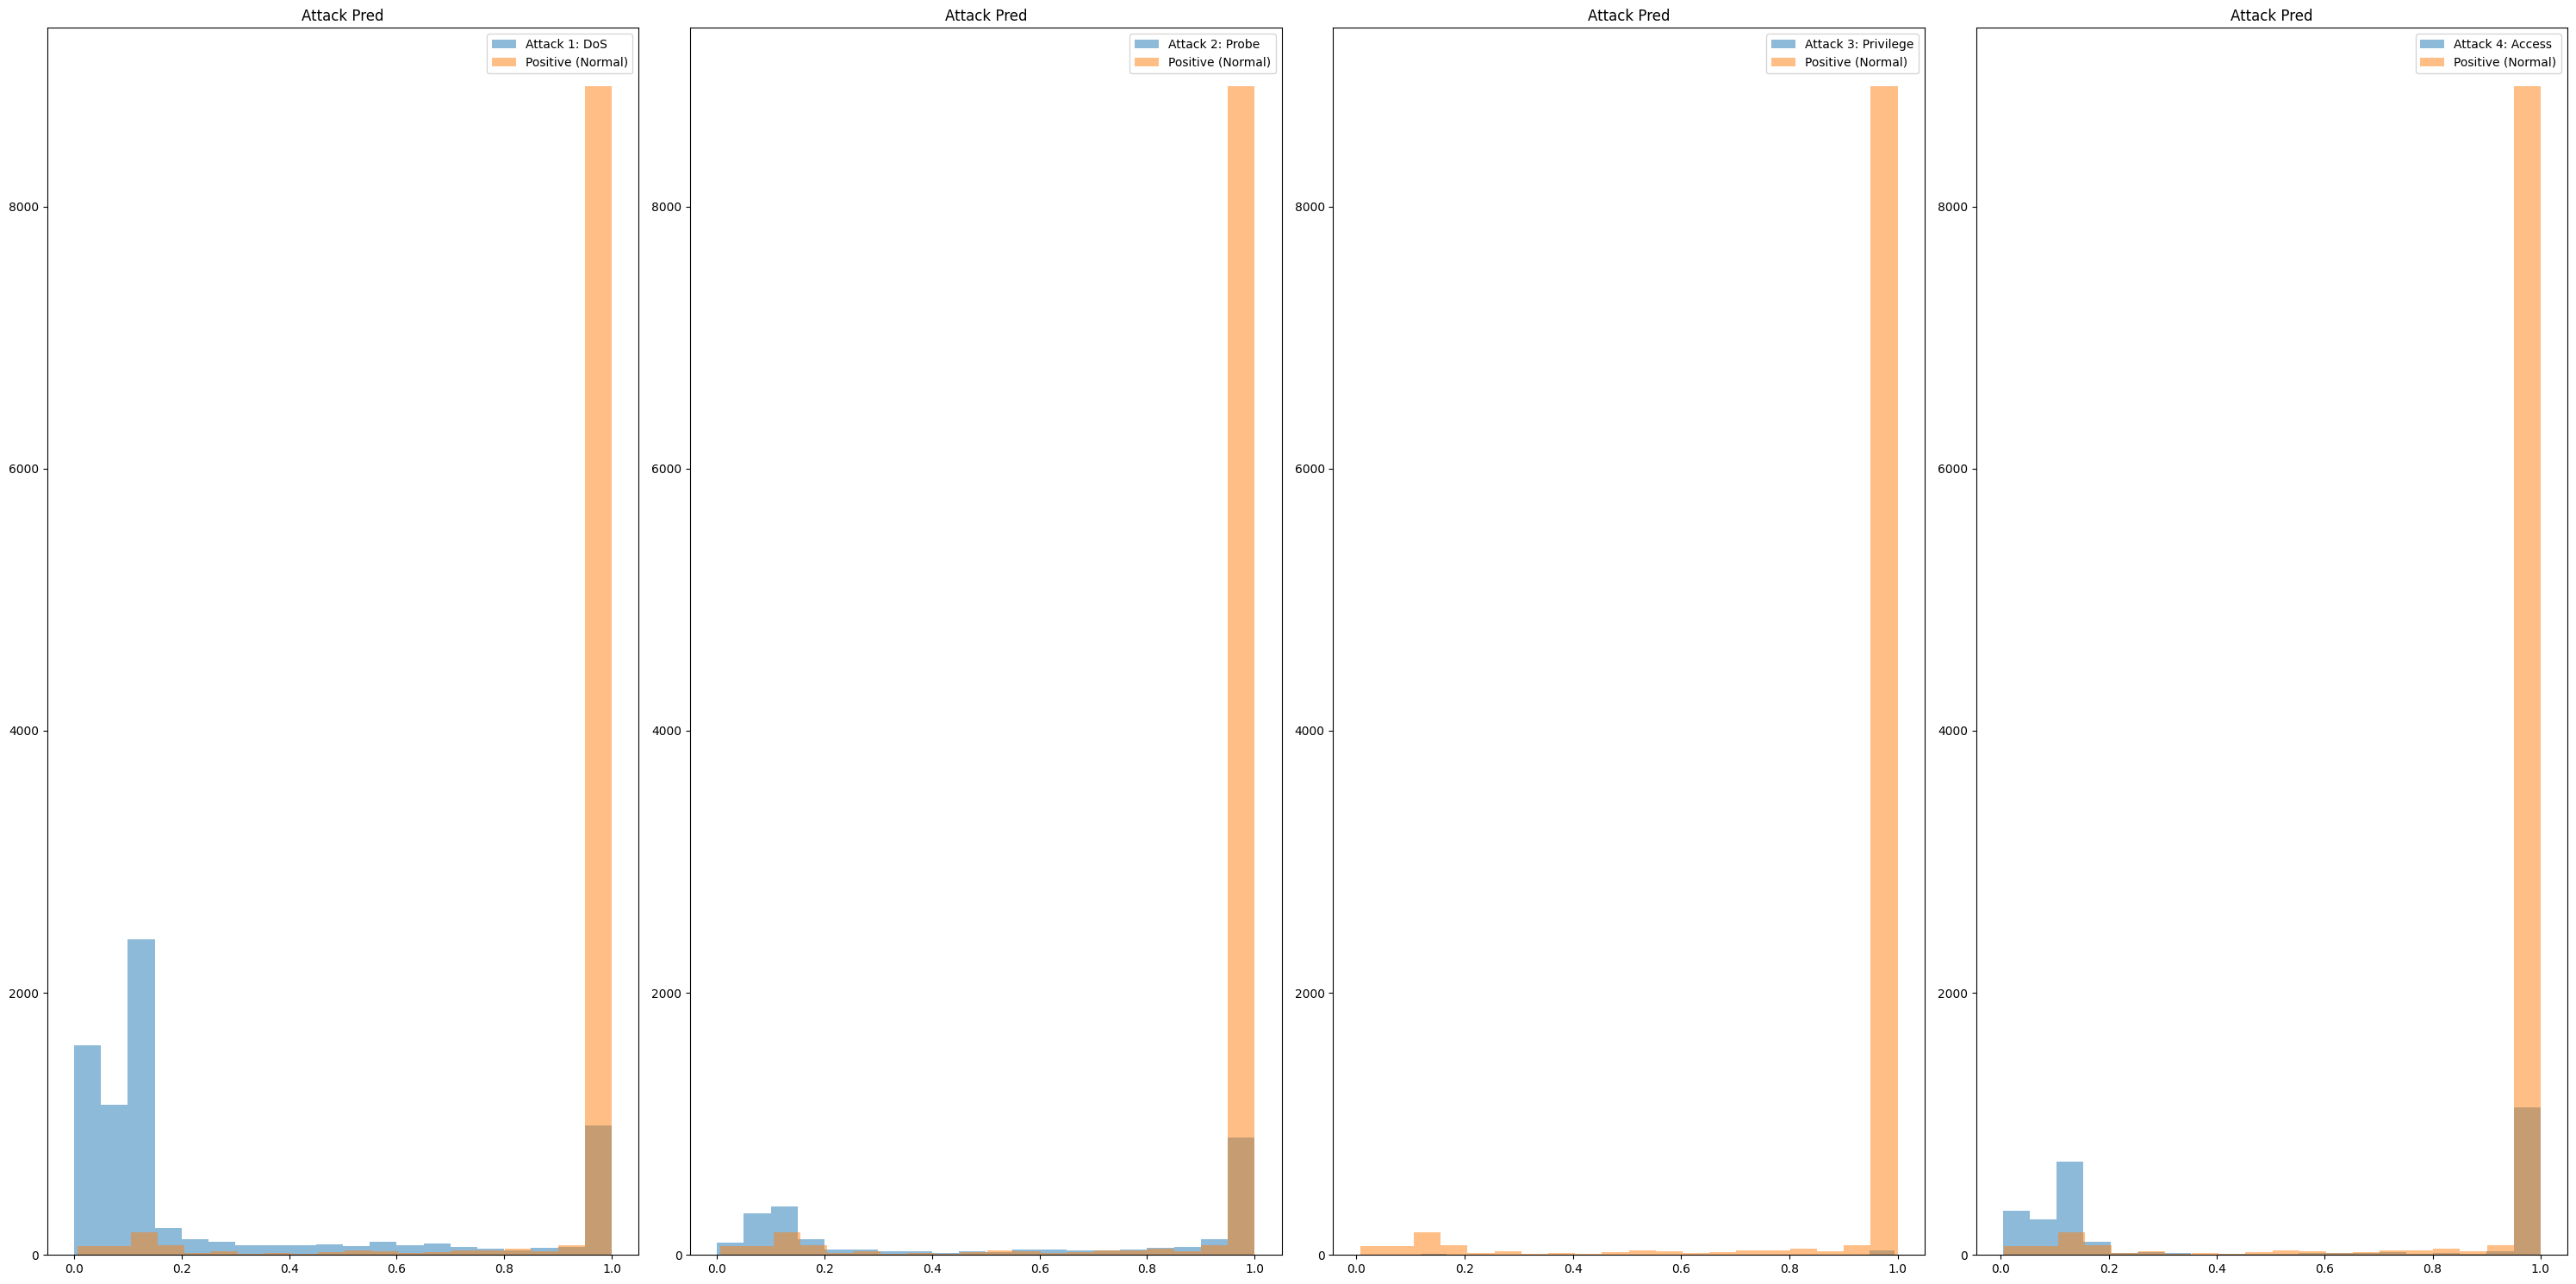

AUPR Train Run 1: 0.9712998568752989
Epoch 1/30
3186/3186 [==============================] - 13s 3ms/step - loss: 0.0537 - val_loss: 0.0349
Epoch 2/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0704 - val_loss: 0.1063
Epoch 3/30
3186/3186 [==============================] - 13s 4ms/step - loss: 0.0582 - val_loss: 0.0362
Epoch 4/30
3186/3186 [==============================] - 14s 5ms/step - loss: 0.0365 - val_loss: 0.0361
Epoch 5/30
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0390 - val_loss: 0.0281
Epoch 6/30
3186/3186 [==============================] - 15s 5ms/step - loss: 0.0376 - val_loss: 0.0438
Epoch 7/30
3186/3186 [==============================] - 14s 4ms/step - loss: 0.0437 - val_loss: 0.0407
Epoch 8/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0379 - val_loss: 0.0436
Epoch 9/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0576 - val_loss: 0.1371
Epoch 10/30
3186/3186 [=============

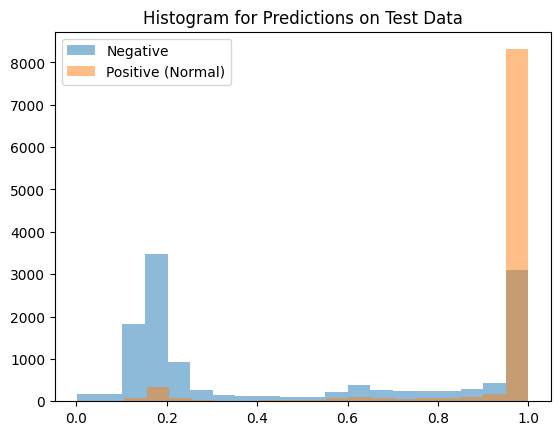

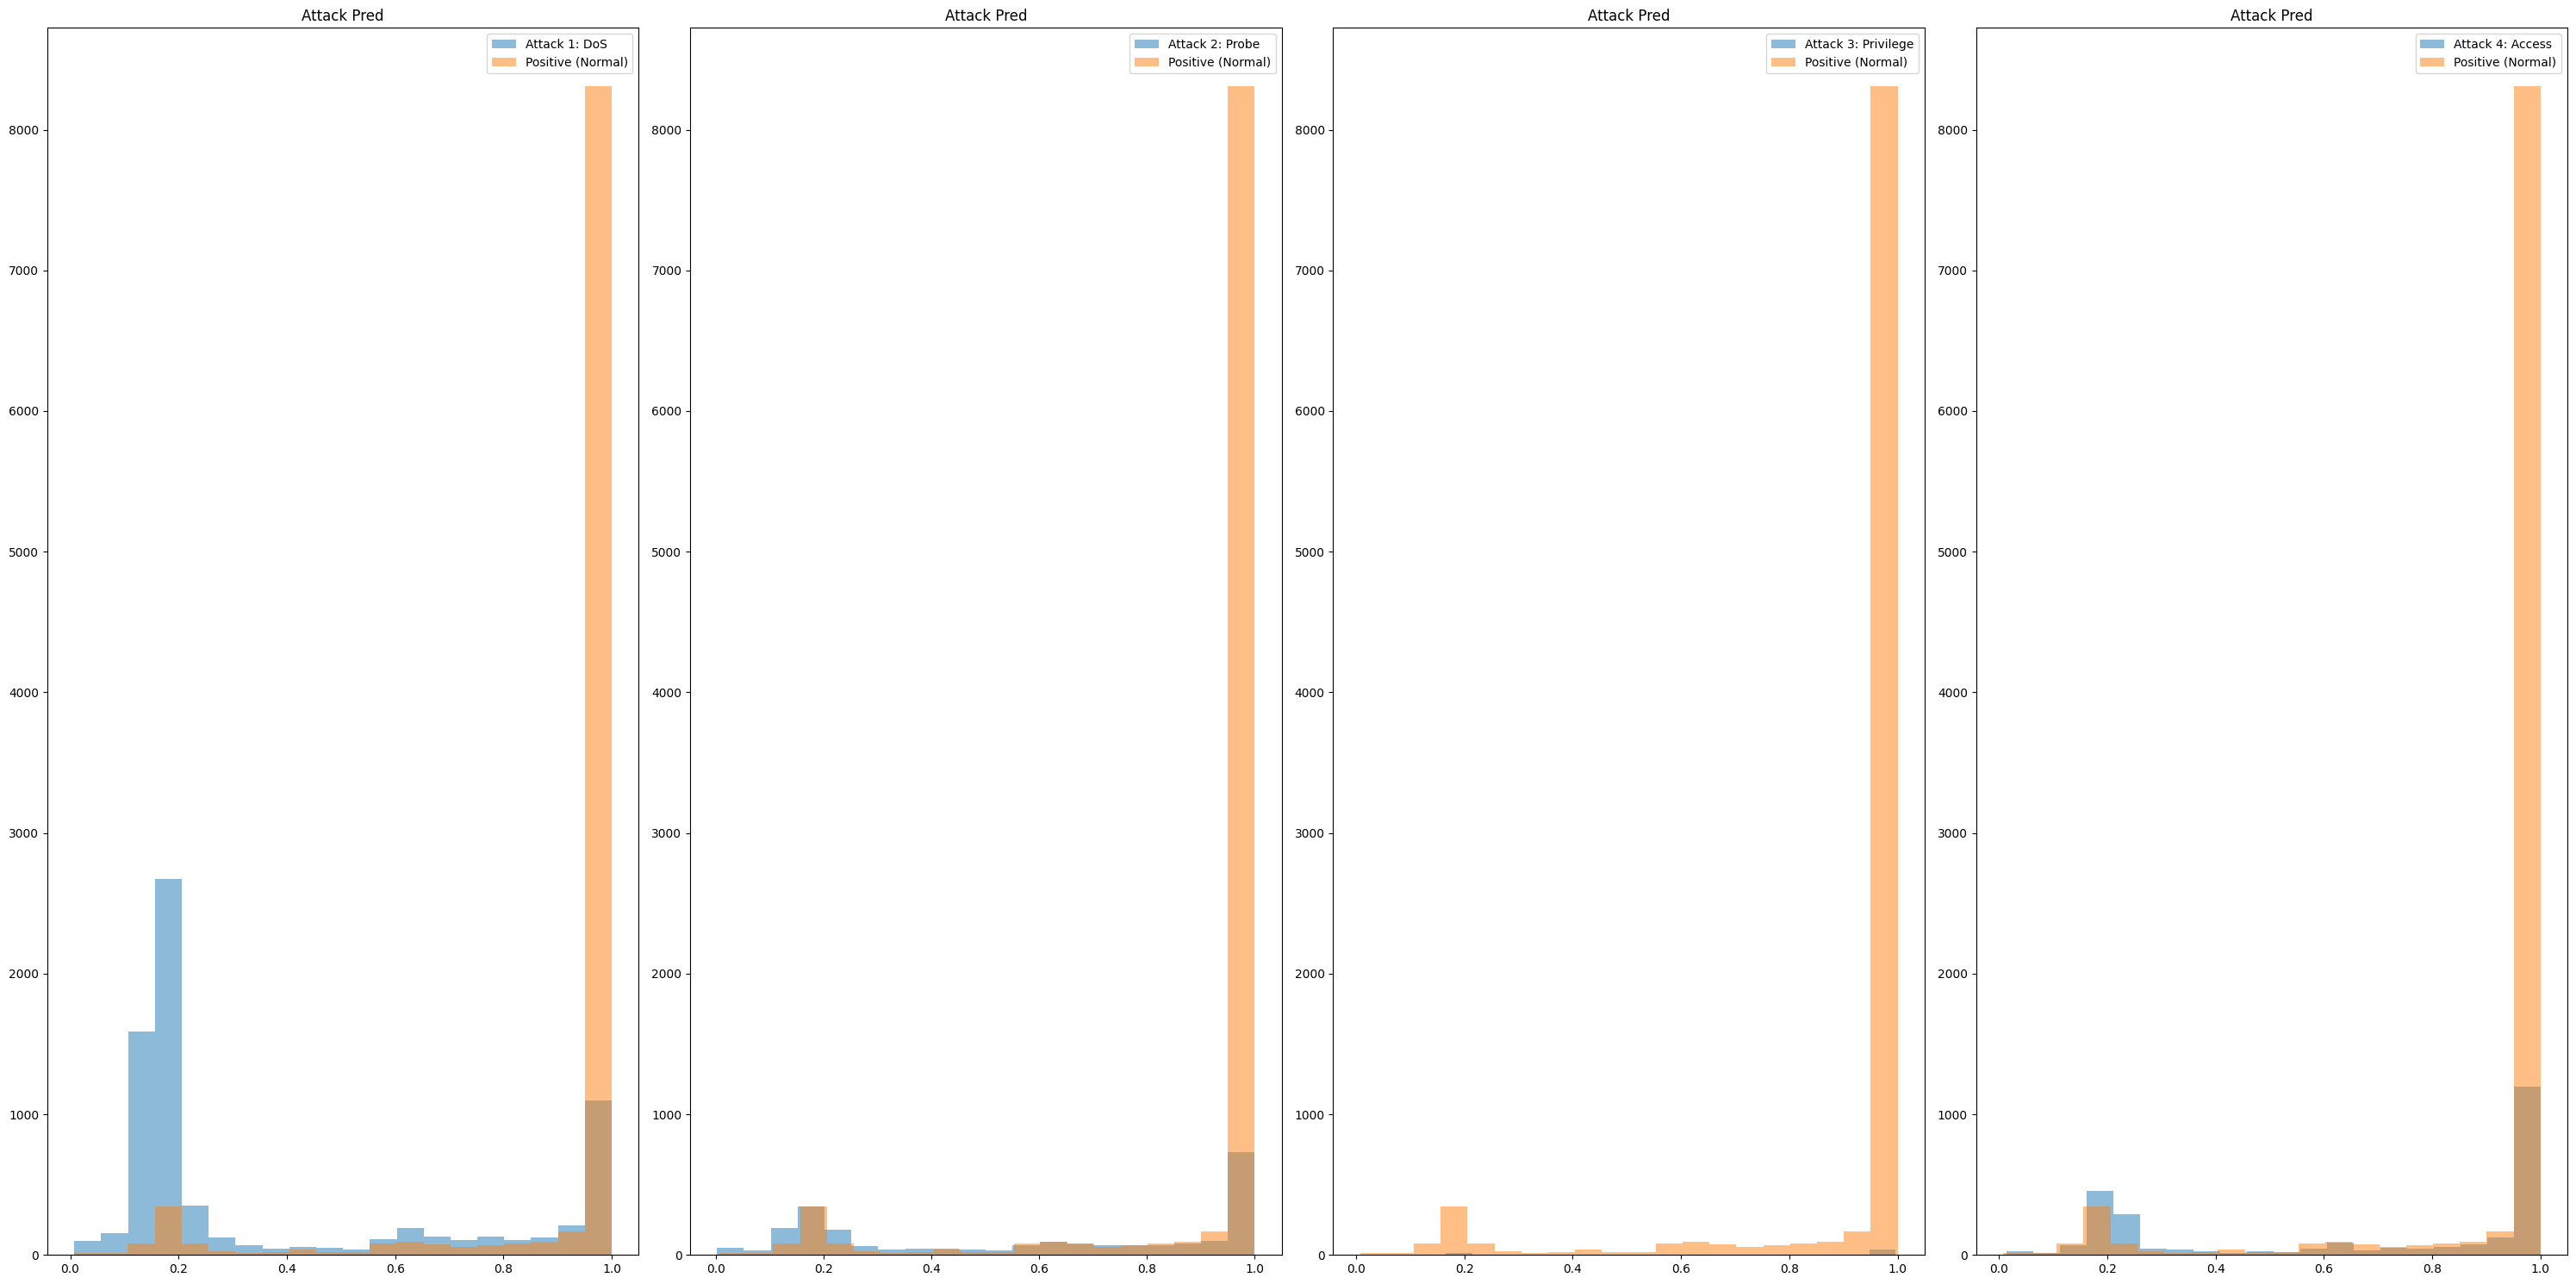

AUPR Train Run 2: 0.8240297895023356
AUPR (Train): 0.8976648231888172+-0.07363503368648161
AUPR (Test): 0.8974475985632444+-0.01637496920864412


,0,1
1,0.918053,0.874377
2,0.604515,0.547887
3,0.028908,0.025449
4,0.626722,0.450658


([0.9712998568752989, 0.8240297895023356],
 [0.9138225677718885, 0.8810726293546003],
 {0: [0.9180530707127886,
   0.6045150014181722,
   0.02890757616594157,
   0.6267220066278081],
  1: [0.87437677611355,
   0.5478866549036205,
   0.025448912271427097,
   0.4506583821428237]})

In [20]:
#C
#Bumped model but with a different loss function - trying logaritimic mean squared loss 
# Changing neurons from [90,60,30] to [60,45,30,15]
separation = "ES"
bumped = "b"
neurons = [60,45,30,15]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True, min_delta=.05)
auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks

Model: "ES4b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_34 (Dense)            (None, 90)                11070     
                                                                 
 bump1 (Bump)                (None, 90)                1         
                                                                 
 dense_35 (Dense)            (None, 60)                5460      
                                                                 
 bump2 (Bump)                (None, 60)                1         
                                                                 
 dense_36 (Dense)            (None, 30)                1830      
                                                                 
 bump3 (Bump)                (None, 30)                1      

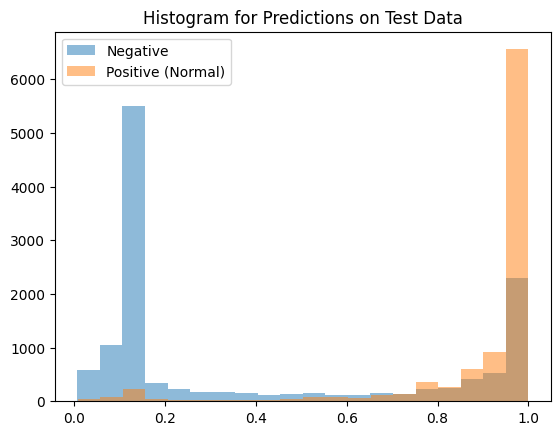

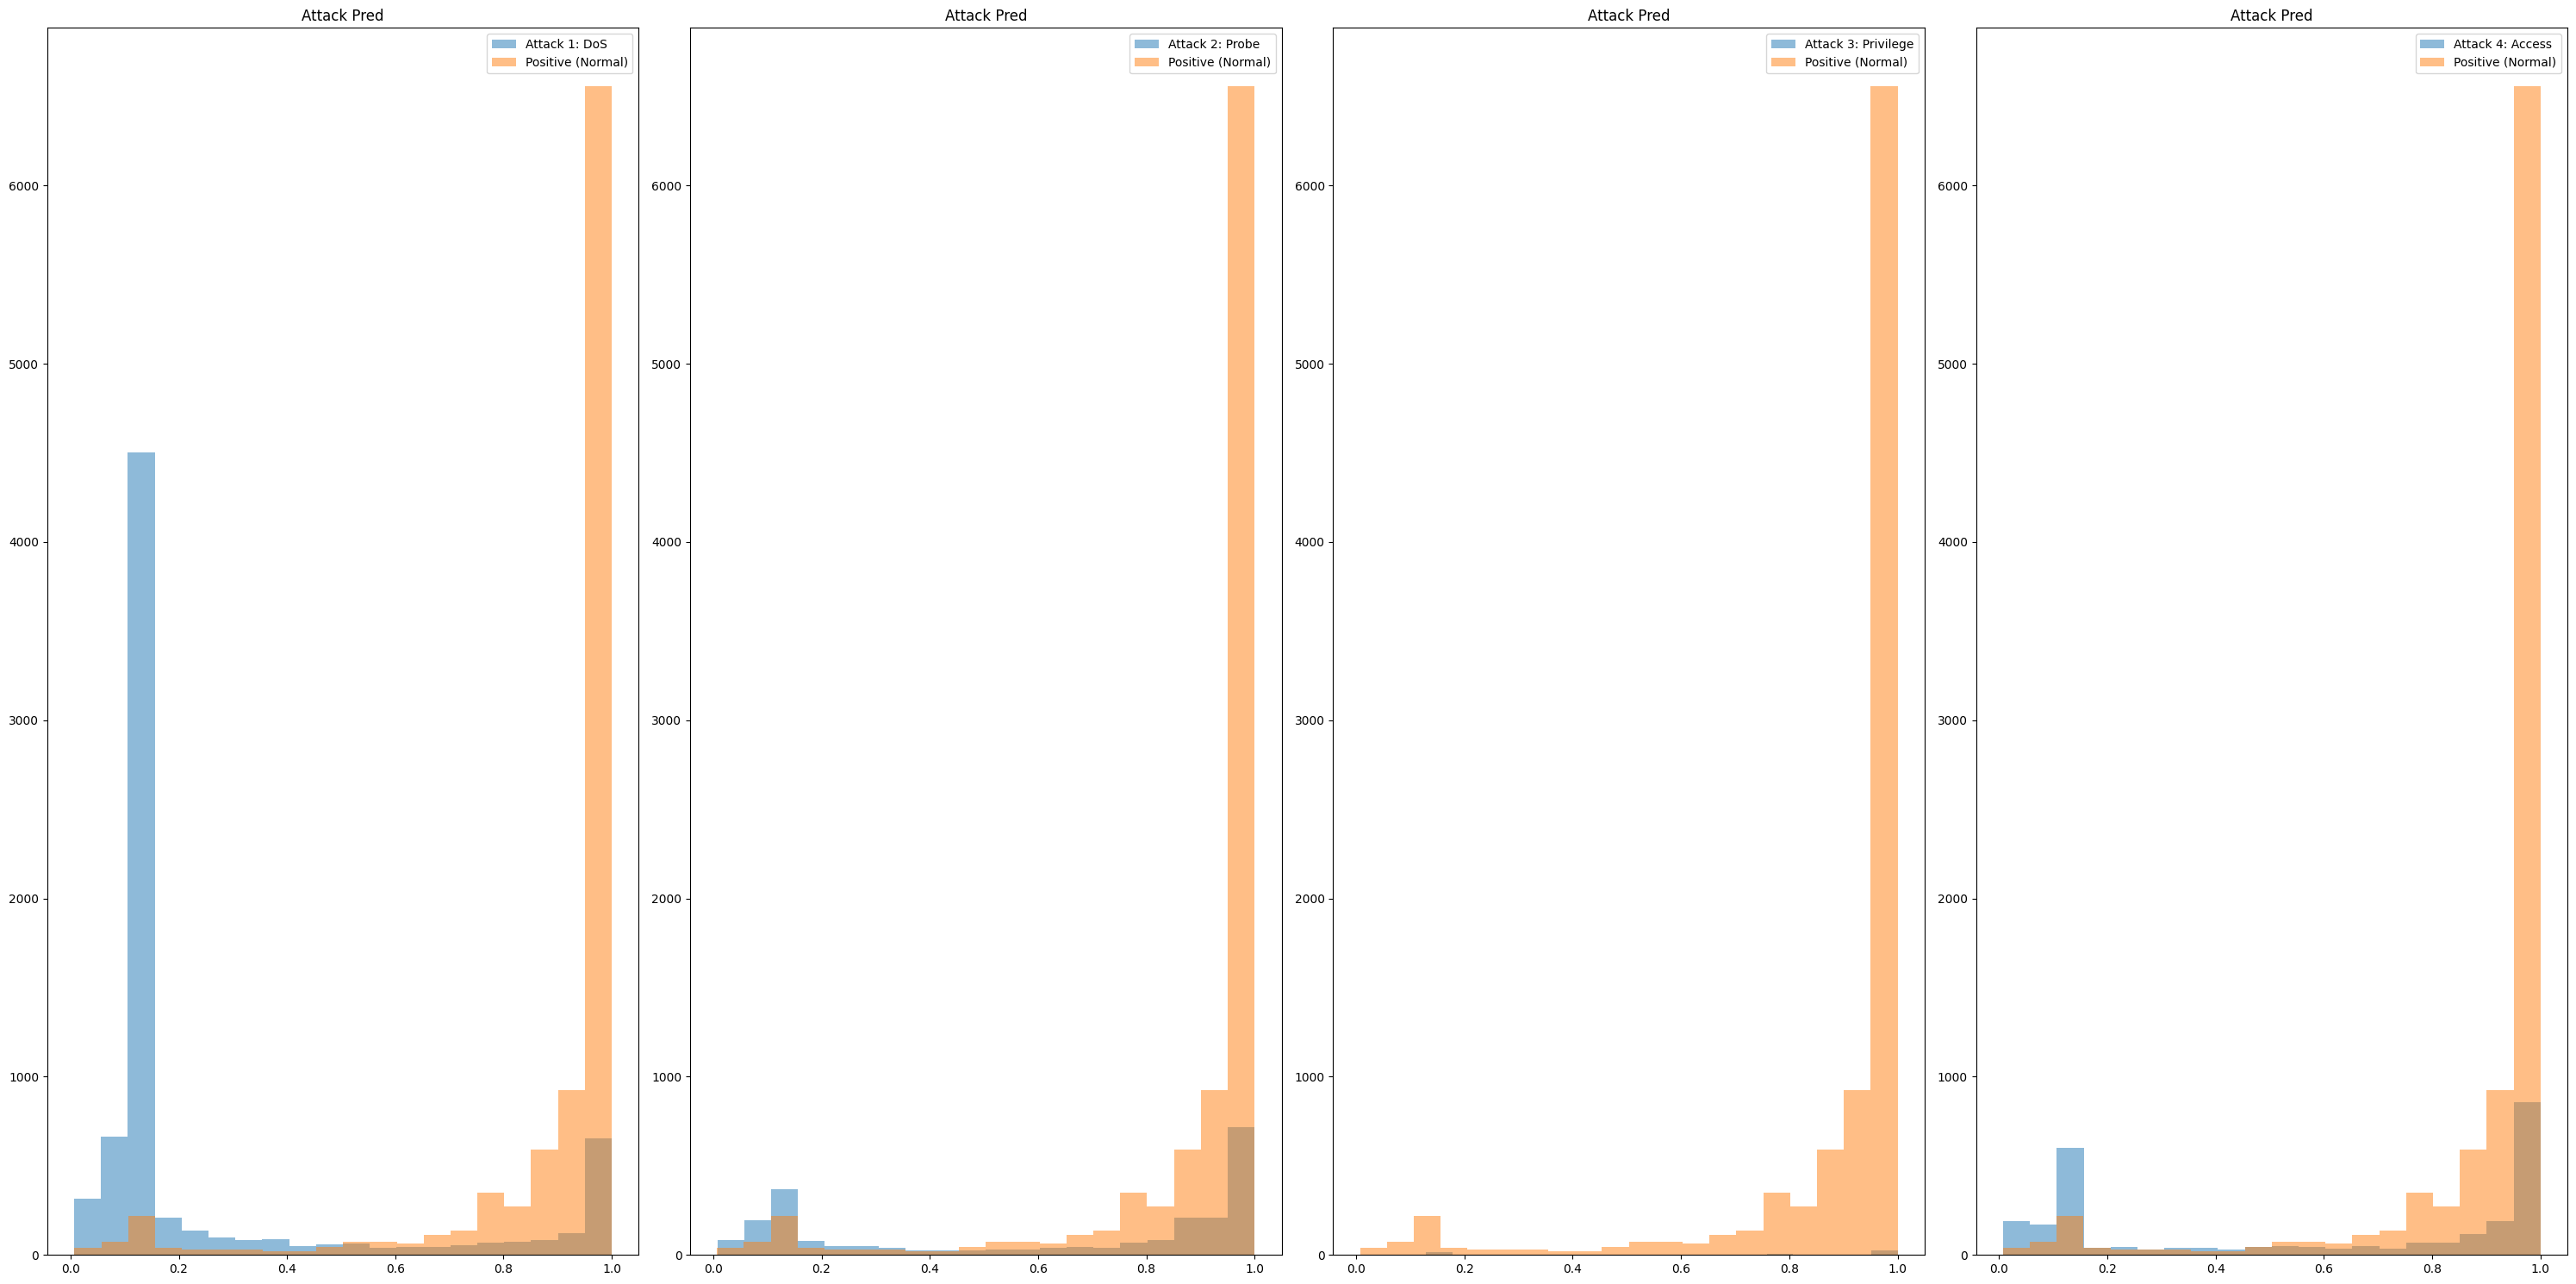

AUPR Train Run 1: 0.8565719183979106
Epoch 1/30
3186/3186 [==============================] - 9s 2ms/step - loss: 0.0749 - val_loss: 0.0327
Epoch 2/30
3186/3186 [==============================] - 9s 3ms/step - loss: 0.0803 - val_loss: 0.0345
Epoch 3/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.1097 - val_loss: 0.0823
Epoch 4/30
3186/3186 [==============================] - 11s 4ms/step - loss: 0.0428 - val_loss: 0.0529
Epoch 5/30
3186/3186 [==============================] - 12s 4ms/step - loss: 0.0391 - val_loss: 0.0447
Epoch 6/30
3186/3186 [==============================] - 12s 4ms/step - loss: 0.0478 - val_loss: 0.0523
Epoch 7/30
3186/3186 [==============================] - 10s 3ms/step - loss: 0.0816 - val_loss: 0.0504
Epoch 8/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0478 - val_loss: 0.0828
Epoch 9/30
3186/3186 [==============================] - 11s 3ms/step - loss: 0.0818 - val_loss: 0.0471
Epoch 10/30
3186/3186 [===============

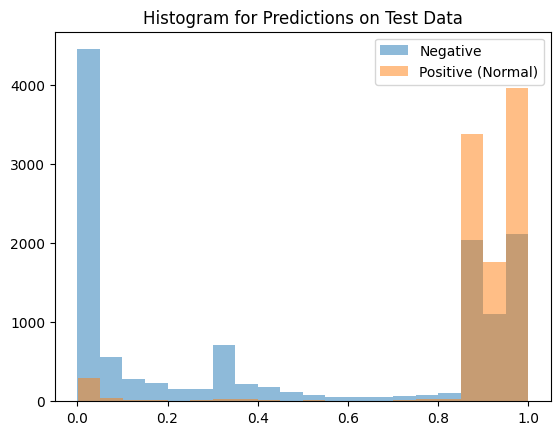

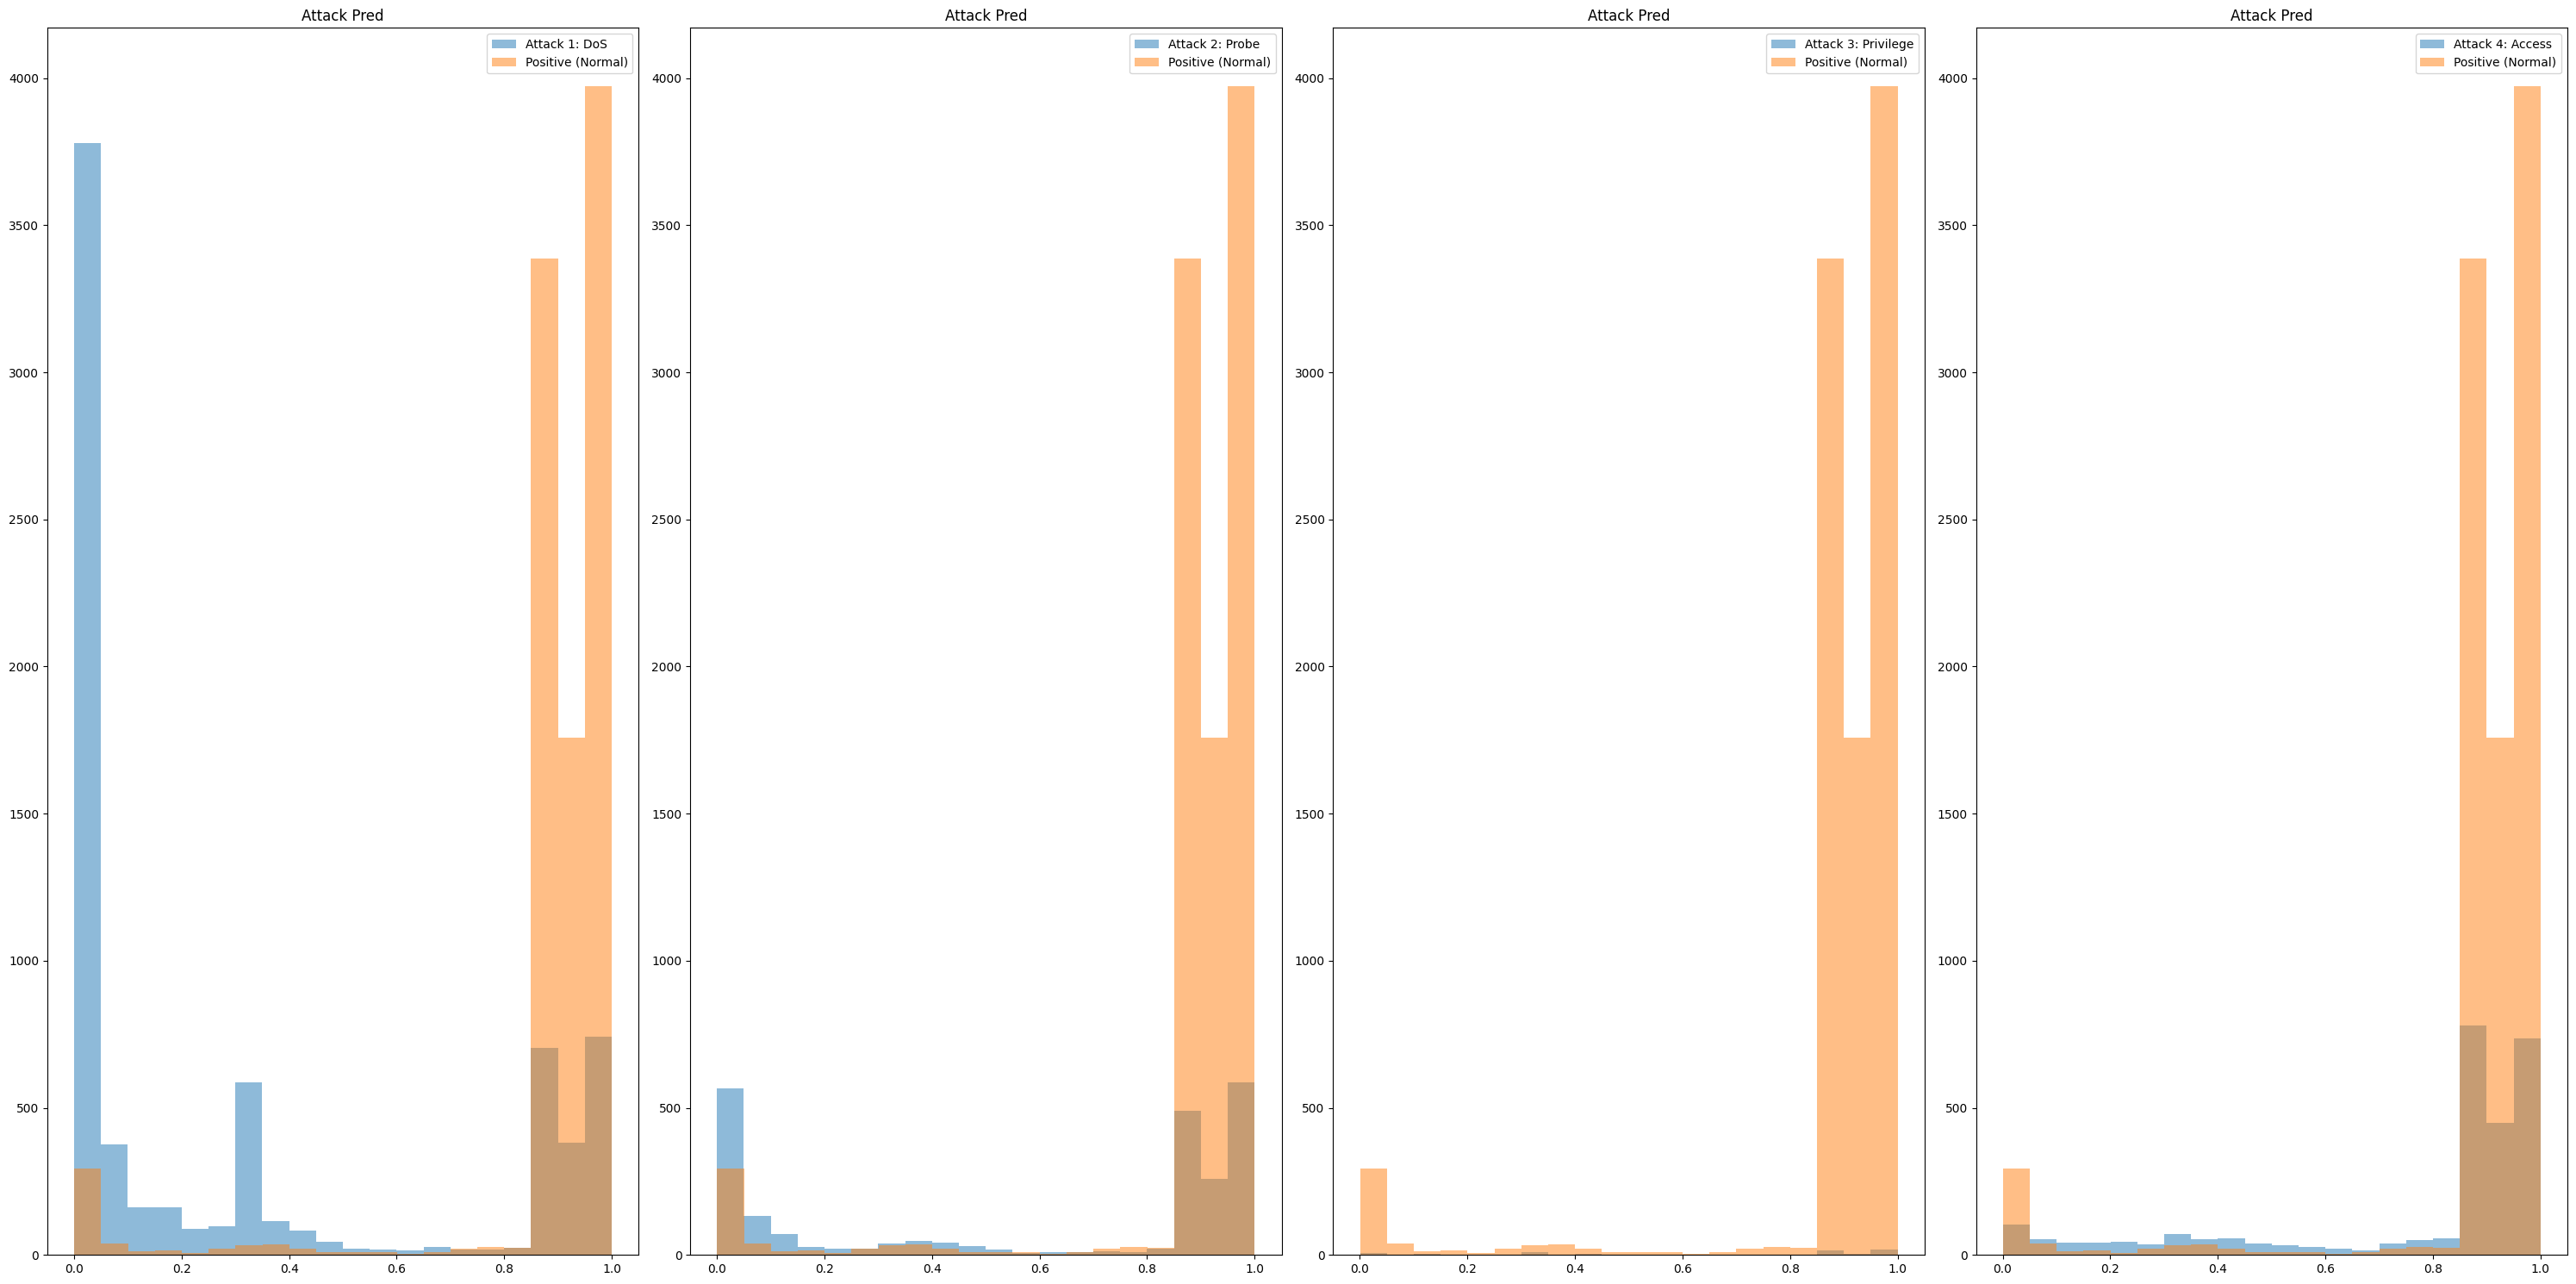

AUPR Train Run 2: 0.9196009589582528
AUPR (Train): 0.8880864386780817+-0.0315145202801711
AUPR (Test): 0.8630823076632592+-0.018486639695012075


,0,1
1,0.880077,0.851583
2,0.484537,0.475641
3,0.025346,0.034388
4,0.559907,0.352979


([0.8565719183979106, 0.9196009589582528],
 [0.8815689473582713, 0.8445956679682471],
 {0: [0.8800765920682172,
   0.48453729290519876,
   0.025346320036964784,
   0.5599067338562227],
  1: [0.8515827187345139,
   0.4756413739321197,
   0.03438820477244101,
   0.35297917871038337]})

In [21]:
#C
#Bumped model but with a different loss function - trying logaritimic mean squared loss 
# Changing neurons from [60,45,30,15] to [90,60,30,30]
separation = "ES"
bumped = "b"
neurons = [90,60,30,30]
sigma = 0.5
hidden_layers = 4
train = False    # train sigma. if NA, then False
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                                  restore_best_weights=True, min_delta=.05)
auprs_train = []
auprs_test = []
aupr_attacks = dict()

# Train and Evaluate the Model
for i in range(repeats):
    
    with strategy.scope():
        # Create the model
        tf.keras.utils.set_random_seed(i)

        model = create_model(separation, activation=bumped, hidden_layers=hidden_layers, num_inputs=num_inputs,
                     hidden_neurons=neurons,
                     sigma=sigma, train=train, loss='binary_crossentropy', lr=lr,
                     seed=i)
        
        if i == 0:
            model.summary()

        # Train the model
        aupr_train, aupr_test, aupr_attack = train_eval(model, X, y, x_test, y_test, epochs=epochs,
                   train=train, verbose=verbose, shuffle=shuffle, plot=plot,
                   val_split=val_split, callbacks=callbacks, seed=i, indiv=new_attacks)
    
    print(f"AUPR Train Run {i+1}: {aupr_train}")
    auprs_train.append(aupr_train)
    auprs_test.append(aupr_test)
    aupr_attacks[i] = aupr_attack
    
print(f"AUPR (Train): {np.mean(auprs_train)}+-{np.std(auprs_train)}")
print(f"AUPR (Test): {np.mean(auprs_test)}+-{np.std(auprs_test)}")
display(pd.DataFrame(data=aupr_attacks, index=new_attacks))
# print(f"Average Distance between Means: {np.mean(diff_means)}+-{np.std(diff_means)}")
auprs_train, auprs_test, aupr_attacks